### Visualizing Model Outputs

In [8]:
import pandas as pd
import numpy as np
from numpy import inf
import os
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters

np.seterr(divide = 'ignore') 
pd.options.mode.chained_assignment = None
register_matplotlib_converters()
%matplotlib inline


In [9]:
all_data = pd.read_pickle('.\\..\\data\\covid_df.pkl')
output = pd.read_pickle('.\\..\\data\\predictions_log_total.pkl')

In [10]:
mlp = pd.read_pickle('.\\..\\data\\mlp_predictions.pkl')

8676.0

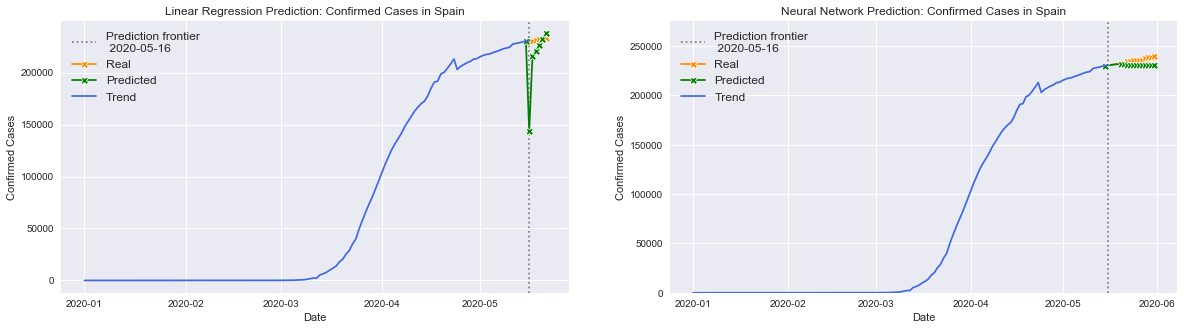

In [113]:
def predicted_vs_real(full_df, output_df, country, target, logged=False, net=False):
    '''
    Plots one model's prediction vs real trend
    '''
    style.use('seaborn')
    date = output_df.index.min()
    pre = full_df[(full_df['Country'] == country) & (full_df['Date'] <= date)][[target, 'Date']]
    real = country + ' real'
    predict = country + ' prediction'
    post = output_df[[real, predict]]  
    day = pre['Date'].max() + dt.timedelta(days=-1)
    row = pre[pre['Date'] == day][[target, 'Date']]
    val = row[target]
    if logged:
        row[real], row[predict] = (np.log(val), np.log(val))
    else:
        row[real], row[predict] = (val, val)
    row.set_index('Date', inplace=True)
    post = row.append(post[[real, predict]])
    if logged:
        post = np.exp(post)
        
    fig, ax = plt.subplots(figsize=(12, 8))
    title = 'Prediction: {} in {}'.format(target, country)
    if net:
        title = 'Neural Net ' + title
    else:
        title = 'Linear Regression ' + title
    plt.title(label=title, fontsize=15)
    ax.axvline(x=date, ls=':', c='gray', label = str(date))
    g = sns.lineplot(x=post.index, y=post[real], ax=ax, marker='X', color='darkorange')
    g = sns.lineplot(x=post.index, y=post[predict], ax=ax, marker='X', color='g')
    g = sns.lineplot(x=pre['Date'], y=pre[target], ax=ax, color='royalblue')
    plt.legend(('Prediction frontier\n {}'.format(date), 'Real', 'Predicted', 'Trend'), prop={'size': 12})
    plt.ylabel(target)
    plt.show()

    
def side_by_side(full_df, country, target, models, *predictions, save_output=False):
    '''
    Plots two different plots of models' predictions vs real trends side by side. 
    --first *predictions arg must be the one to be logged (LinReg)
    Inputs:
        full_df: (Pandas df) The full cleaned dataset
        country: (string) Country to examine
        target: (string) the outcome variable of the model
        models: (list) model names as strings
        *predictions: (tuple of Pandas df) collection of model prediction data
        save_output: (boolean) switch to save image output
    Output:
        File if save_output=True
        plots figure
    '''
    np.seterr(all='ignore')
    style.use('seaborn')
    date = predictions[0].index.min()
    pre = full_df[(full_df['Country'] == country) & (full_df['Date'] <= date)][[target, 'Date']]
    real, predict = (country + ' real', country + ' prediction')
    day = pre['Date'].max() + dt.timedelta(days=-1)
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    title = ' Prediction: {} in {}'.format(target, country)
    post_trends = []
    y_max = 0
    
    for pred, model in zip(predictions, models):
        post = pred[[real, predict]]
        row = pre[pre['Date'] == day][[target, 'Date']]
        row.set_index('Date', inplace=True)
        val = row[target]
        if model == 'Linear Regression':
            row[real], row[predict] = (np.log(val), np.log(val))
            post = np.exp(row.append(post[[real, predict]]))
        else:
            row[real], row[predict] = (val, val) 
            post = row.append(post[[real, predict]])
        post_trends.append(post)
    iterable = zip(models, predictions, axes, post_trends)
    for model, output, axis, trend in iterable:
        sub_title = model + title
        axis.title.set_text(sub_title)
        axis.axvline(x=date, ls=':', c='gray', label = str(date))
        g = sns.lineplot(x=trend.index, y=trend[real], ax=axis, marker='X', color='darkorange')
        g = sns.lineplot(x=trend.index, y=trend[predict], ax=axis, marker='X', color='g')
        g = sns.lineplot(x=pre['Date'], y=pre[target], ax=axis, color='royalblue')
        axis.legend(('Prediction frontier\n {}'.format(date), 'Real', 'Predicted', 'Trend'), prop={'size': 12})
        plt.ylabel(target)    
        if output[[real, predict]].dropna().values.max() > y_max:
            y_max = output[[real, predict]].dropna().values.max()
    plt.ylim(0, y_max + y_max*.15)
    if save_output:
        file_name = '{} {} {} comparison.png'.format(country, *models)
        plt.savefig('.\\..\\visualizations\\' + file_name)
    plt.show()

#predicted_vs_real(all_data, mlp, 'Spain', 'Confirmed Cases', logged=False, net=True)

side_by_side(all_data, 'Spain', 'Confirmed Cases', ['Linear Regression', 'Neural Network'], output, mlp, save_output=True)

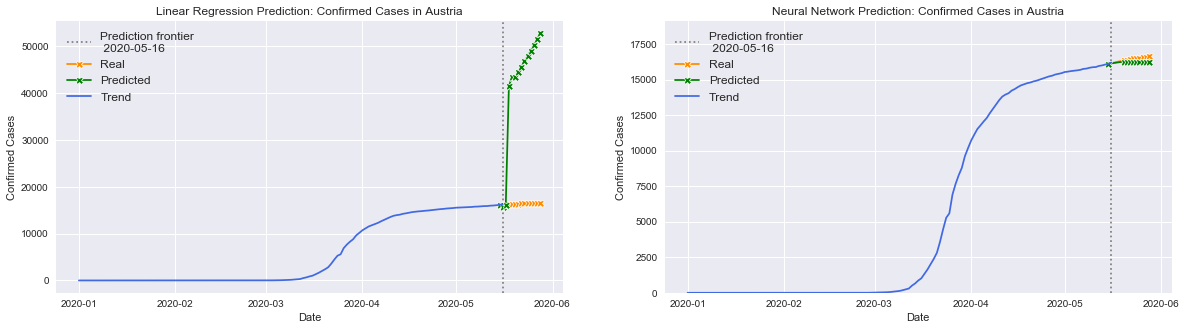

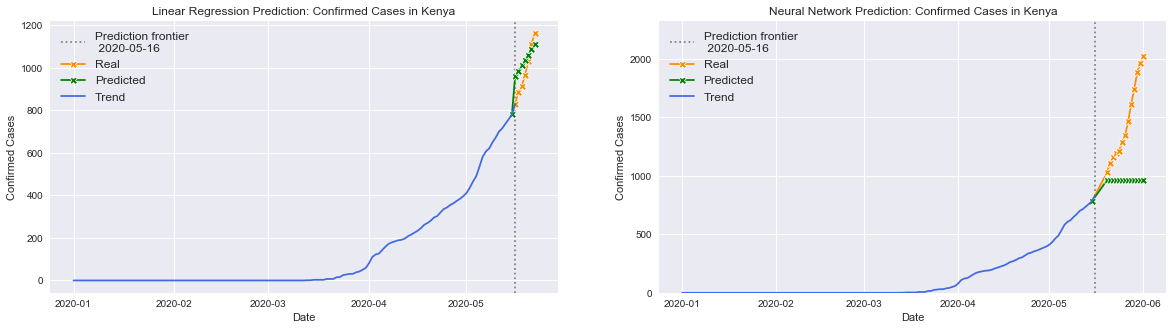

In [116]:

side_by_side(all_data, 'Austria', 'Confirmed Cases', ['Linear Regression', 'Neural Network'],output, mlp, save_output=True)
side_by_side(all_data, 'Kenya', 'Confirmed Cases', ['Linear Regression', 'Neural Network'],output, mlp, save_output=True)

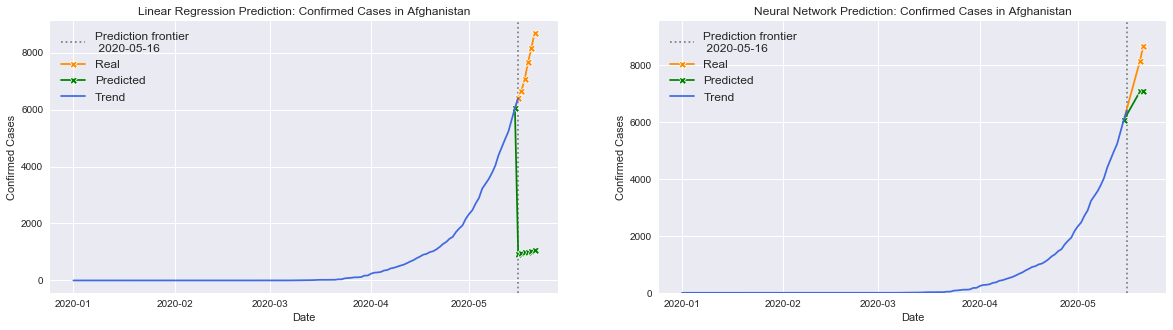

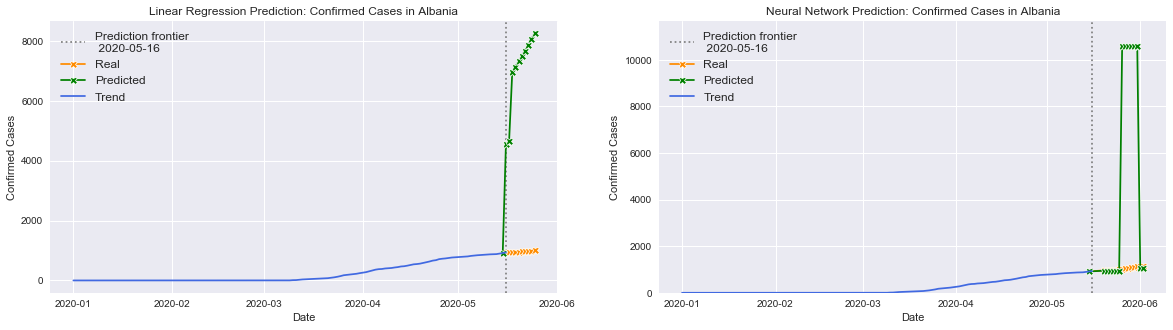

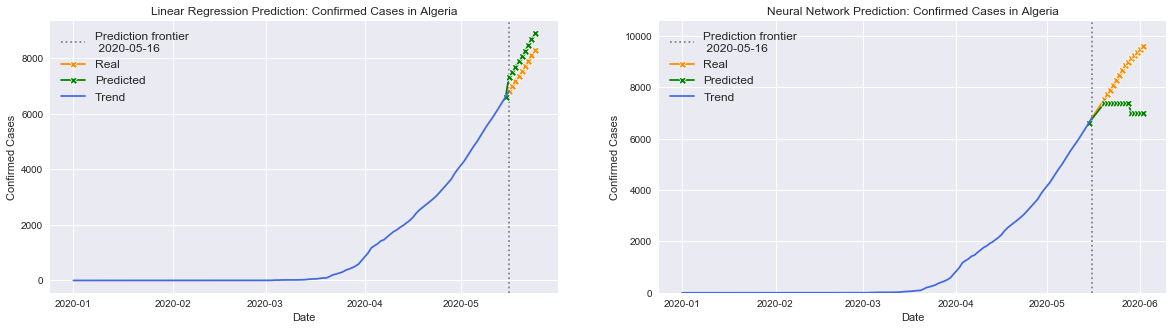

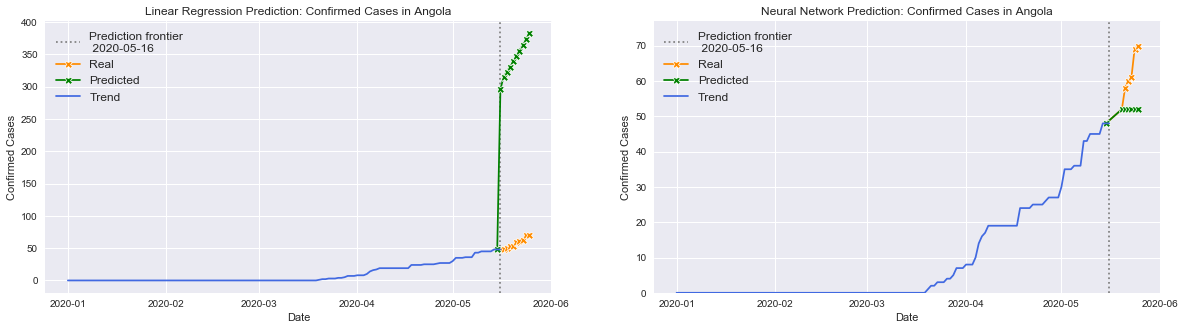

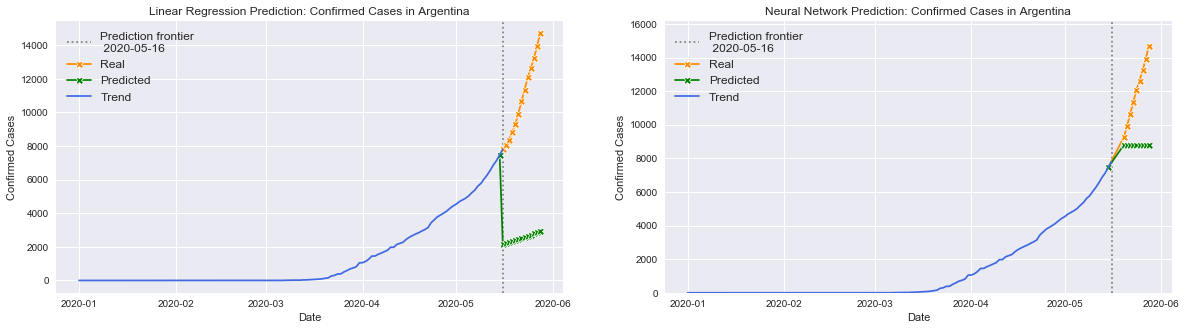

country missing: Australia 





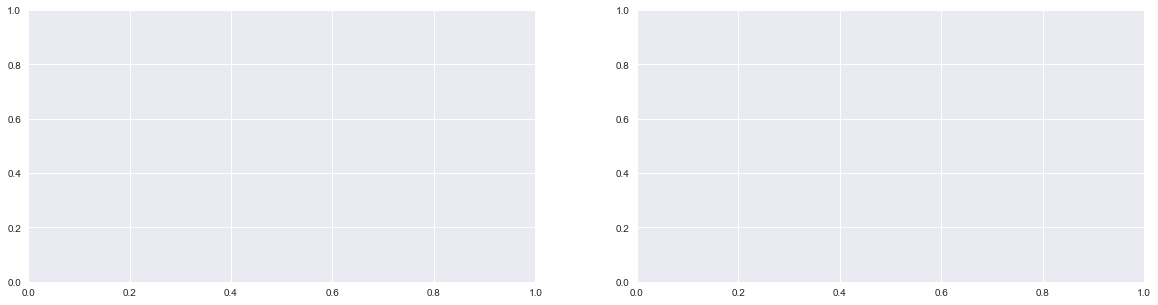

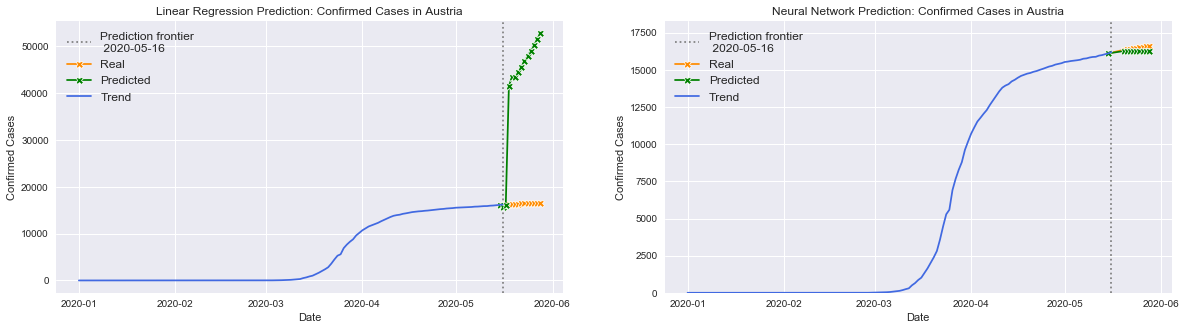

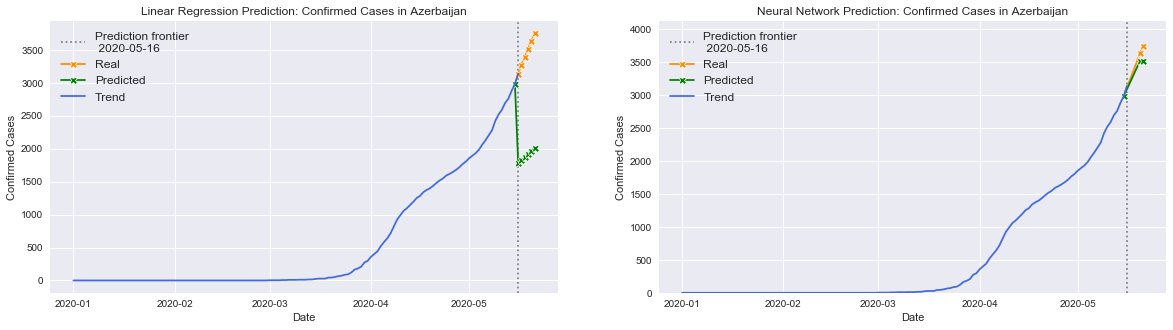

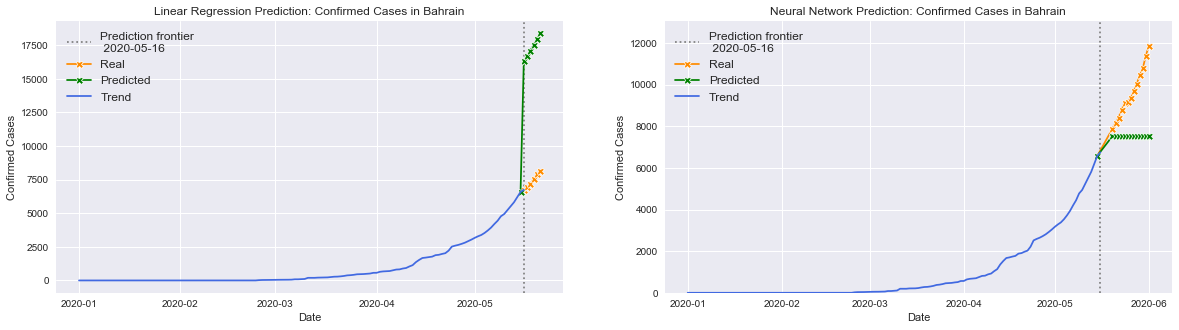

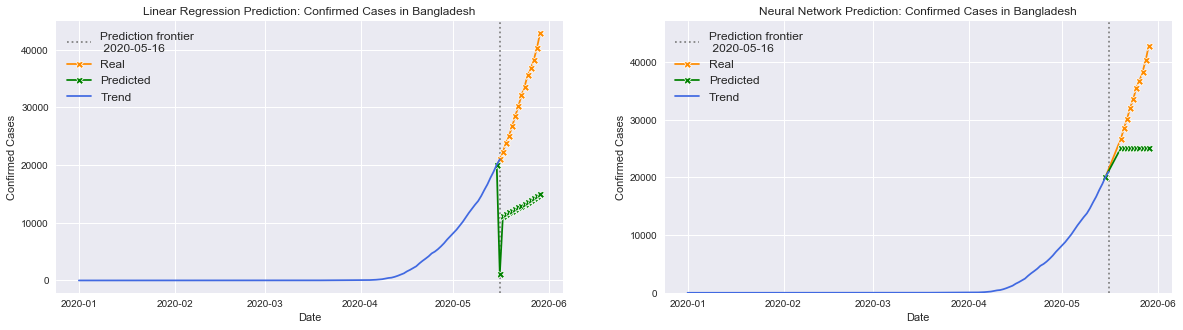

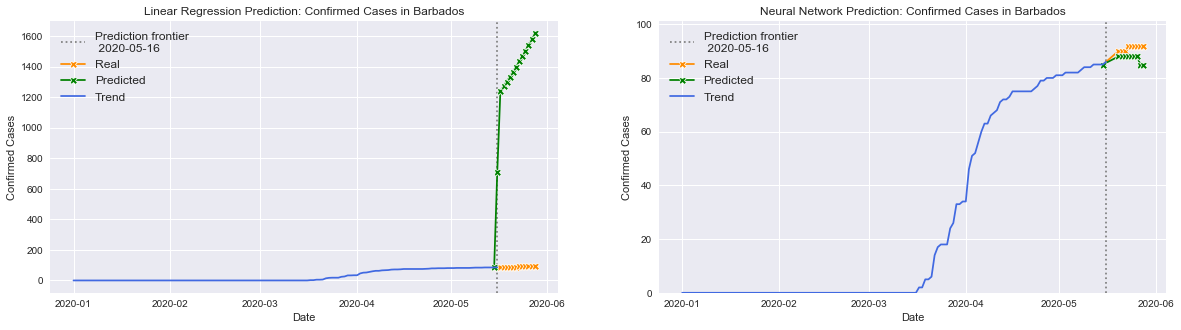

country missing: Belarus 





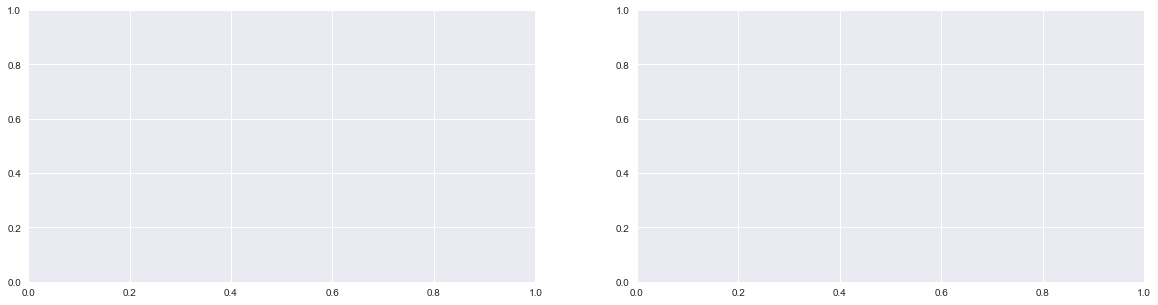

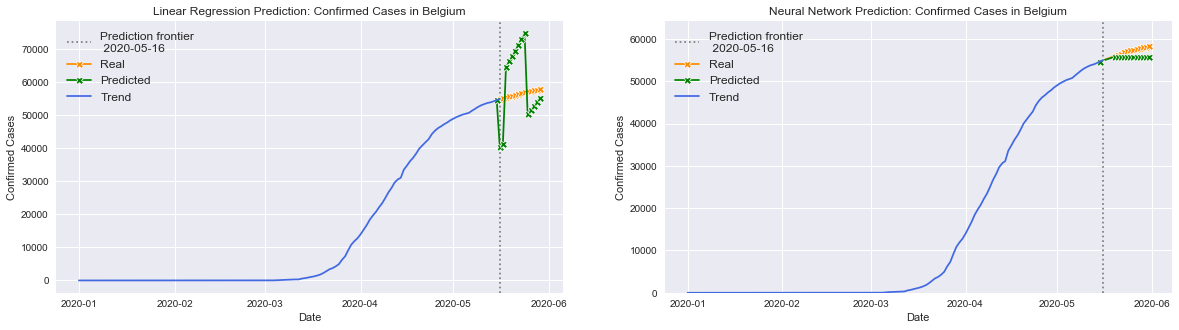

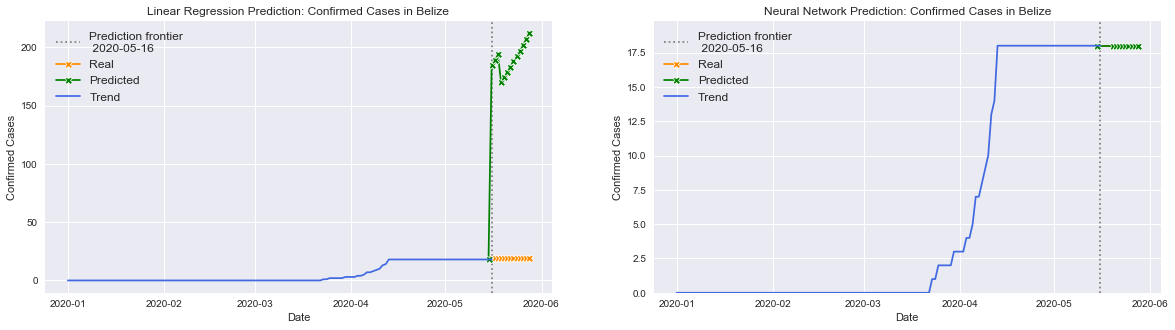

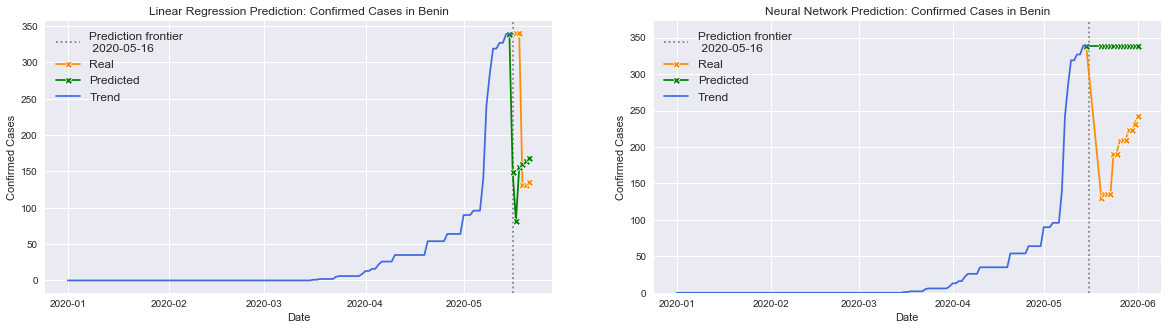

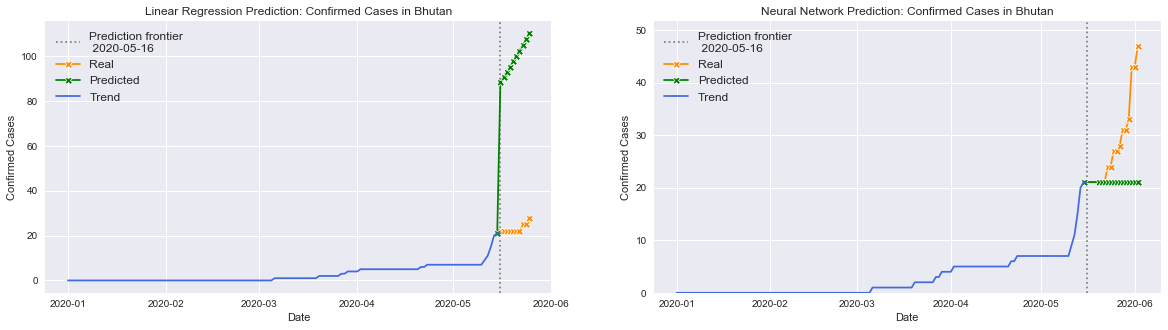

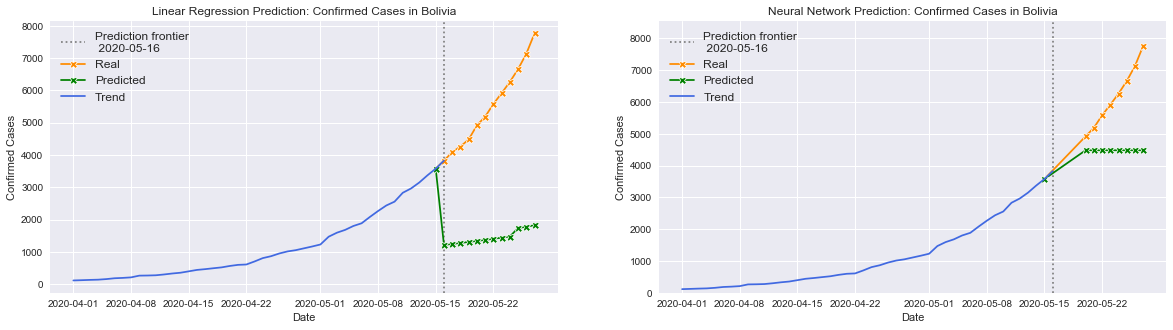

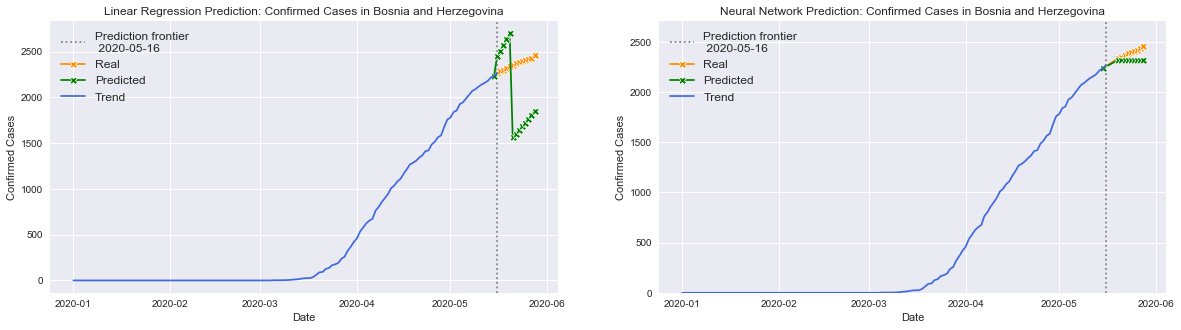

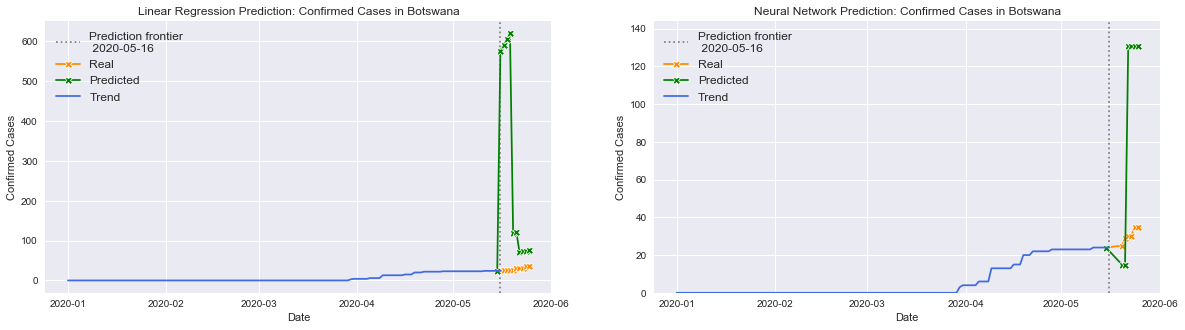

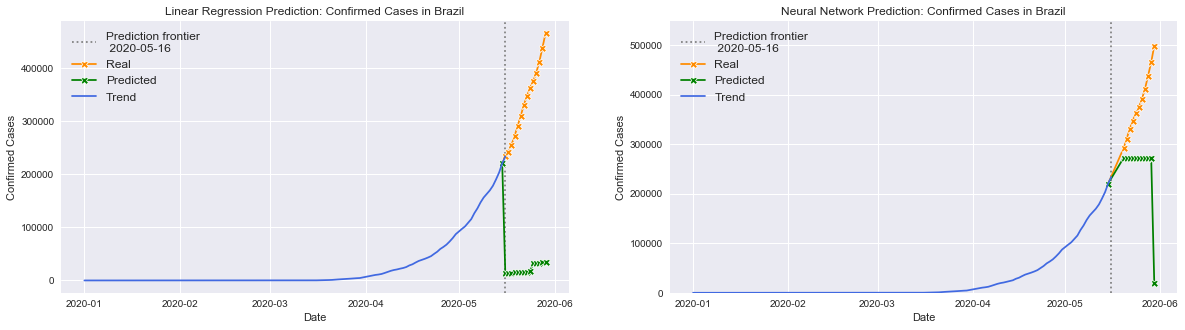

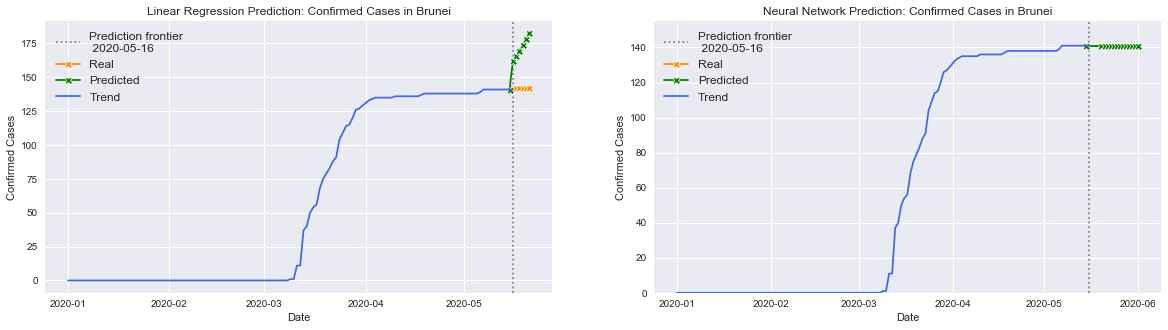

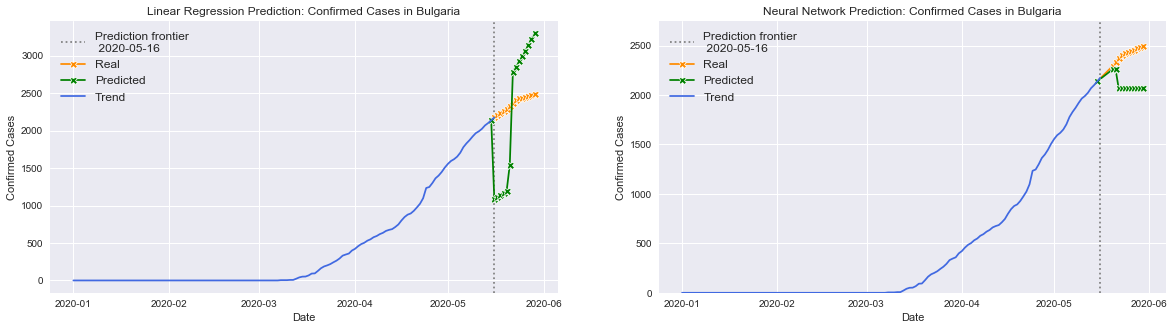

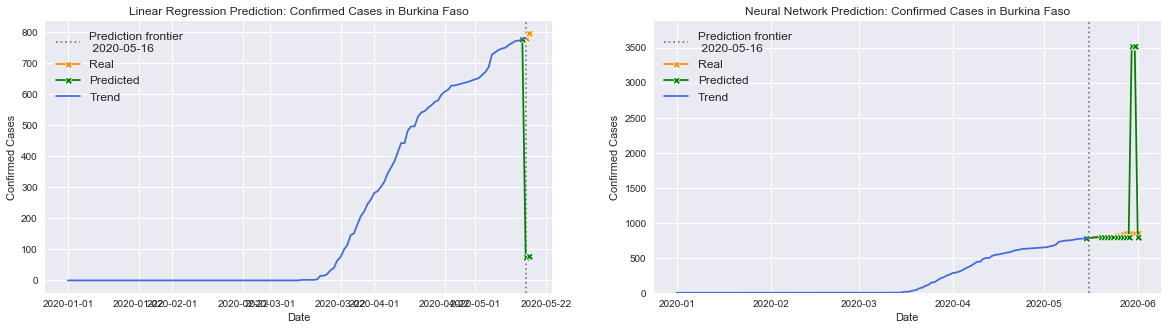

country missing: Burma 





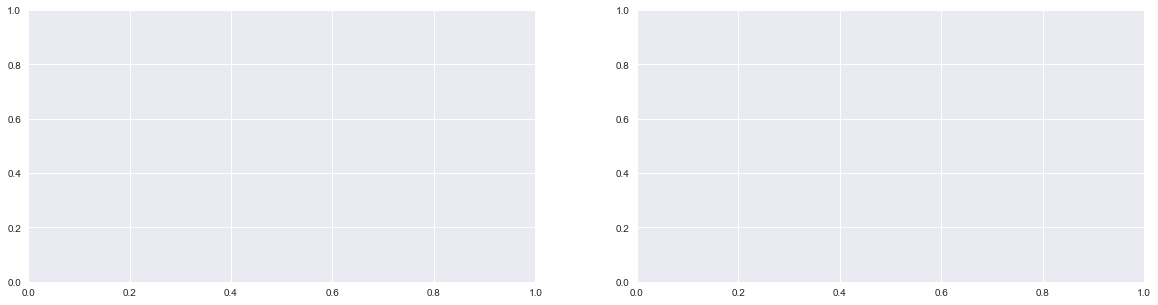

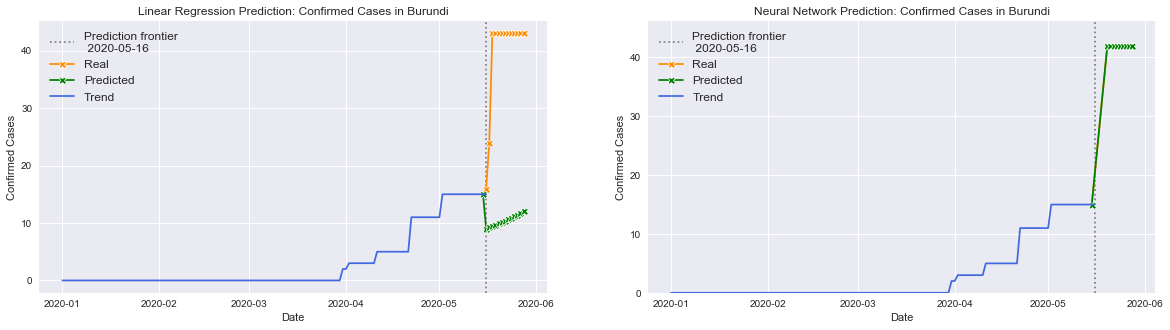

country missing: Cambodia 





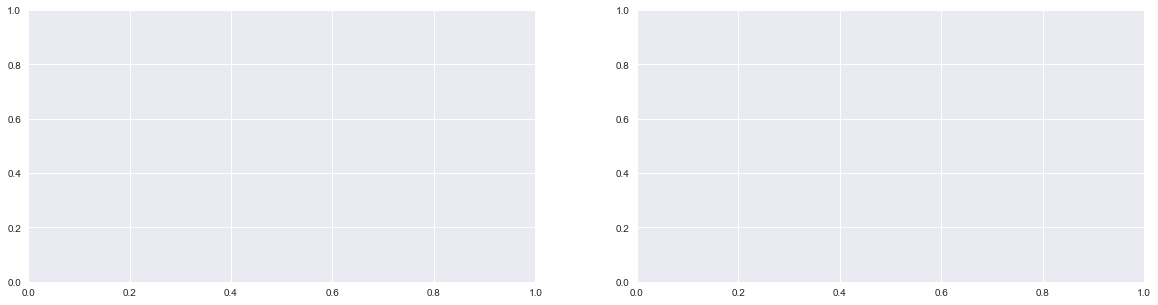

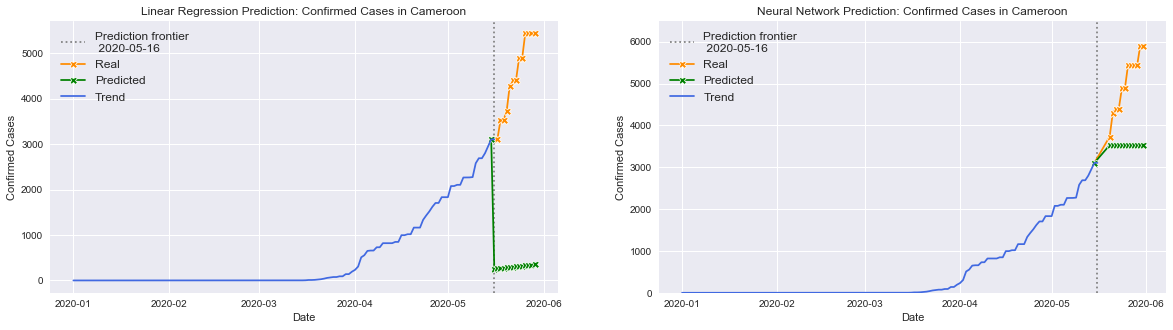

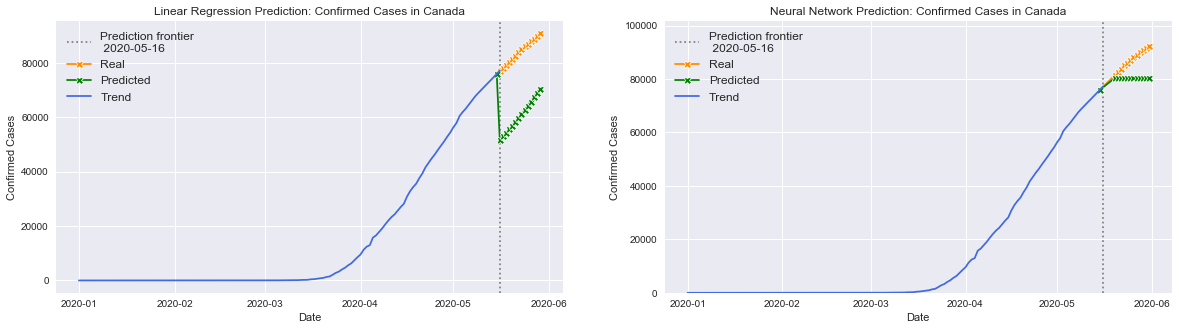

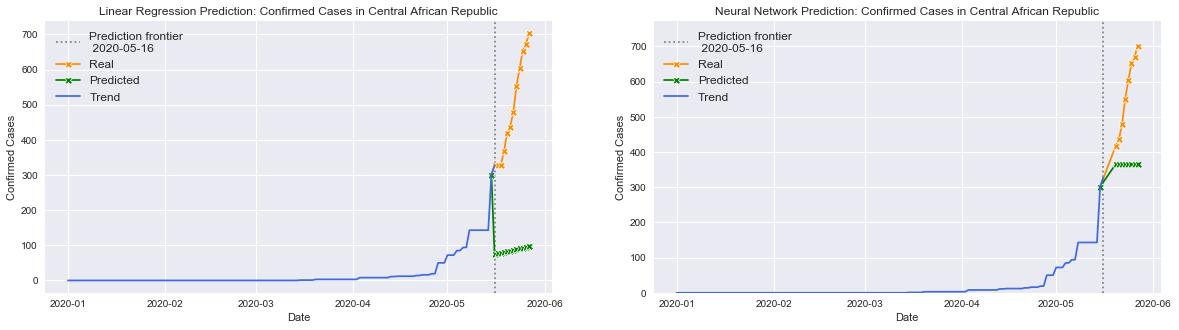

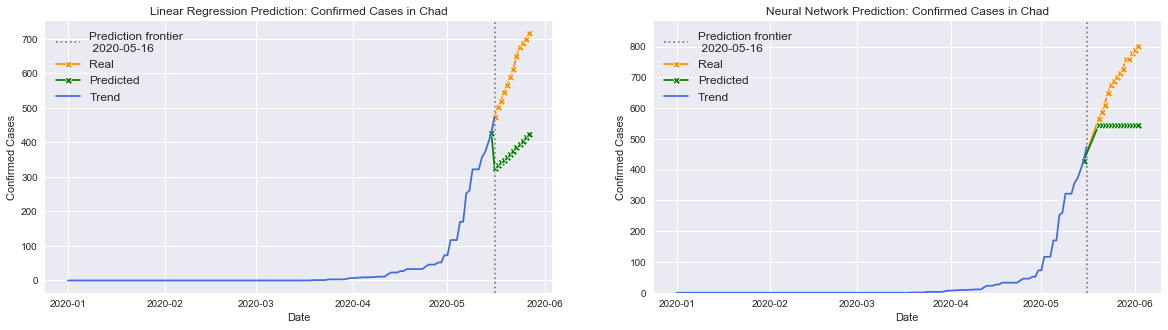

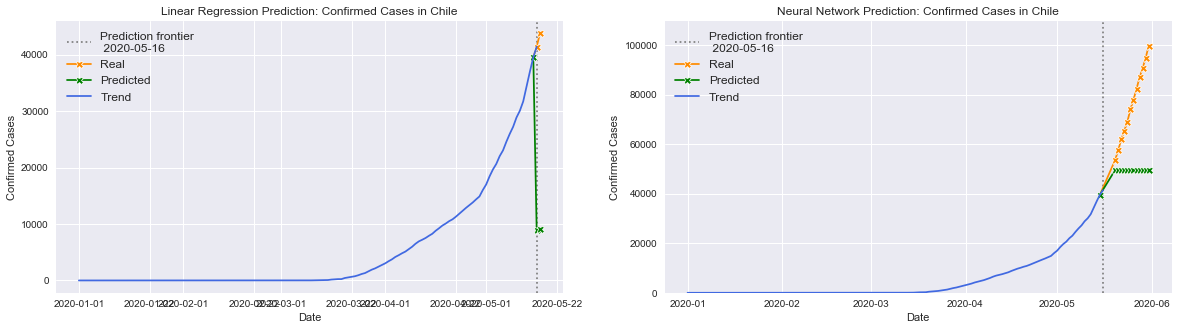

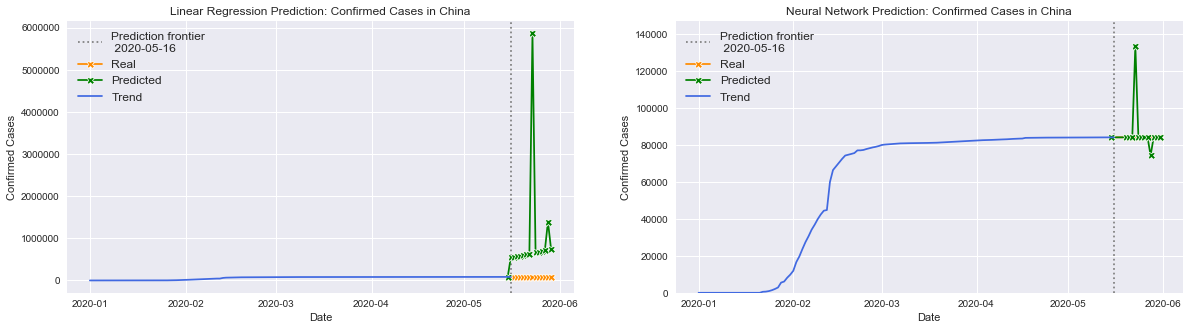

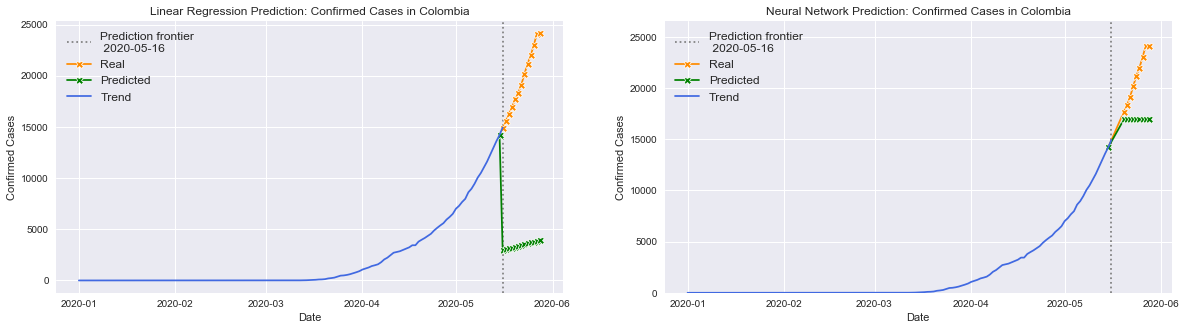

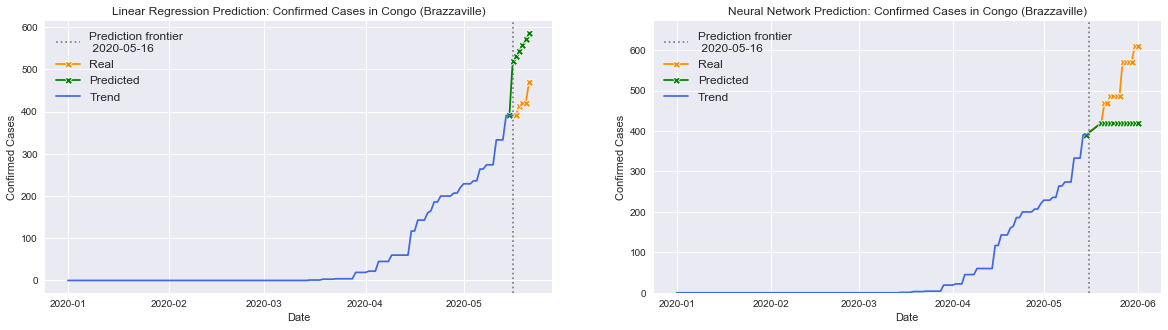

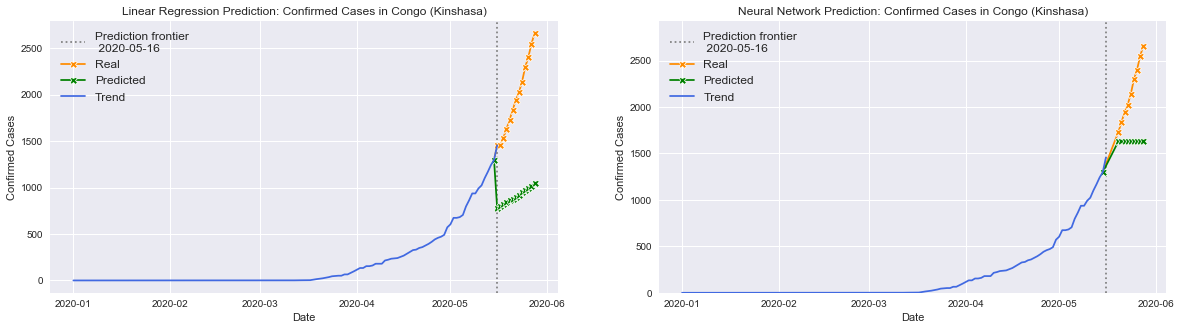

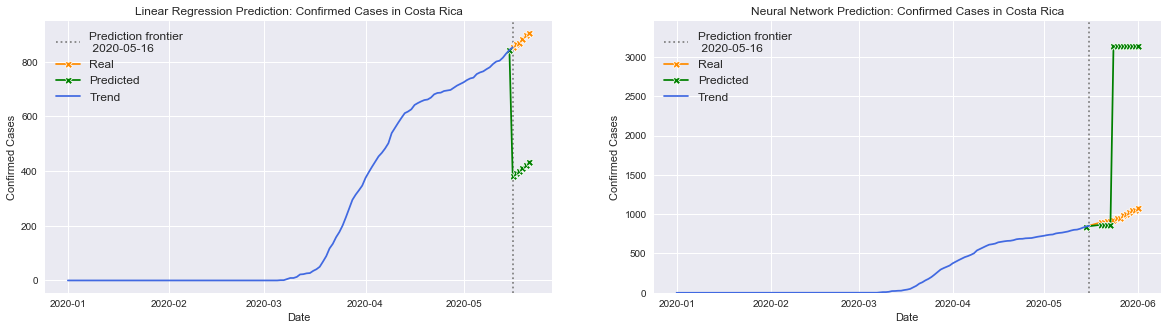

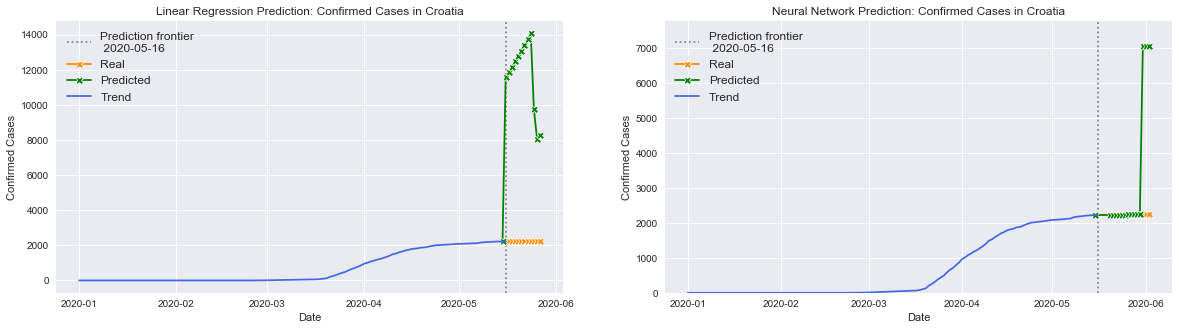

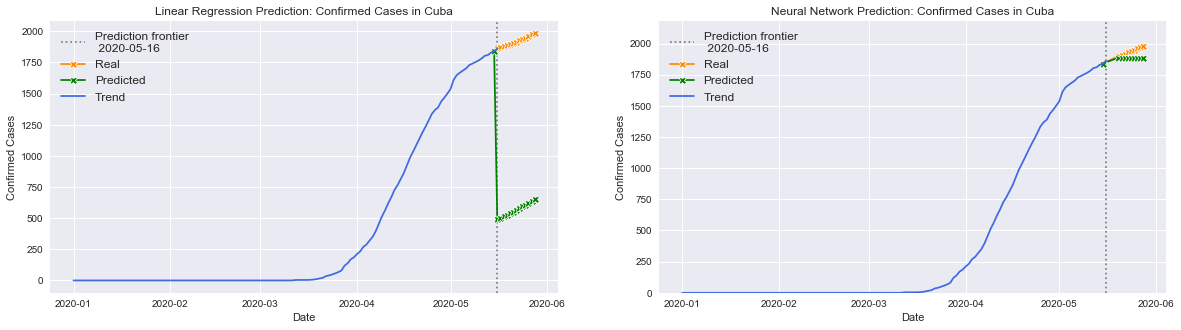

country missing: Cyprus 





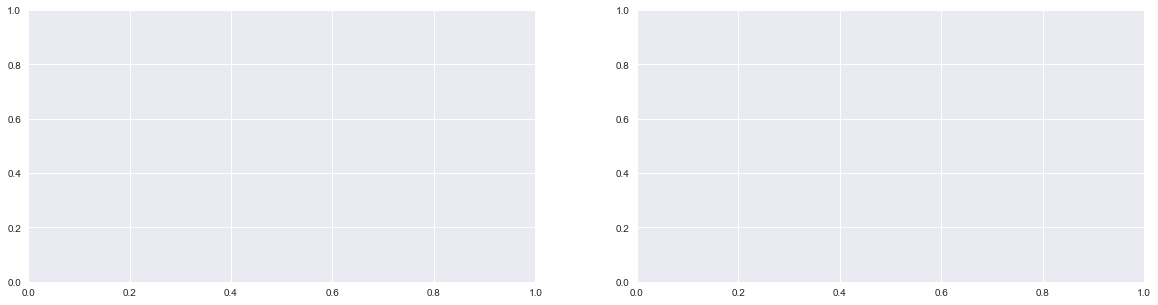

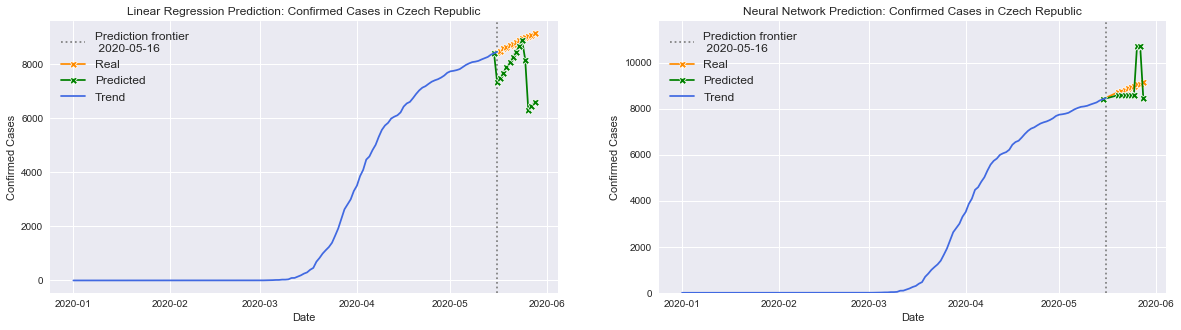

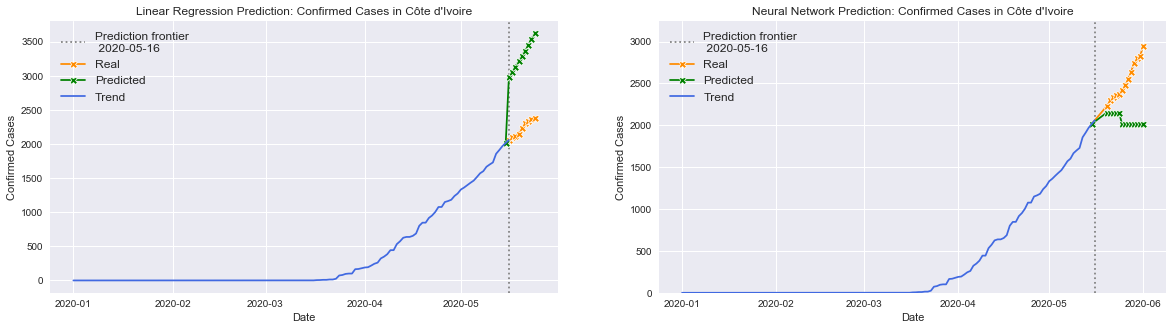

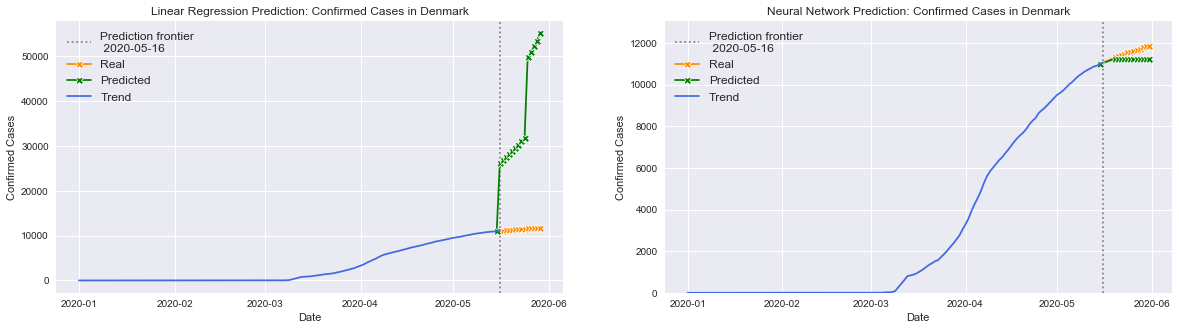

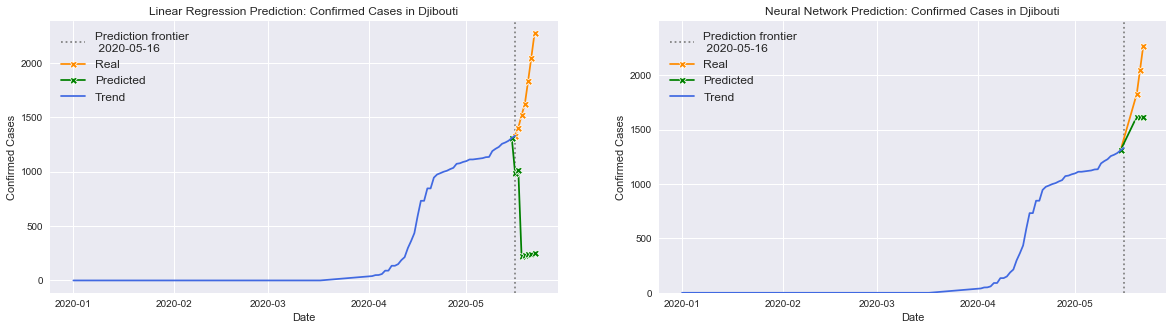

country missing: Dominican Republic 





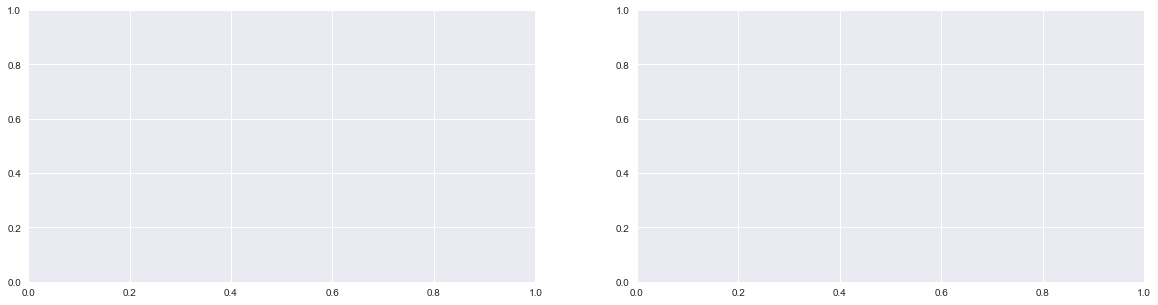

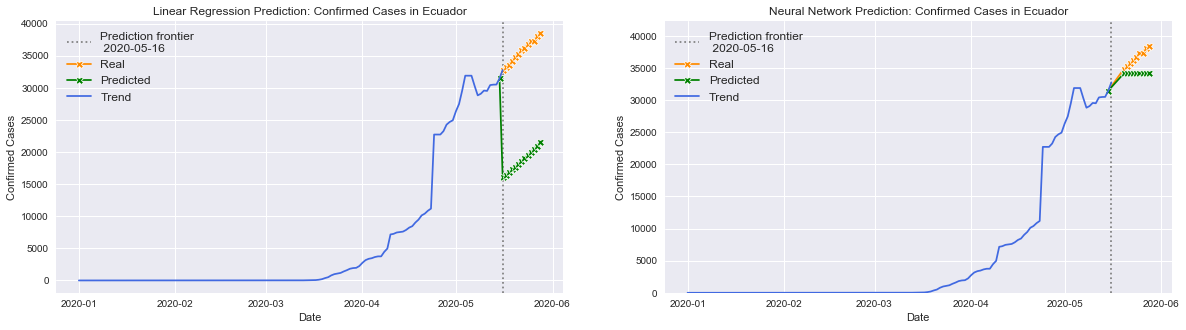

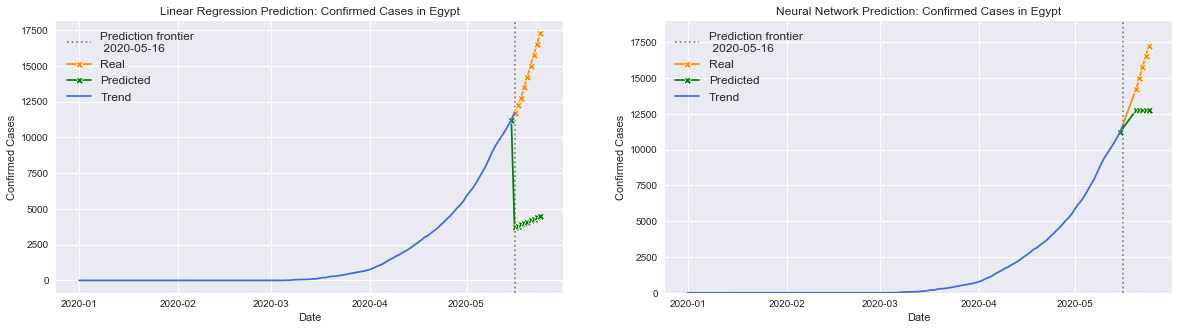

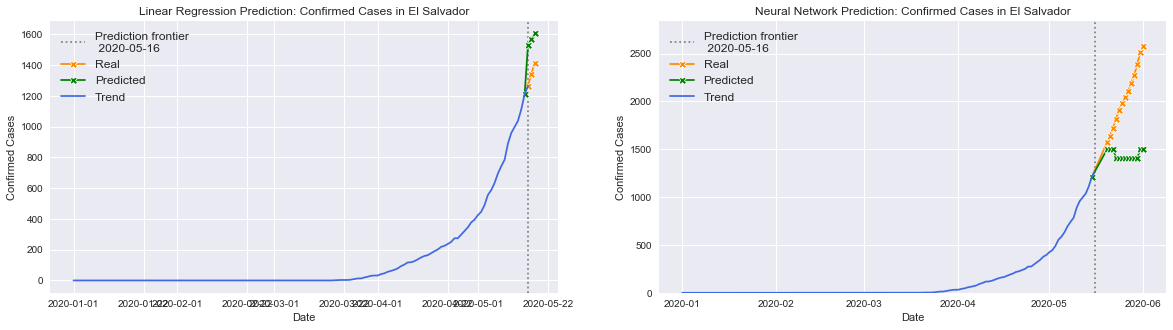

country missing: Eritrea 





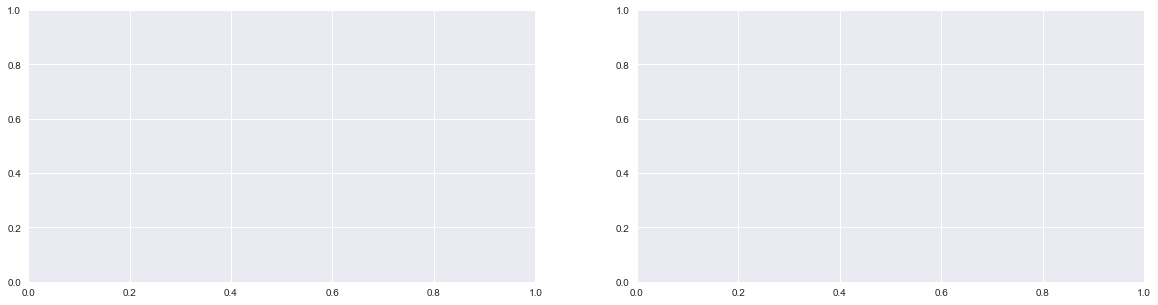

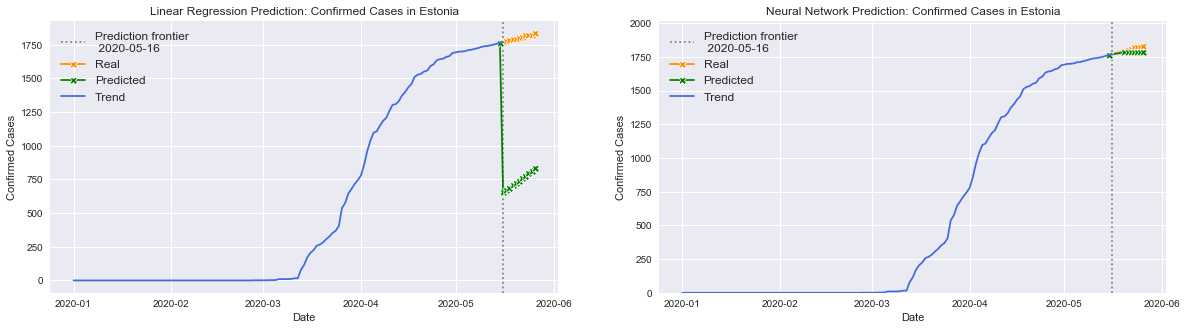

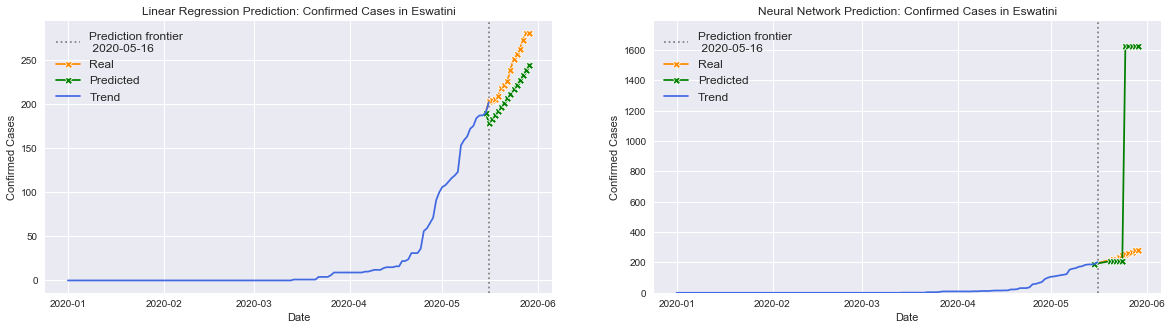

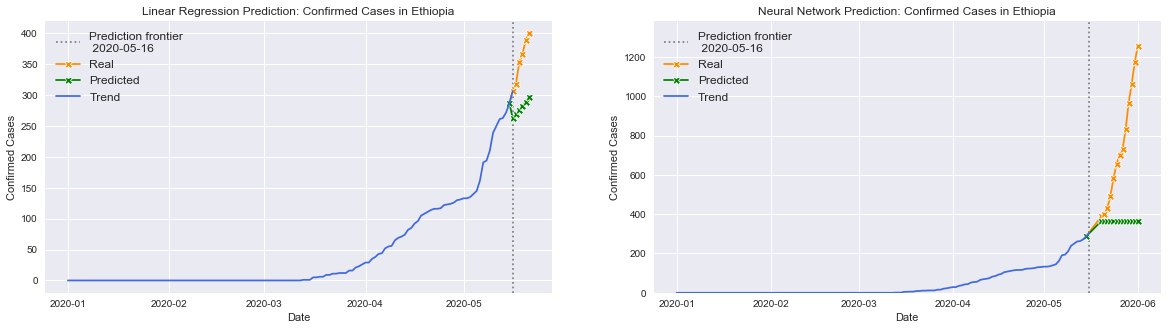

country missing: Fiji 





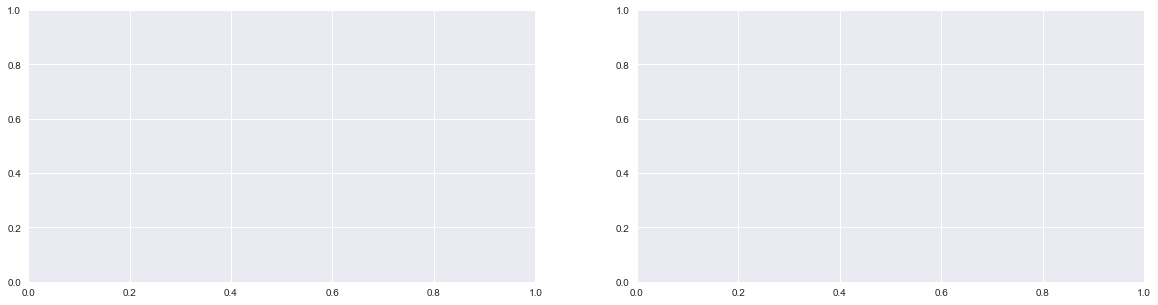

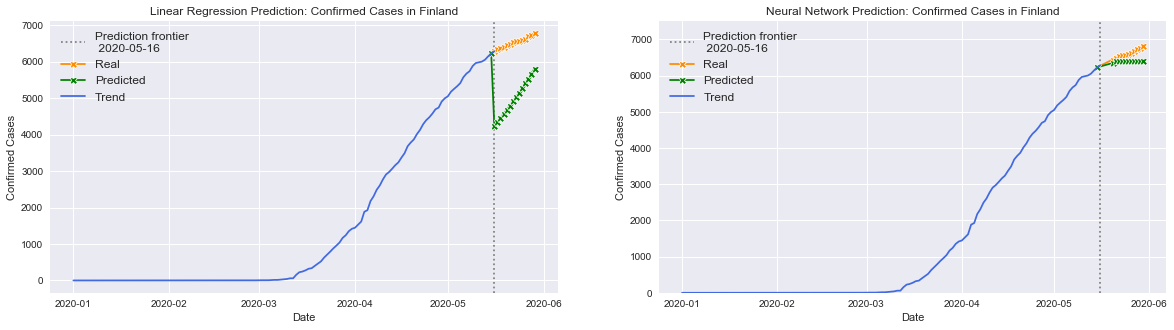

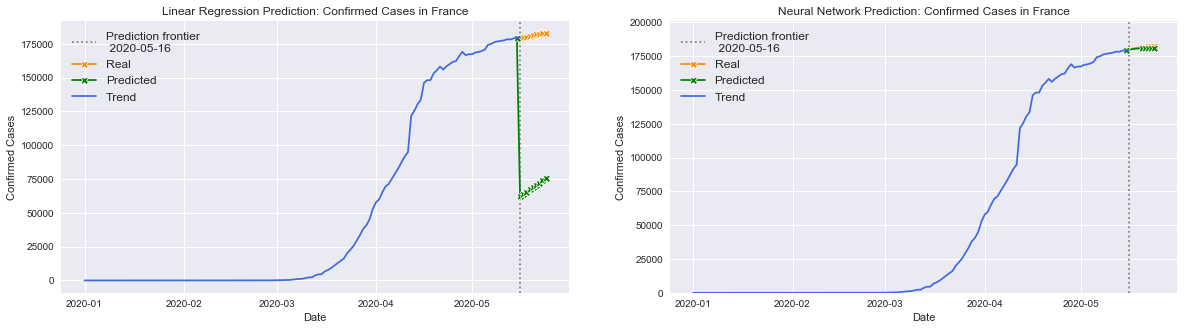

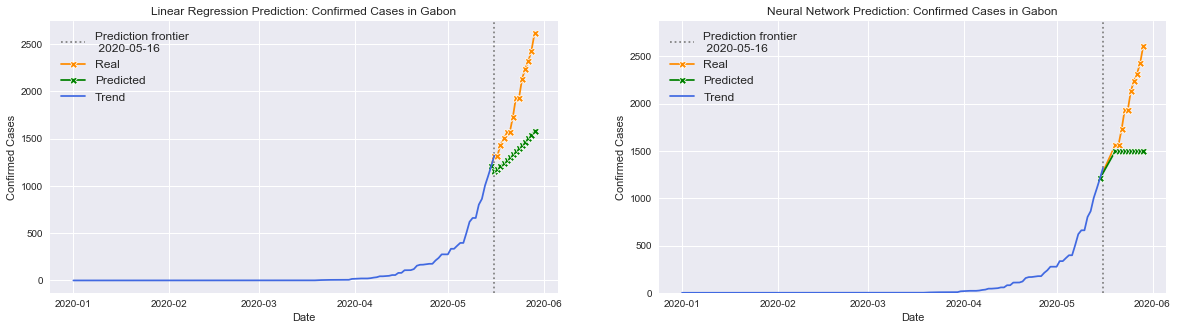

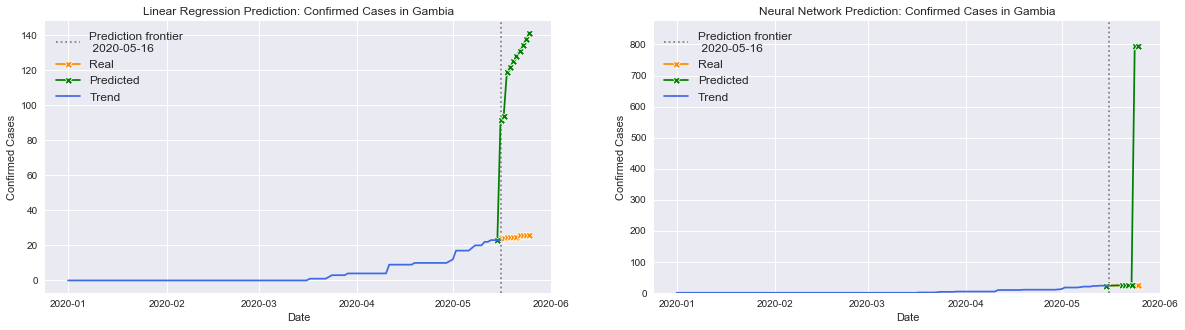

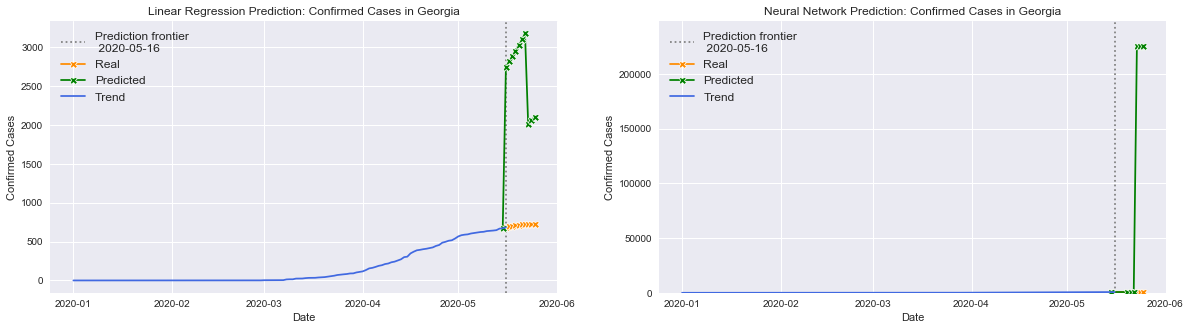

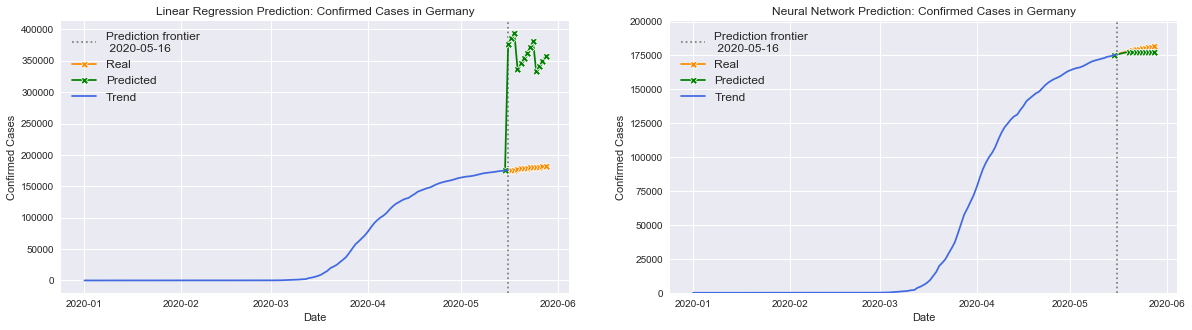

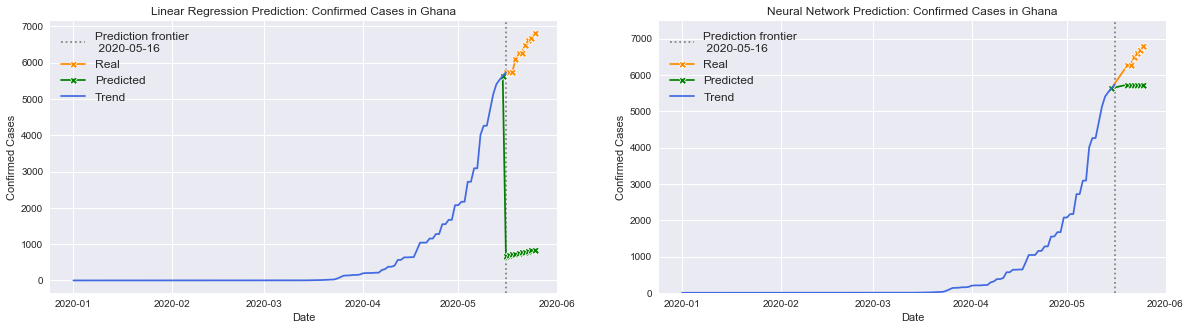

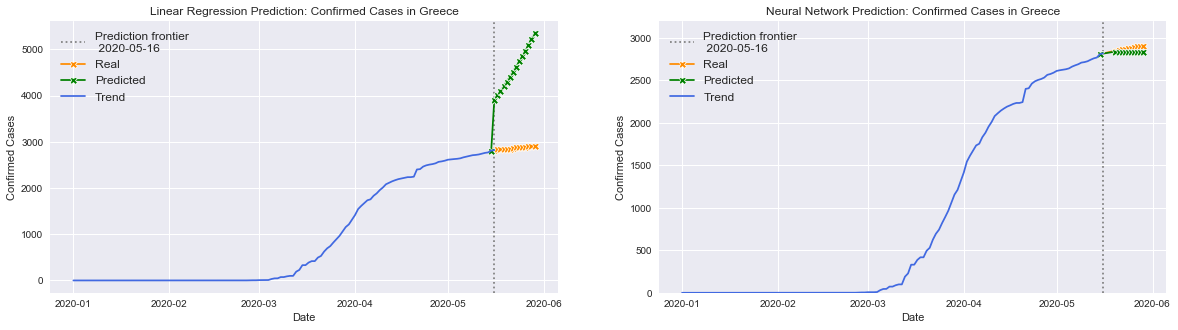

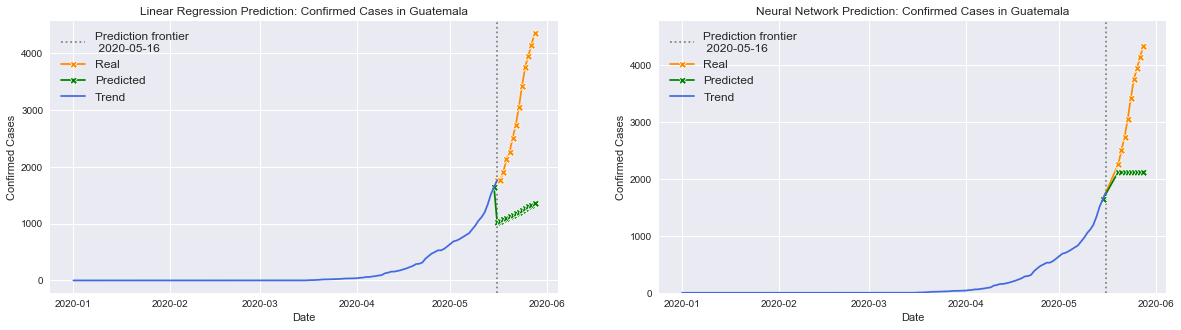

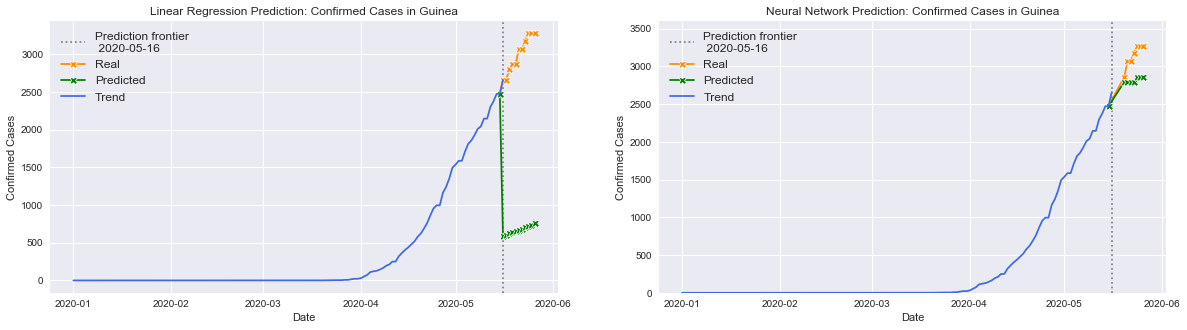

country missing: Haiti 





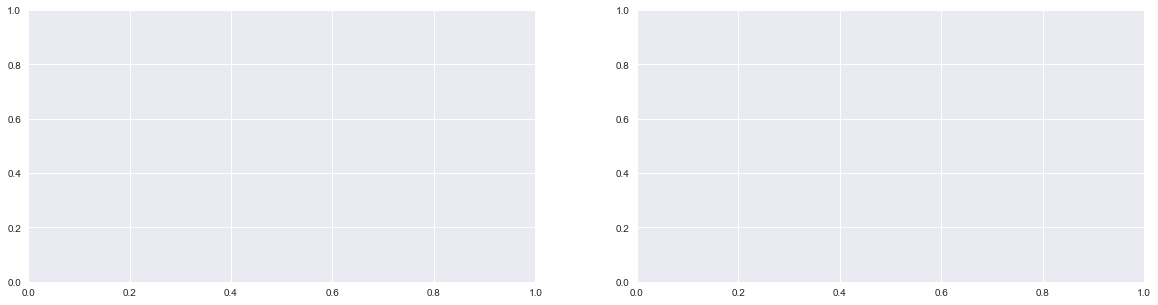

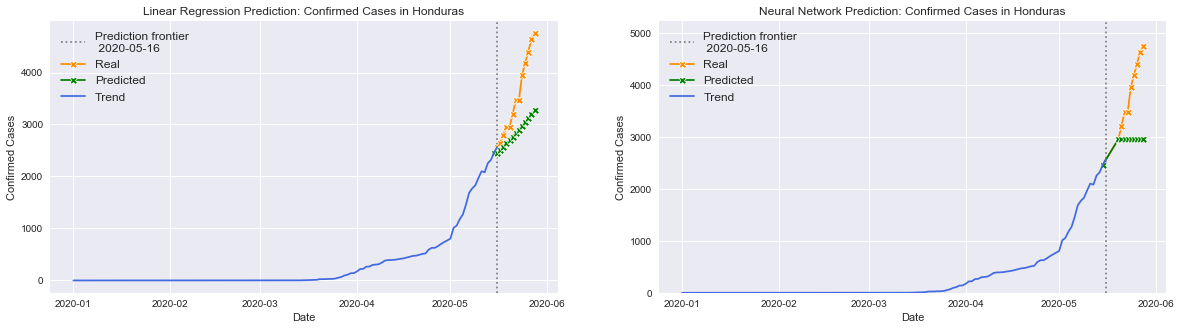

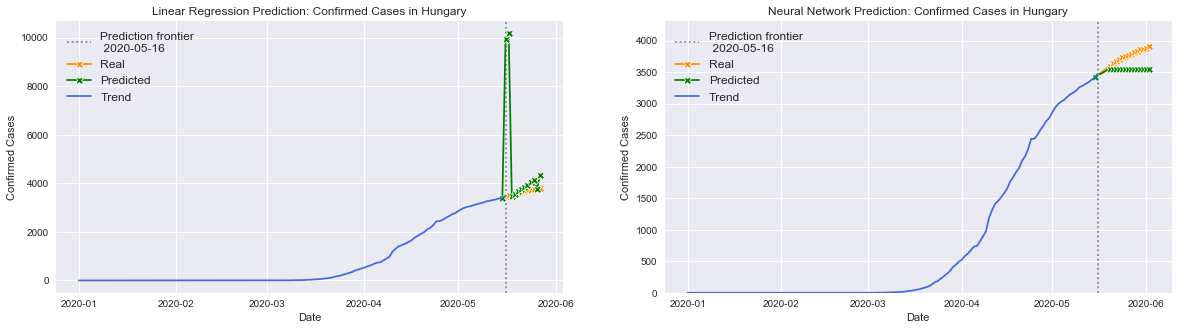

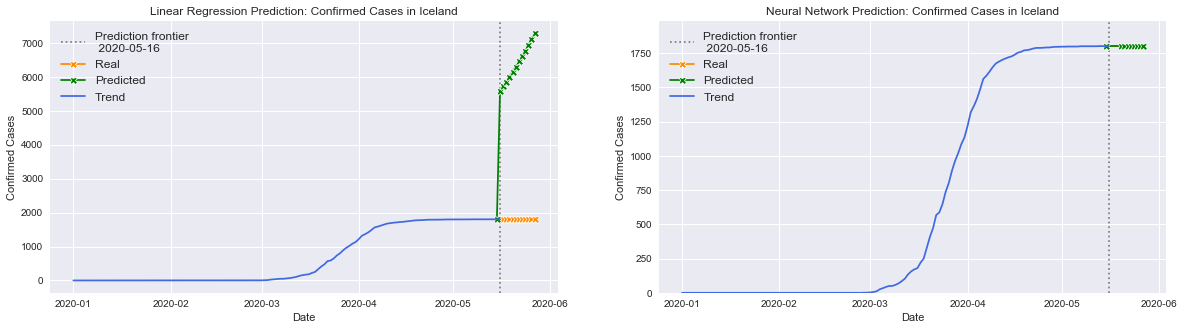

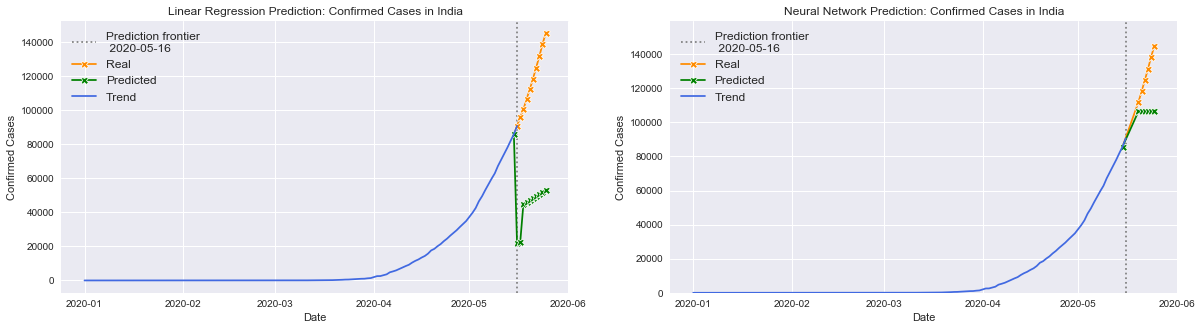

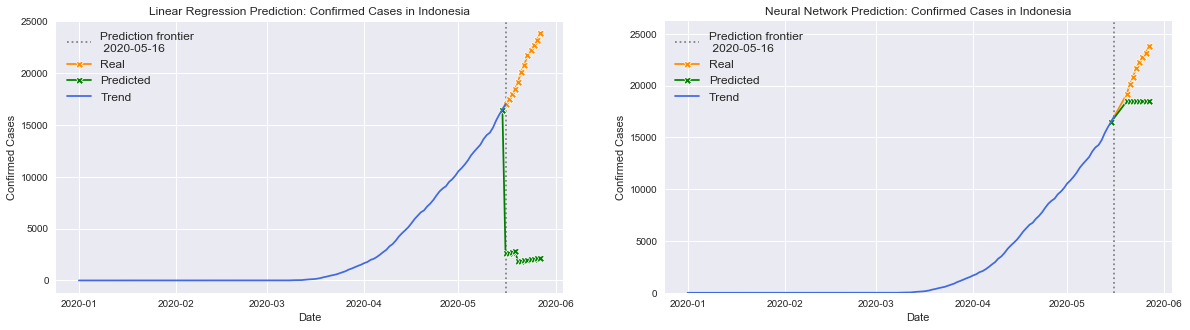

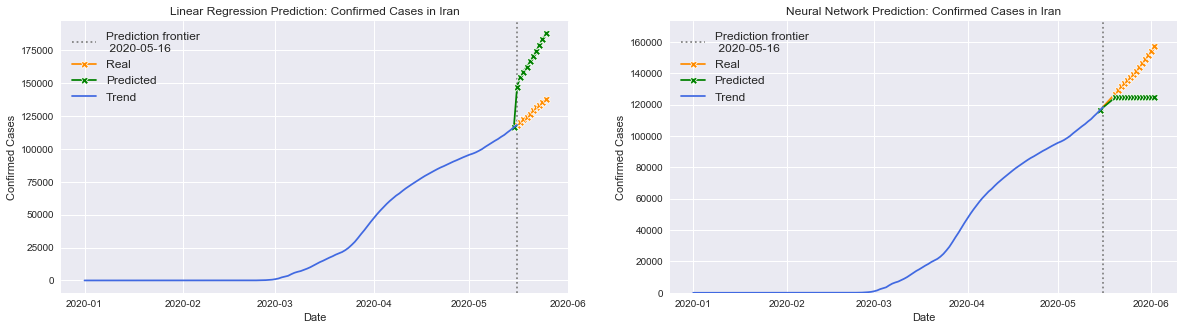

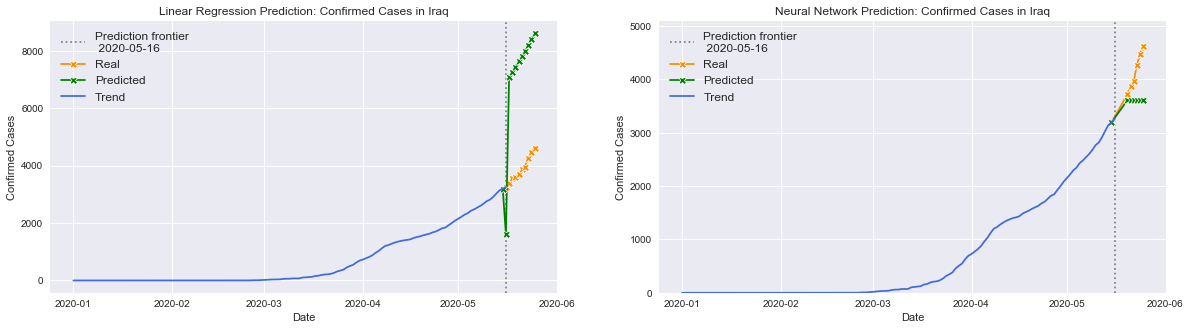

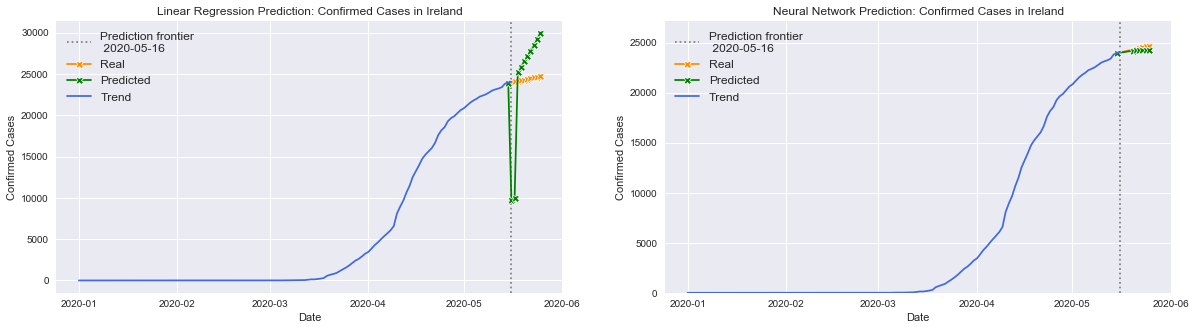

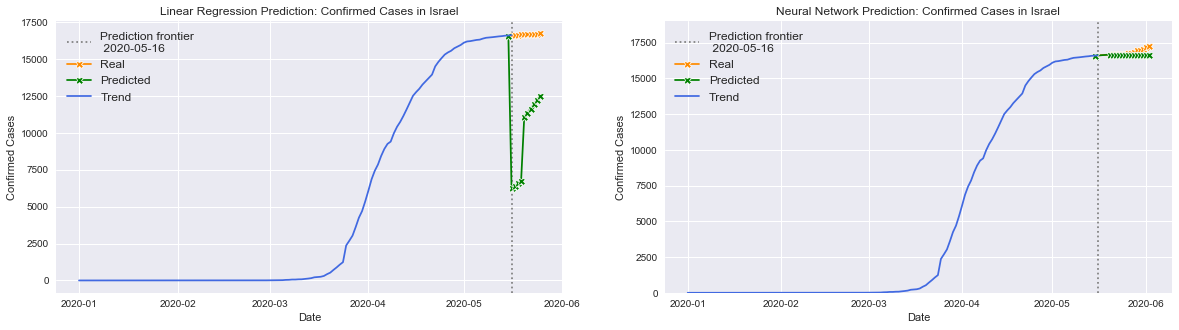

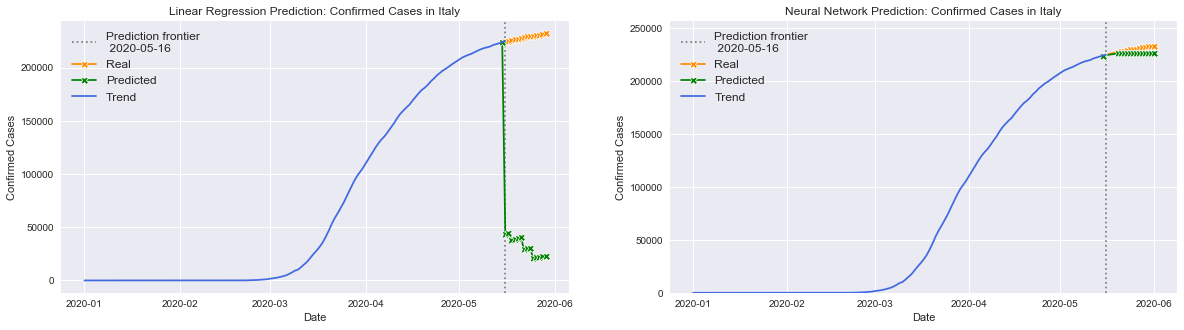

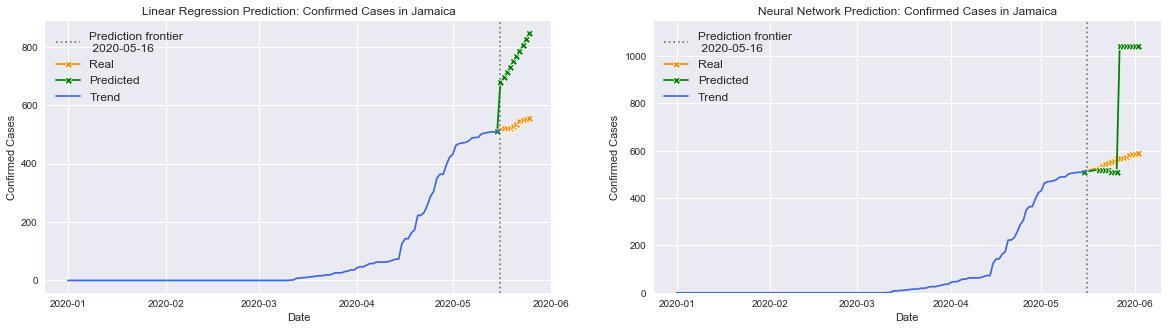

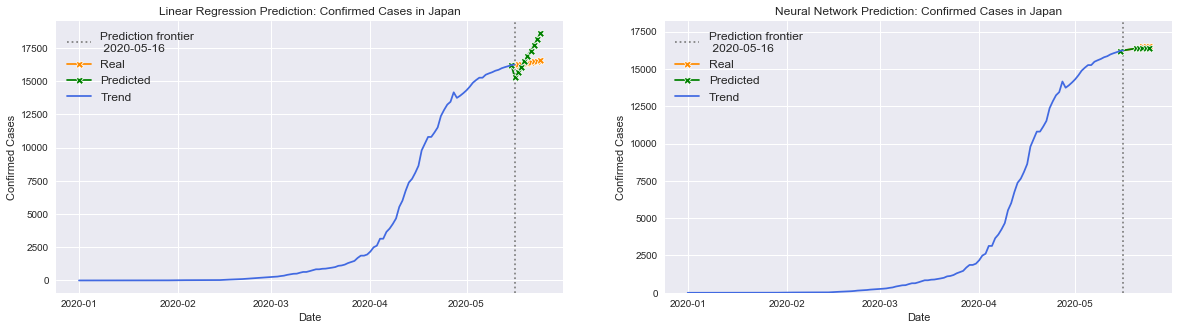

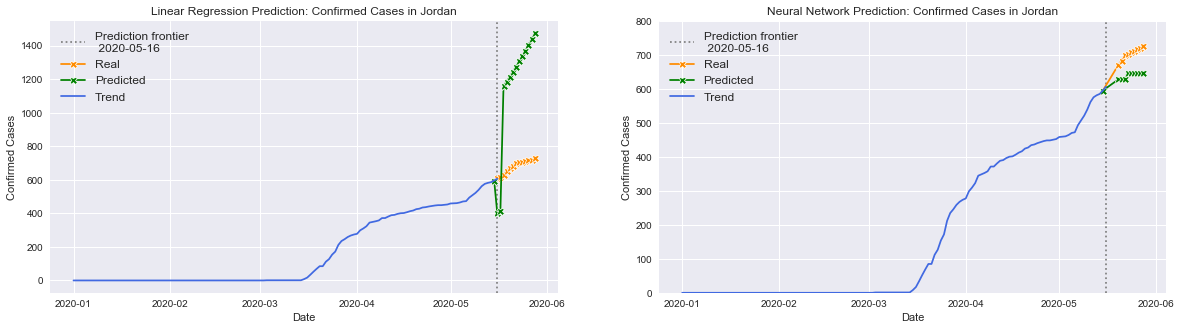

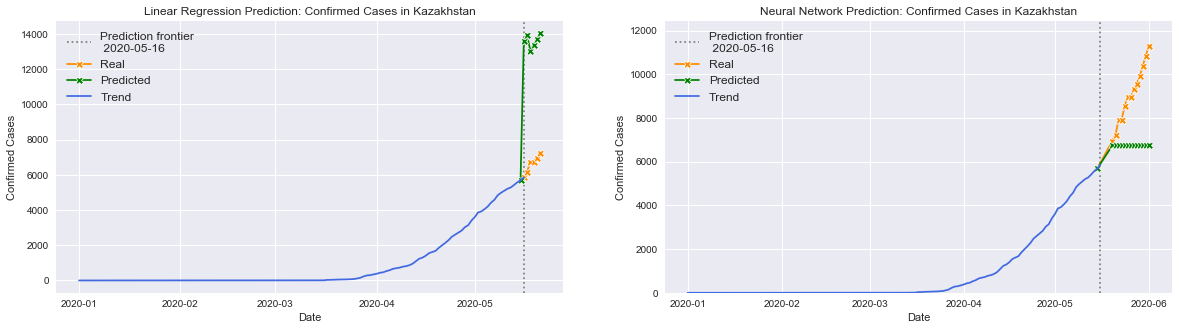

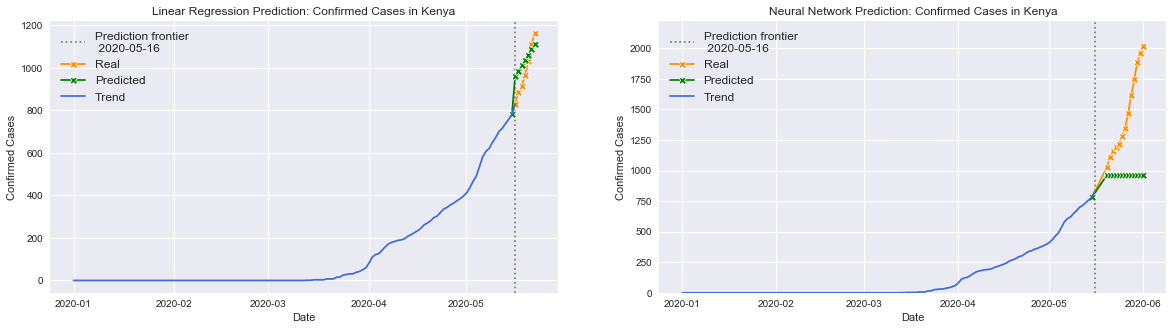

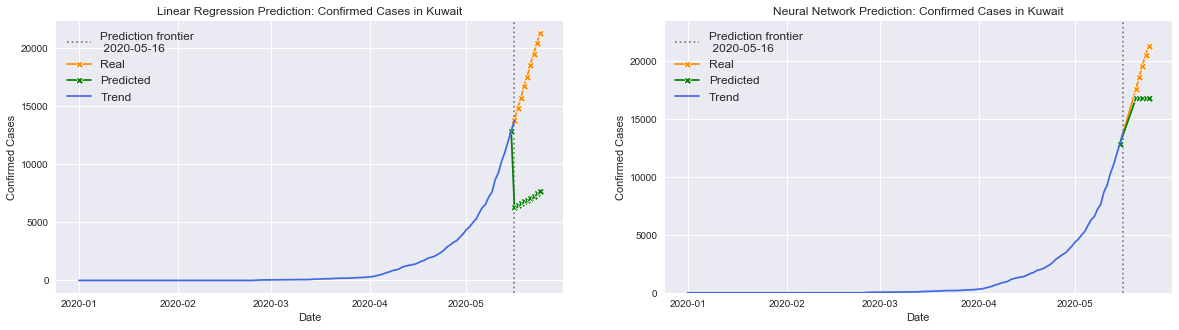

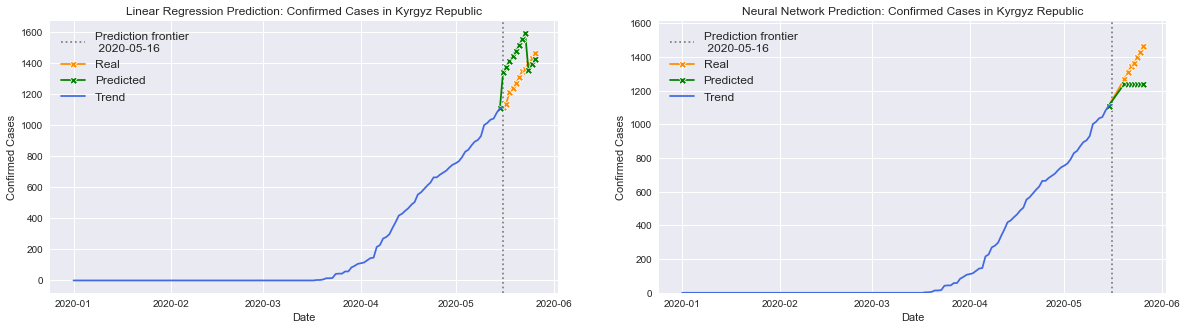

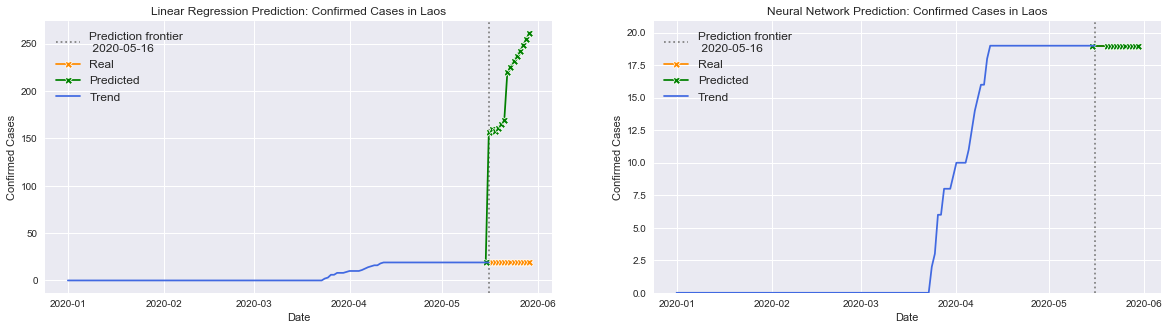

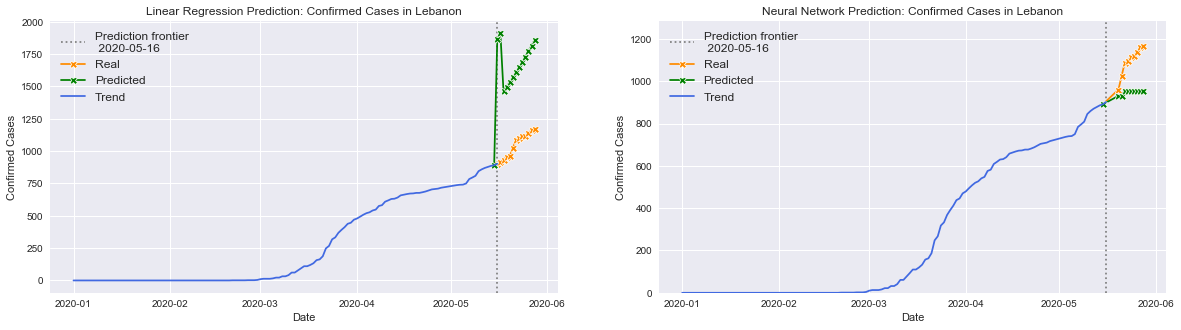

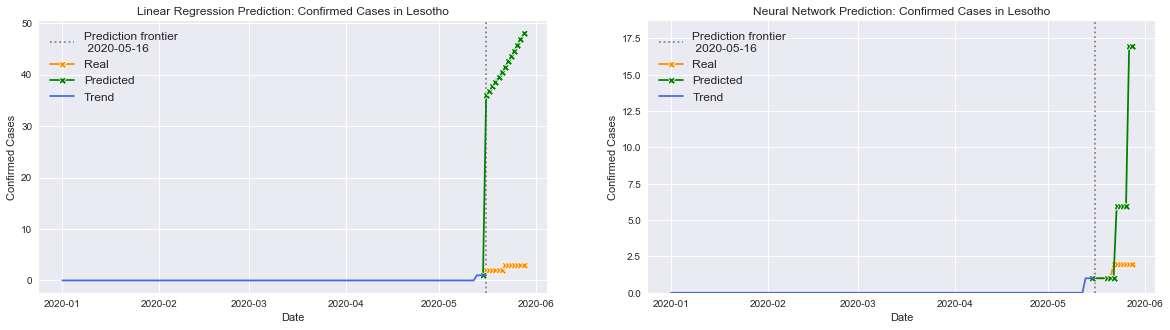

country missing: Liberia 





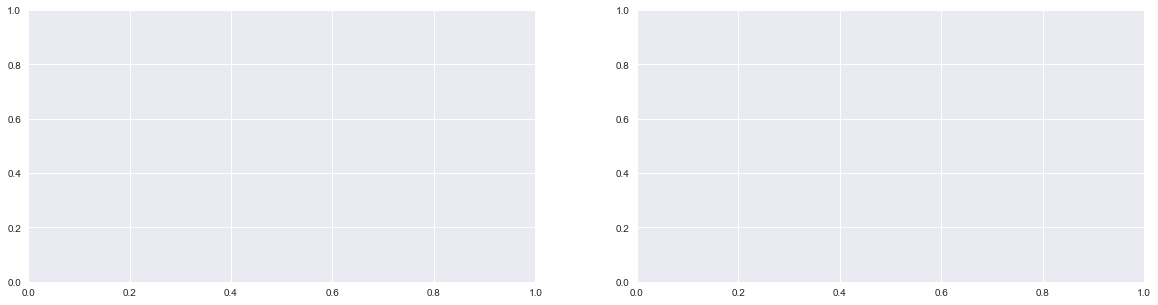

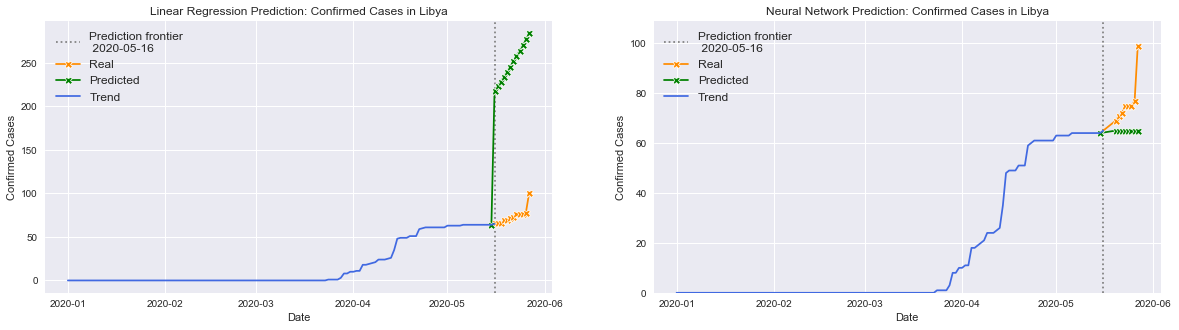

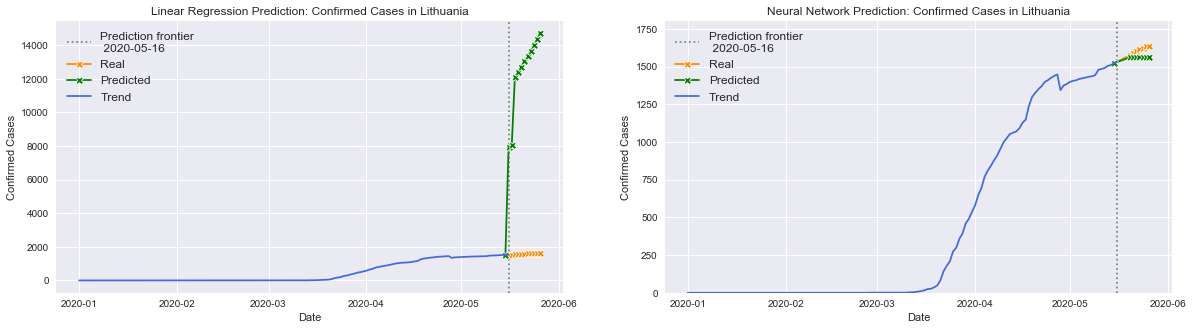

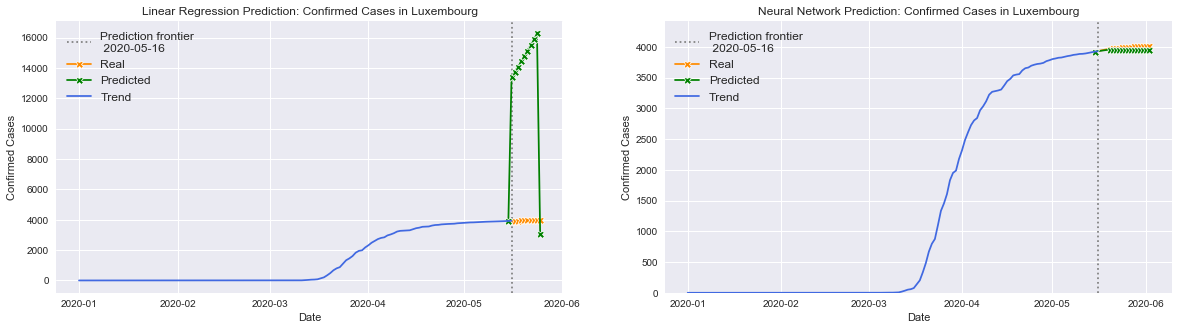

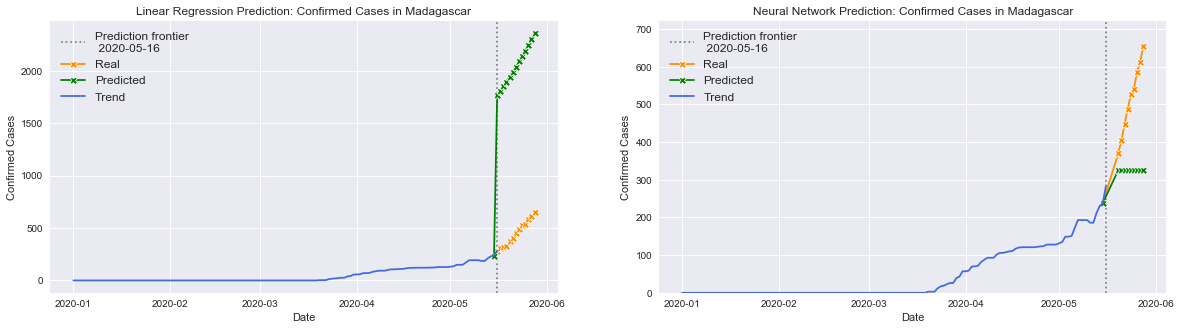

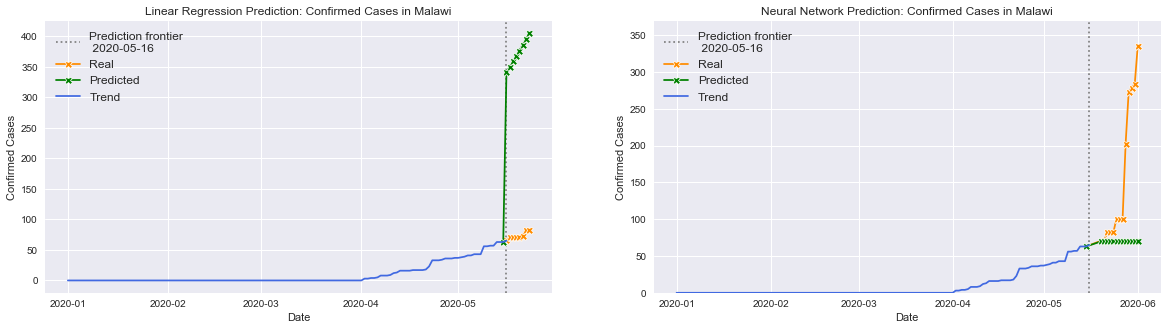

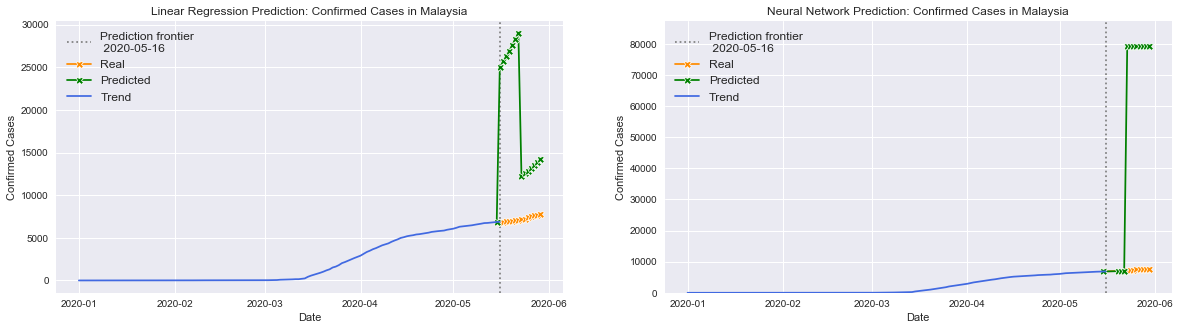

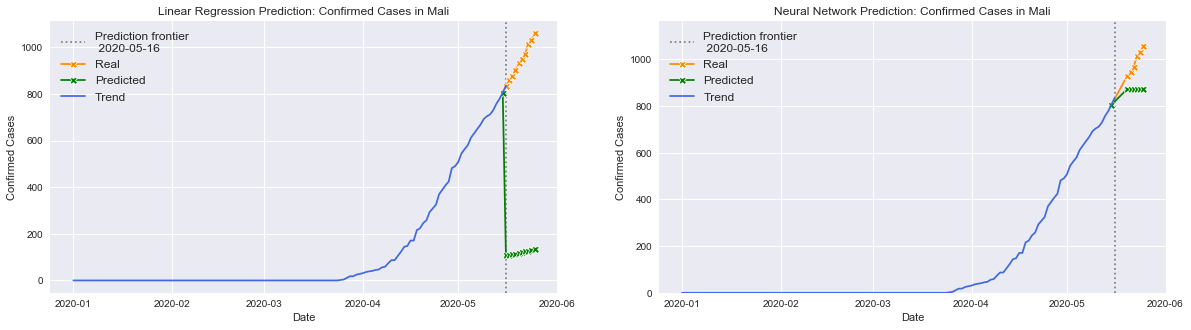

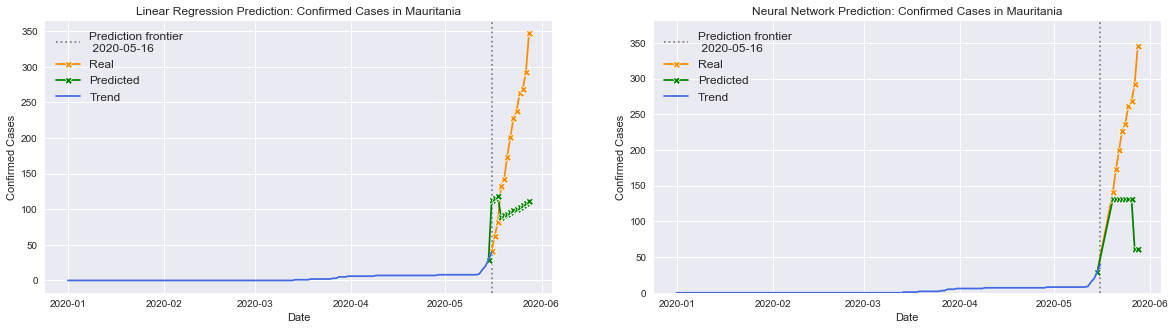

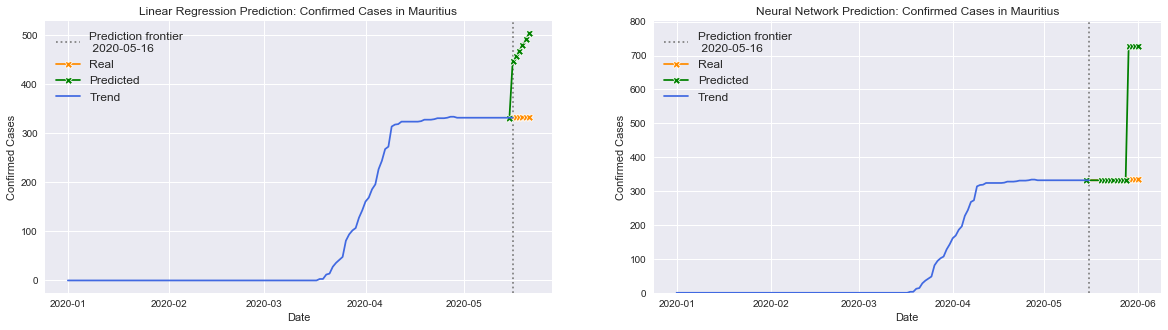

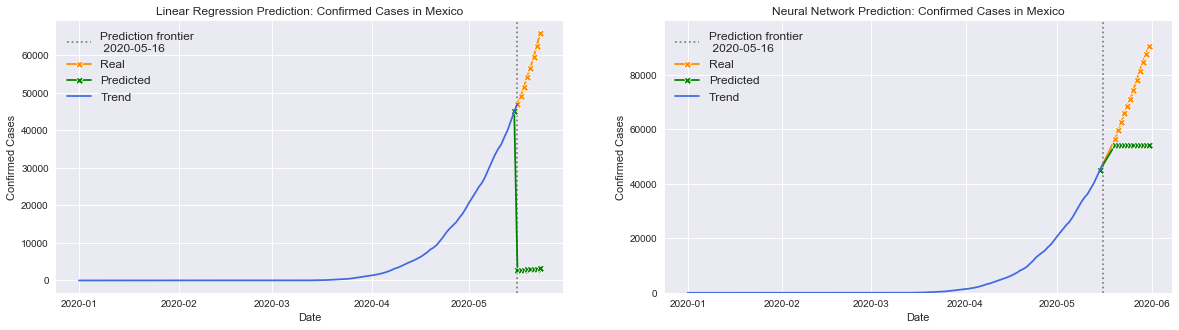

country missing: Moldova 





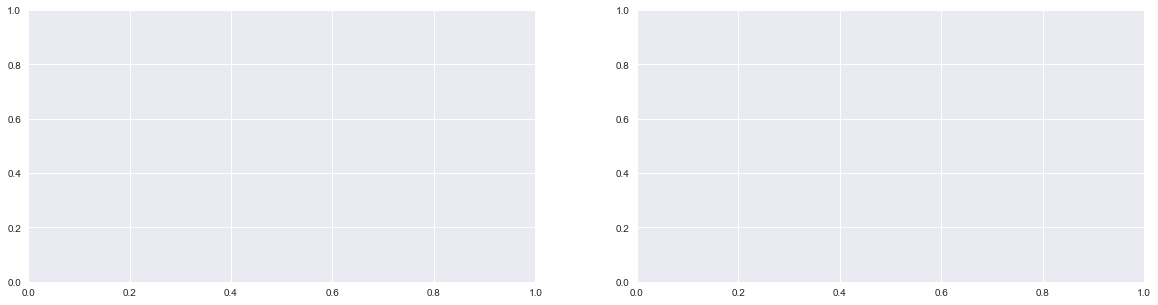

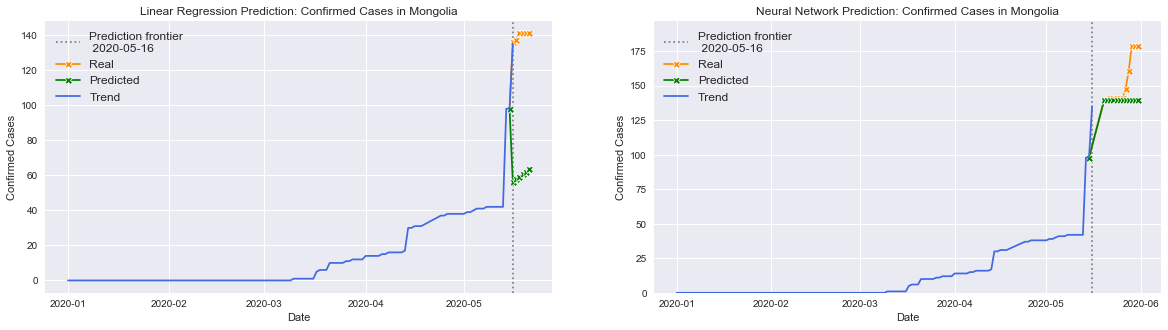

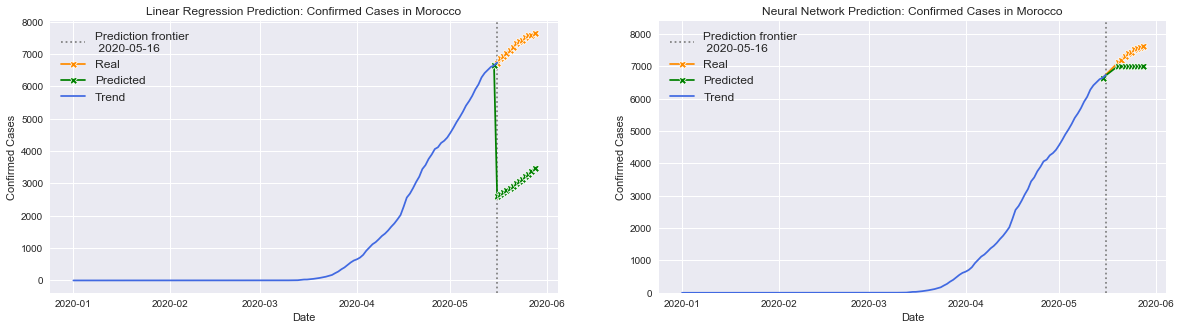

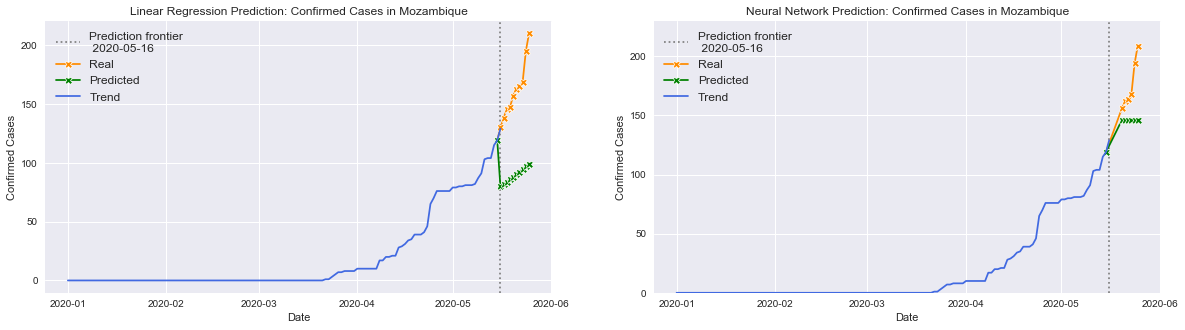

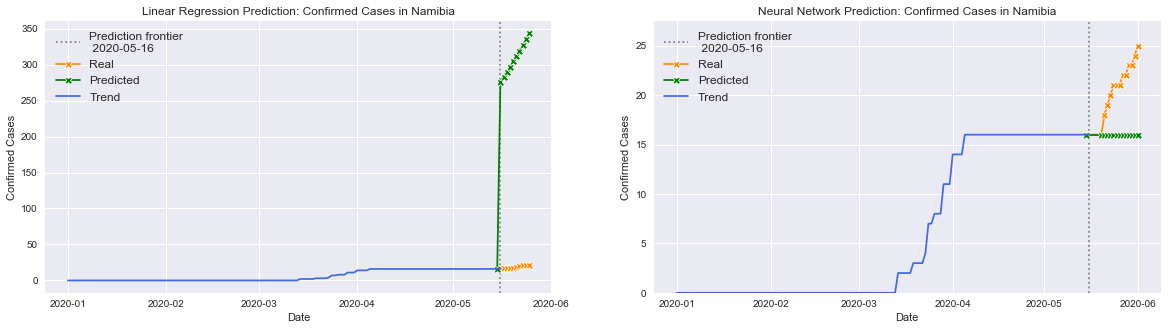

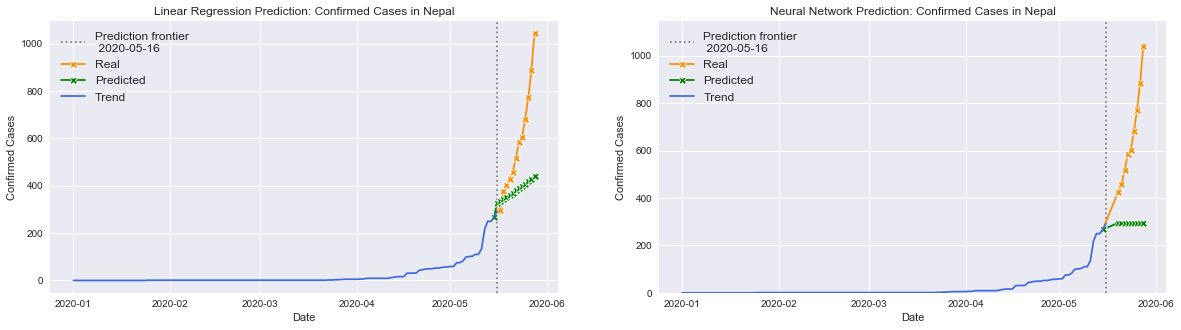

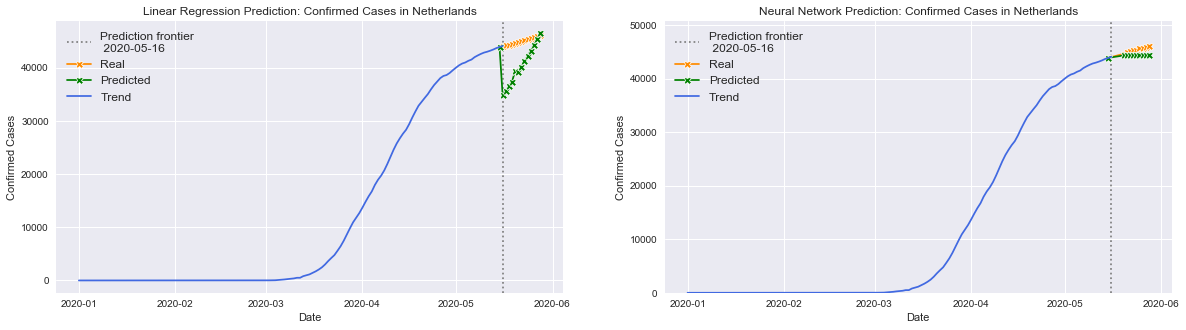

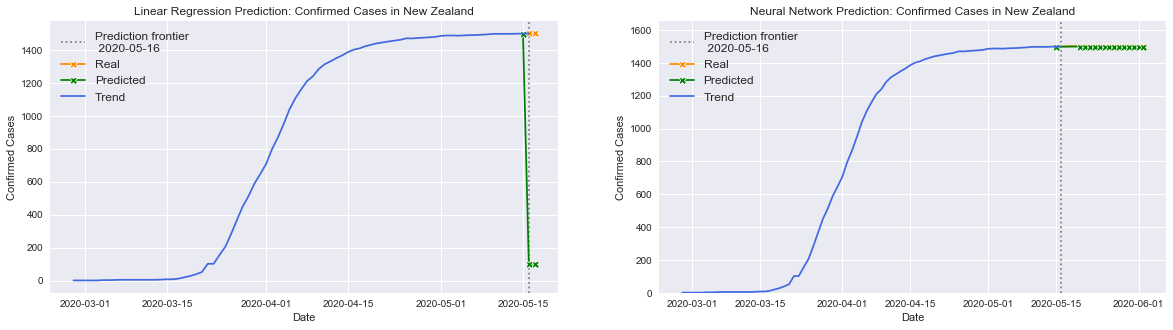

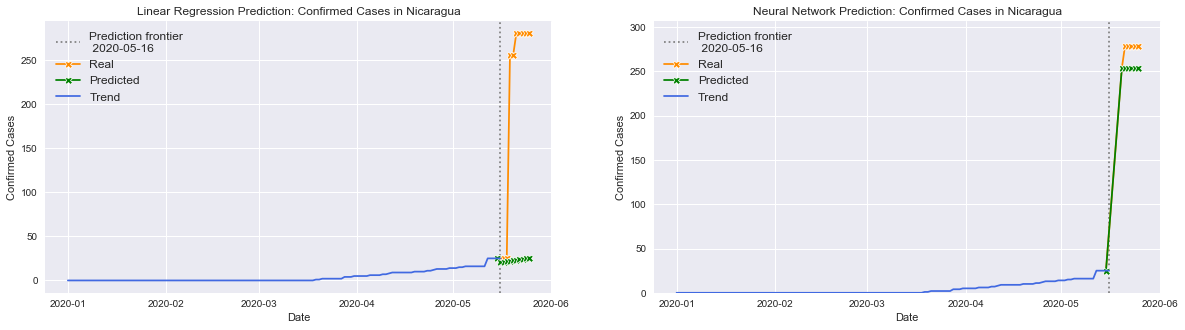

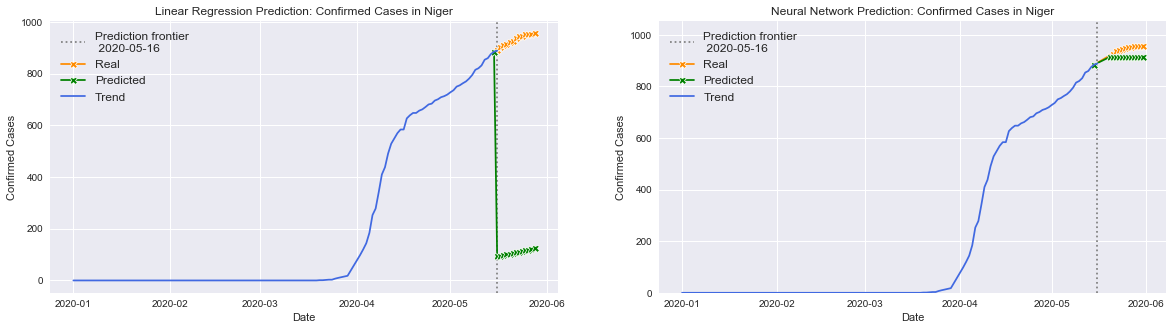

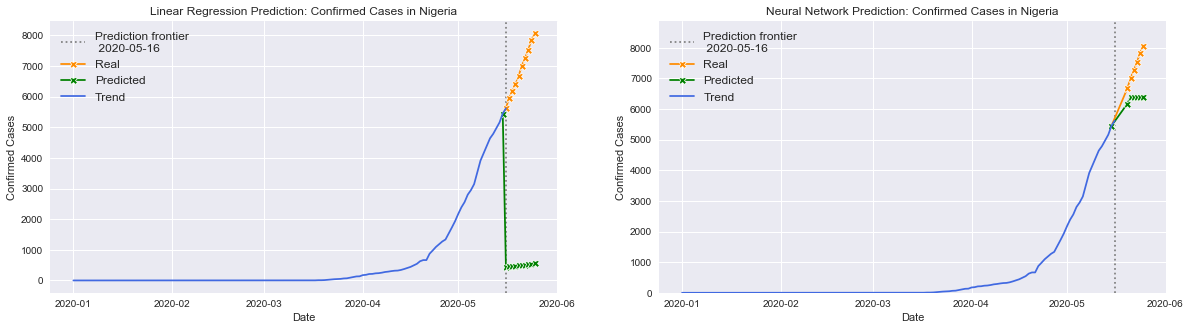

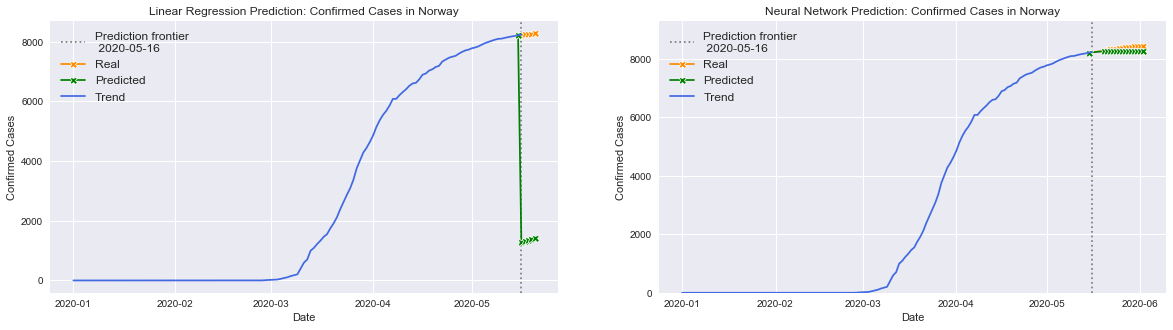

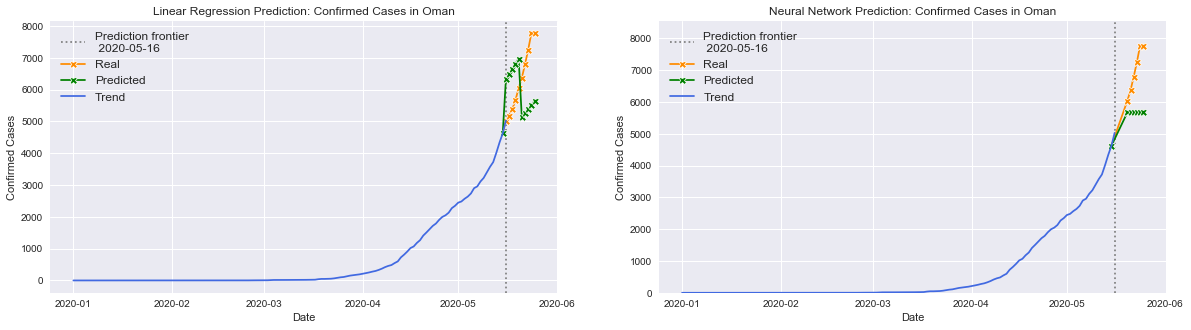

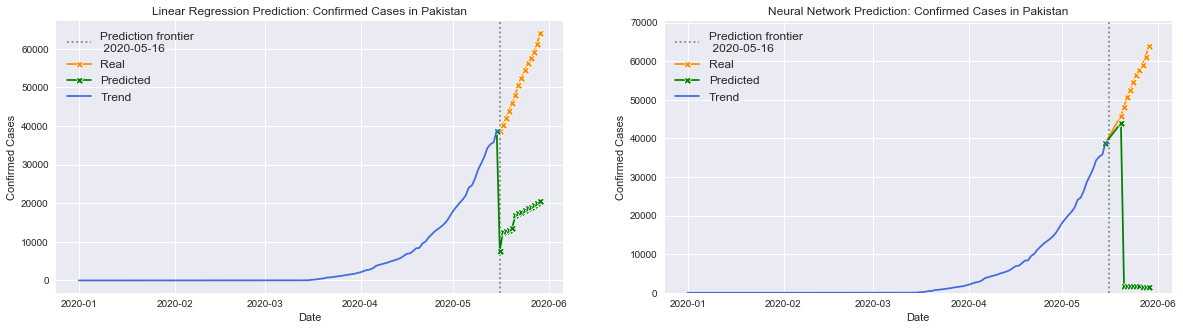

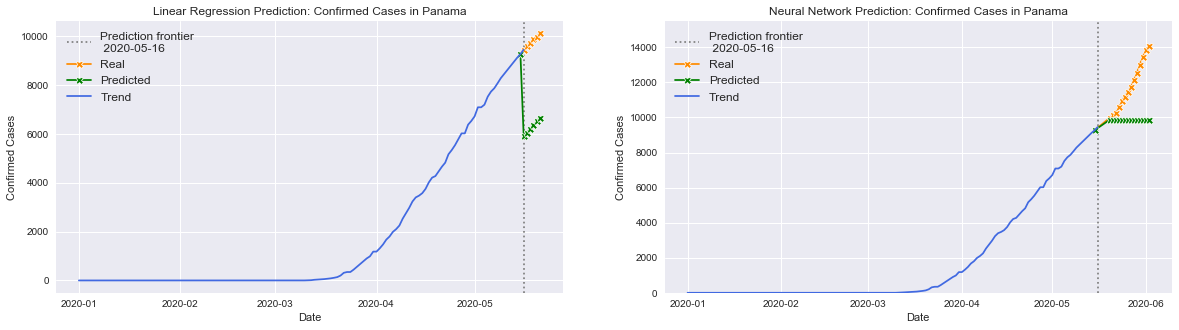

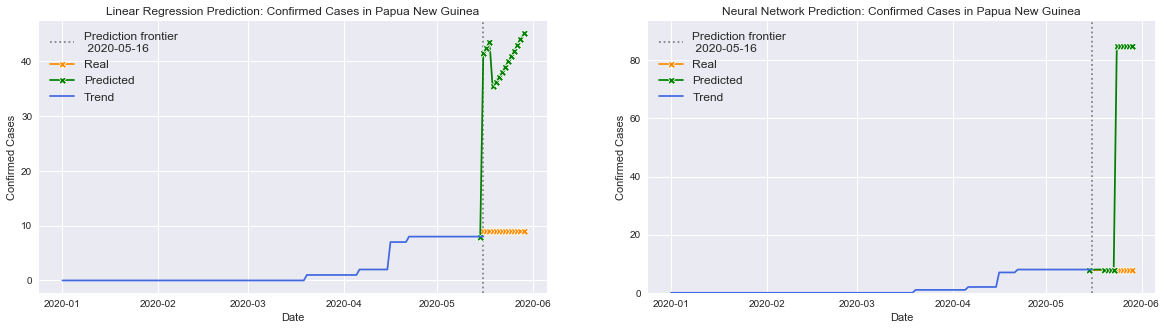

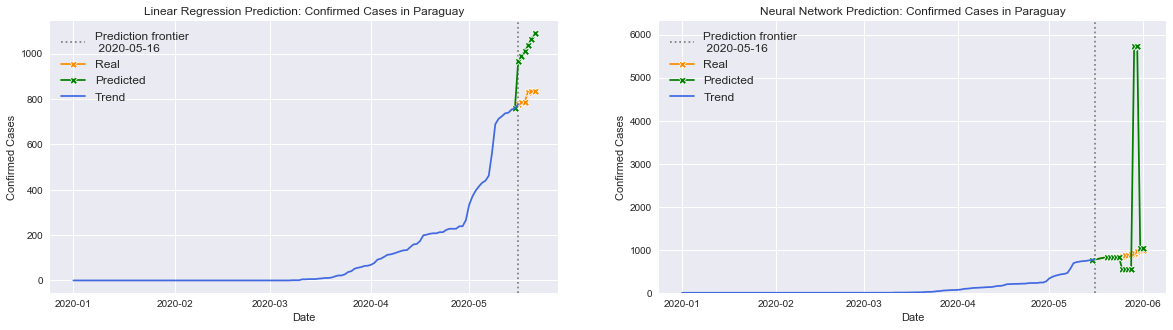

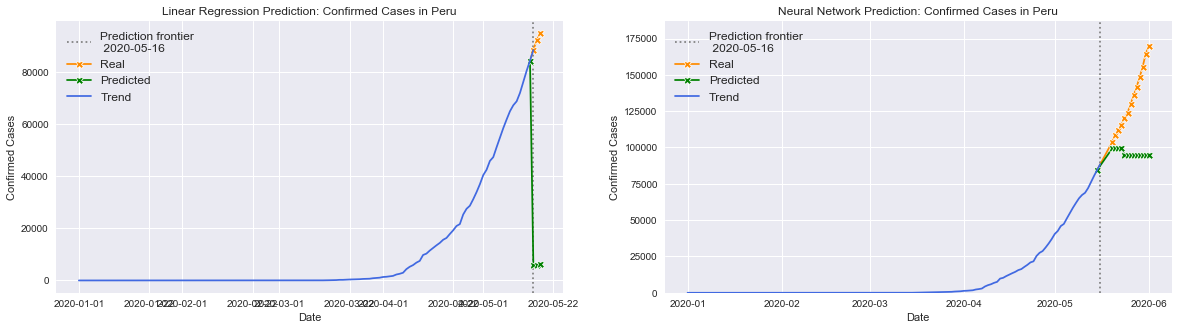

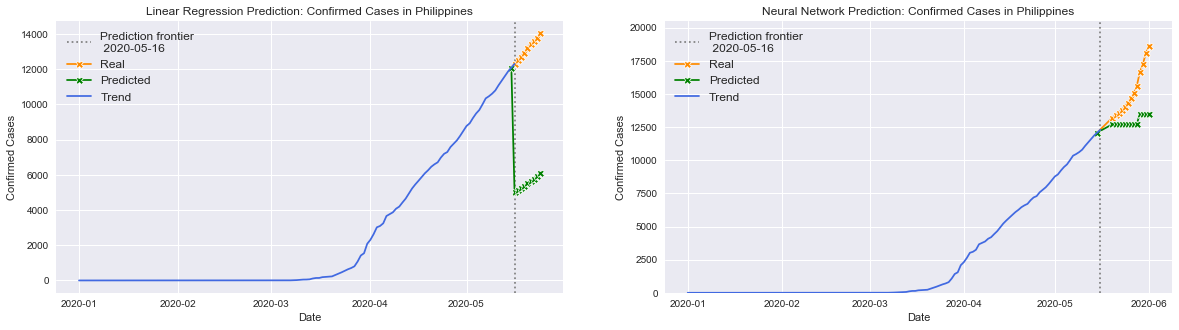

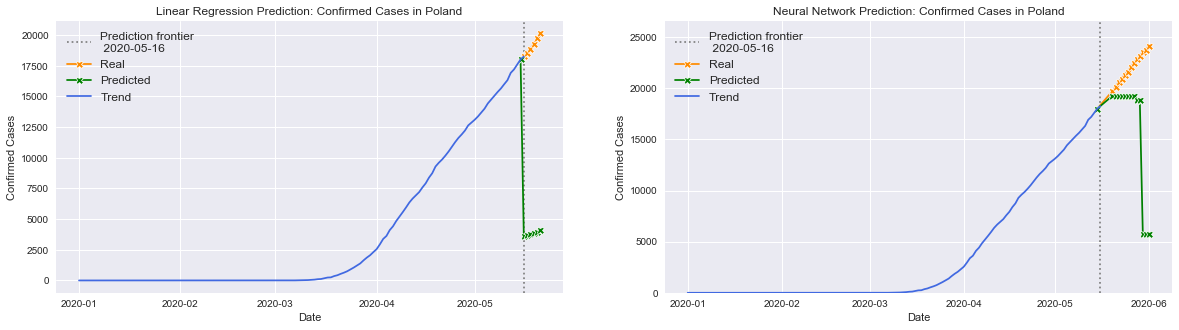

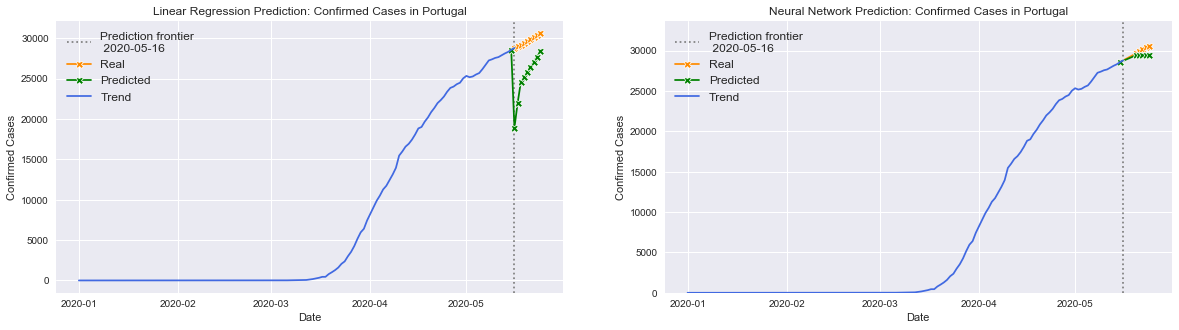

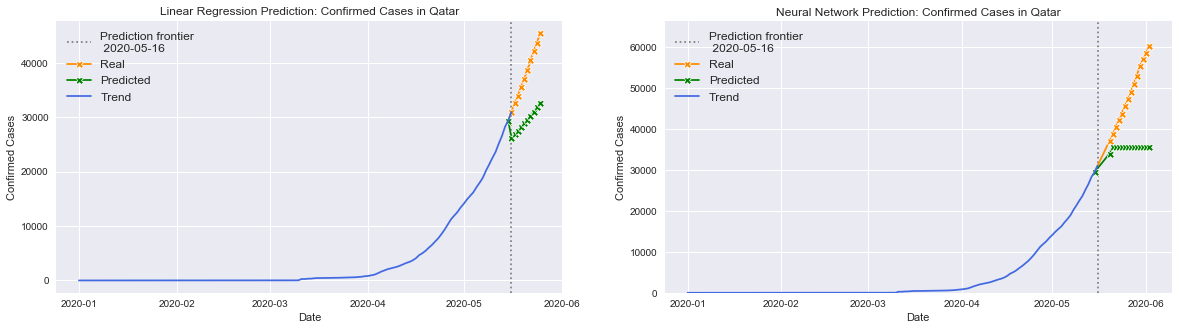

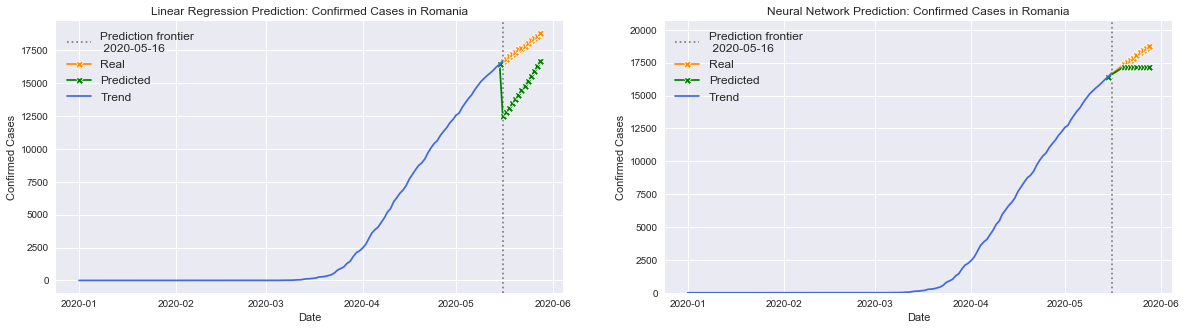

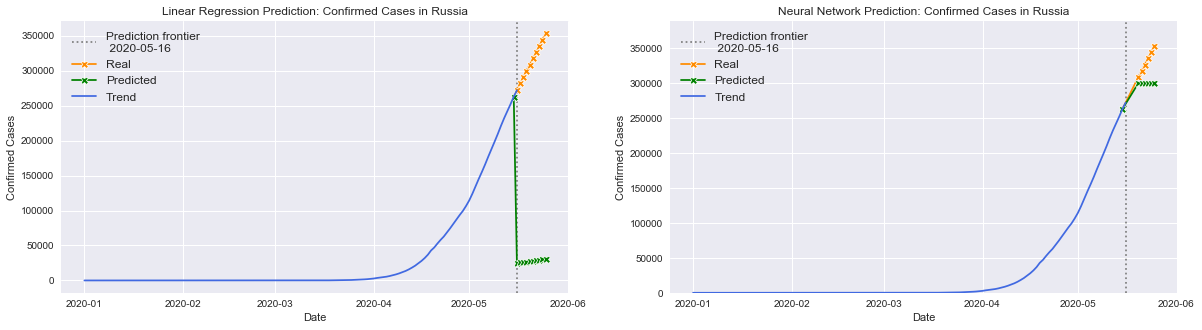

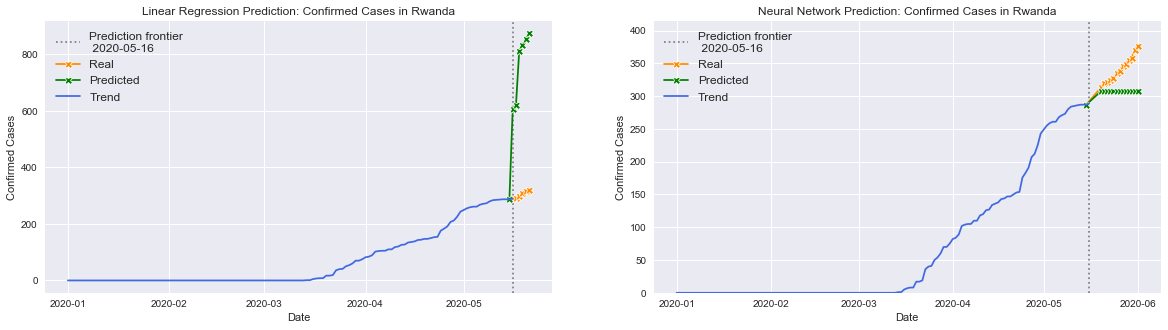

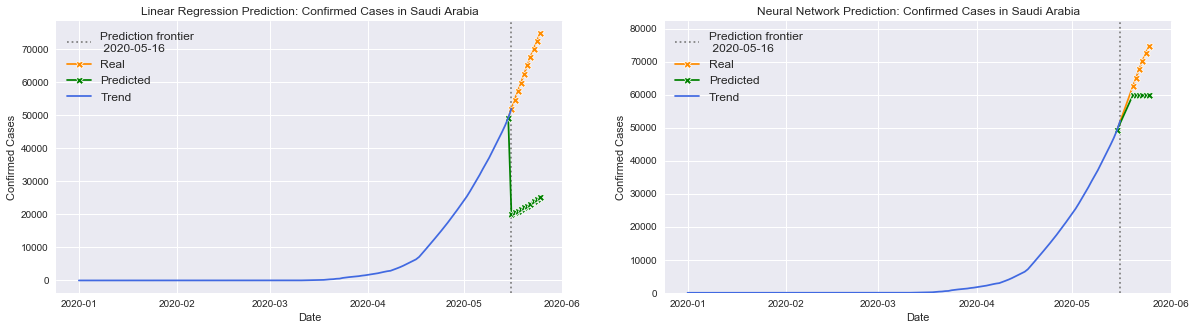

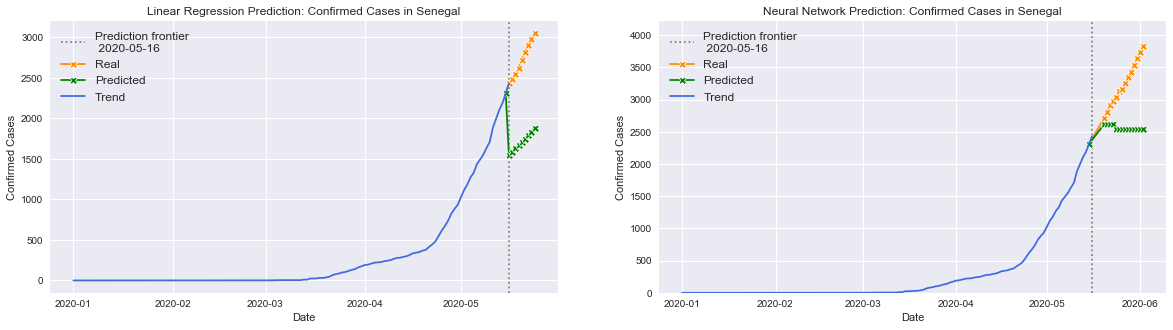

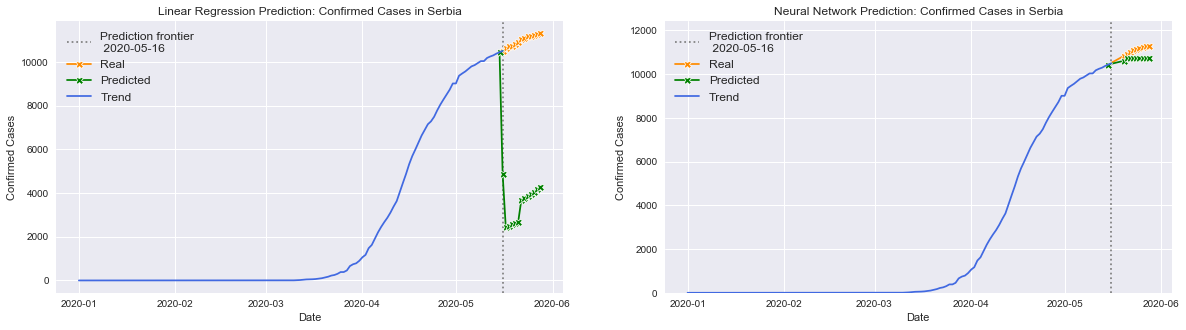

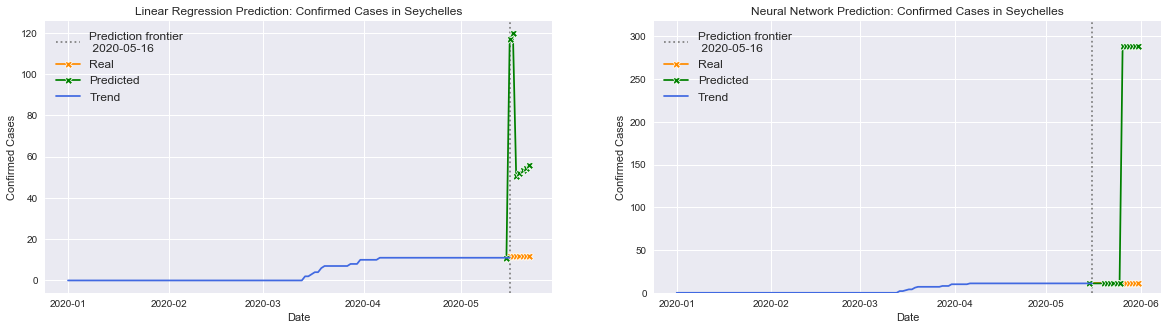

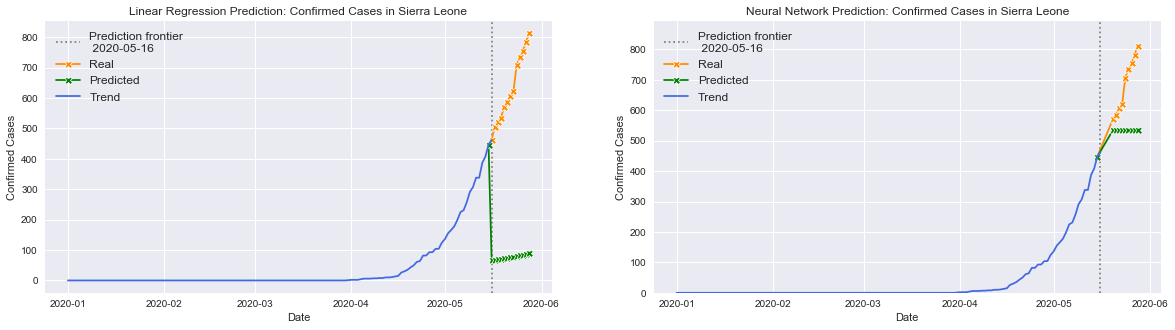

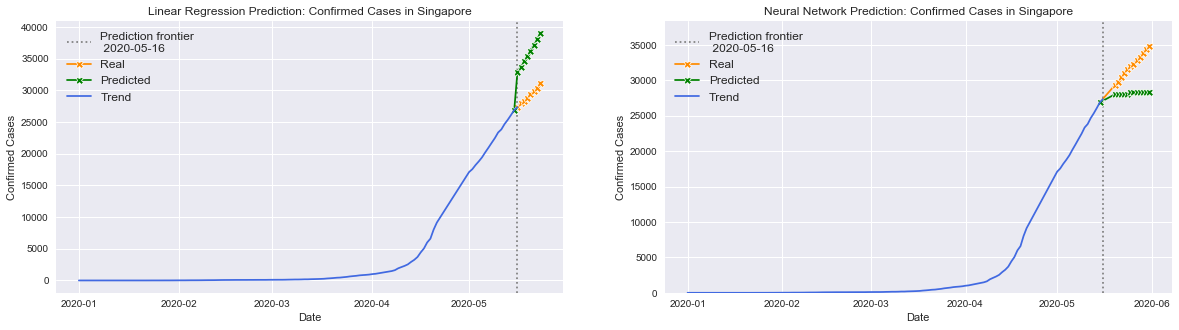

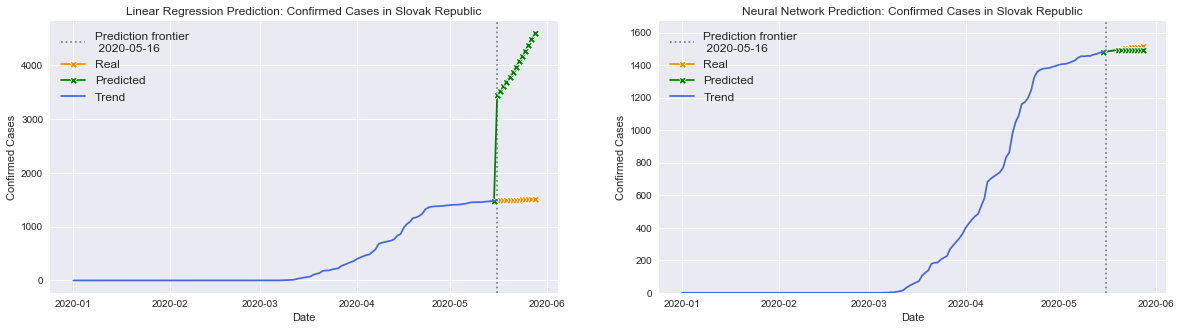

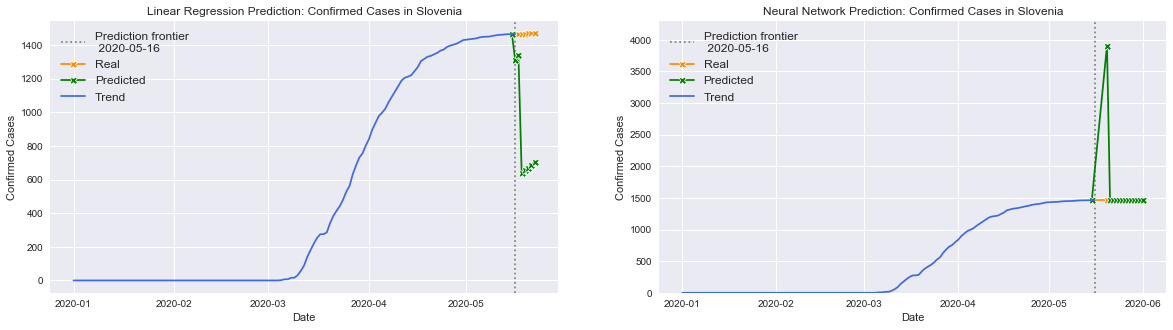

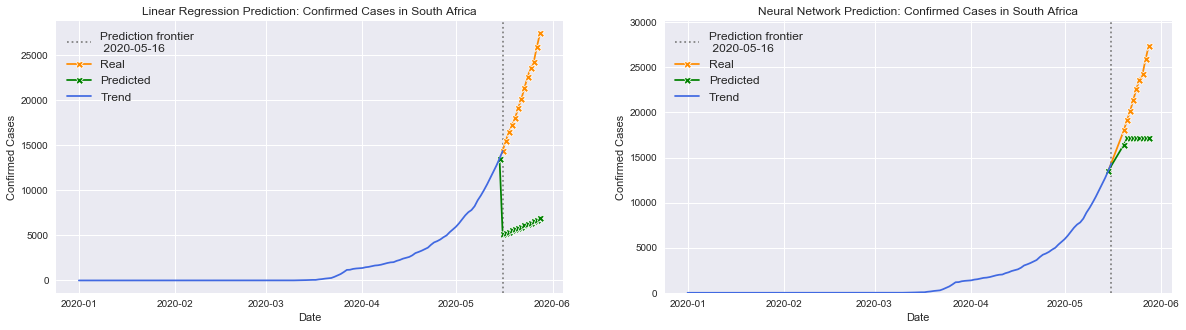

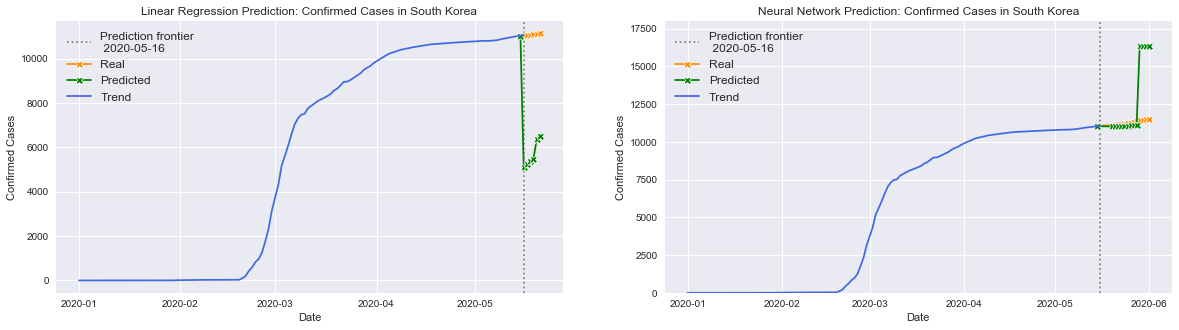

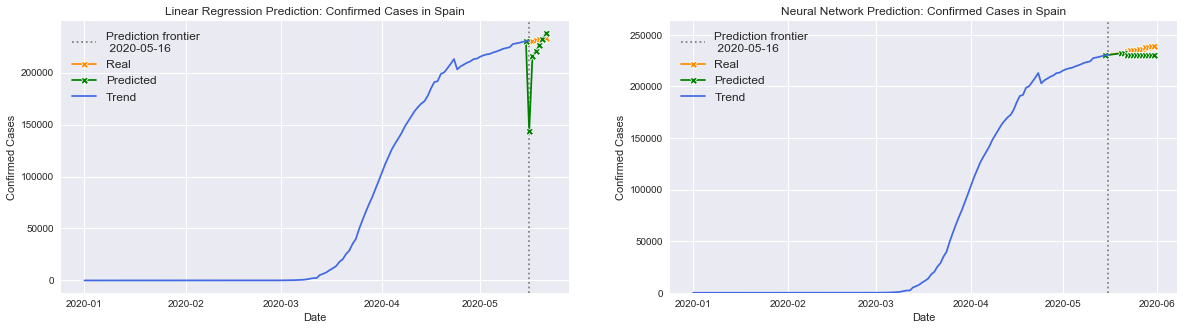

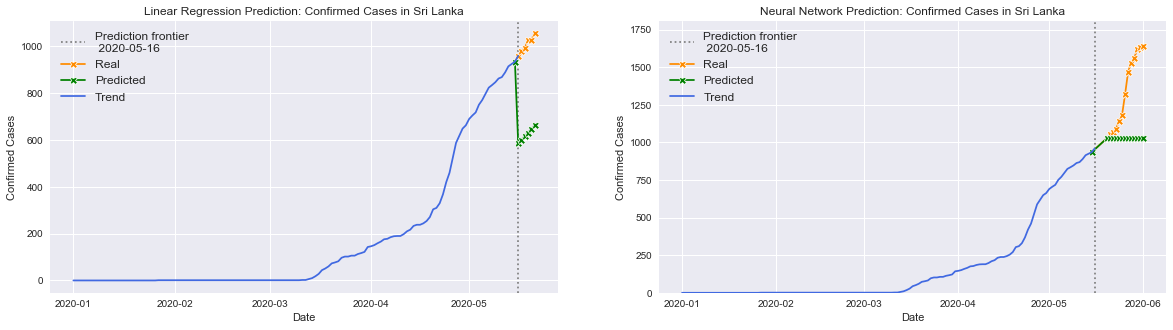

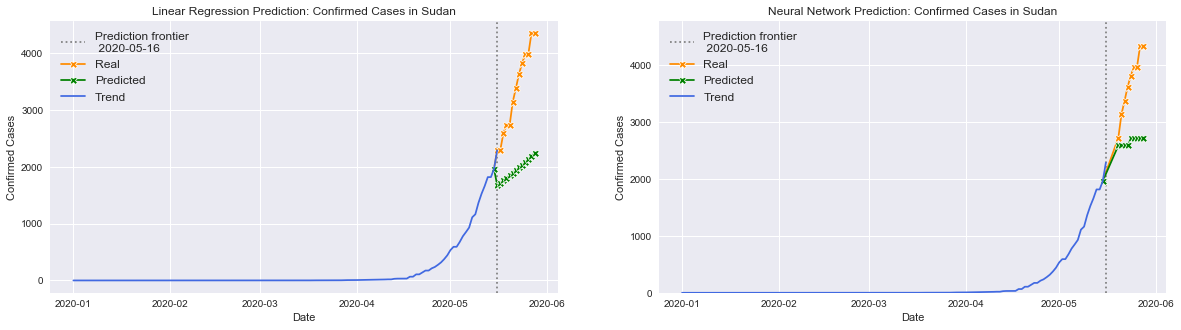

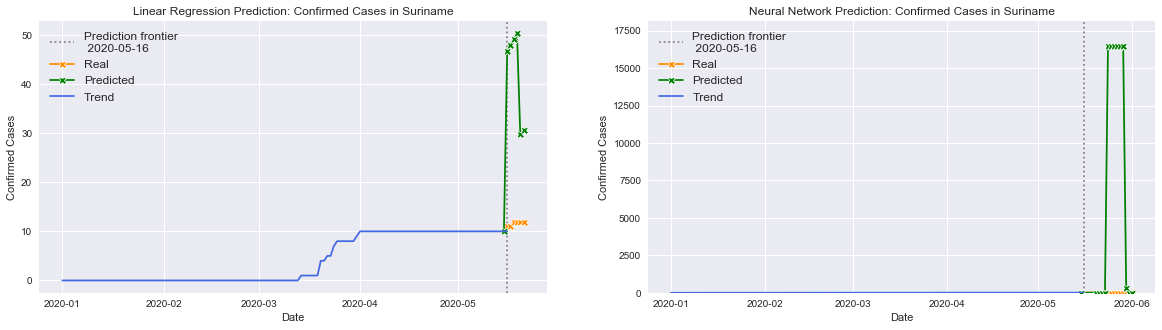

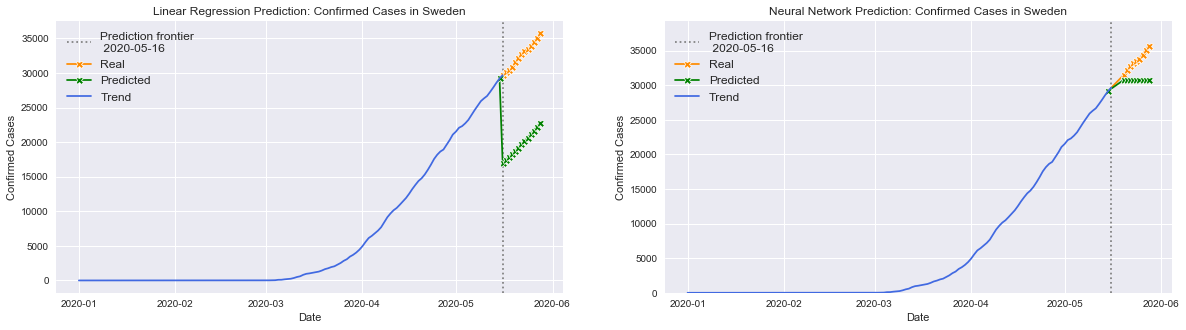

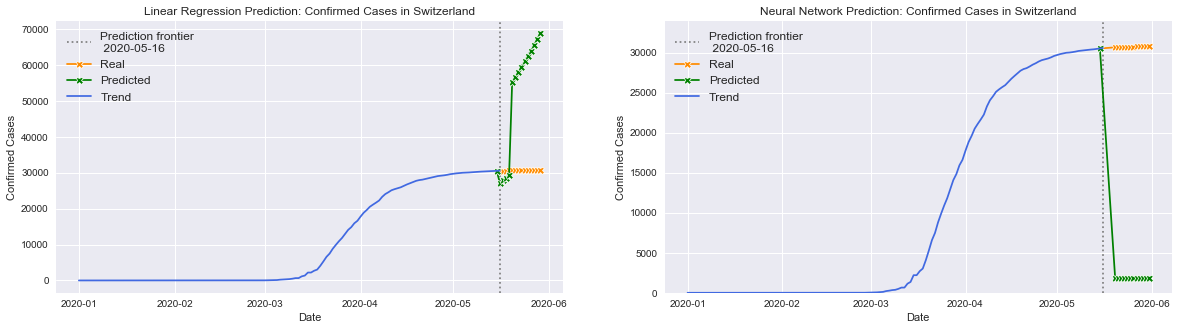

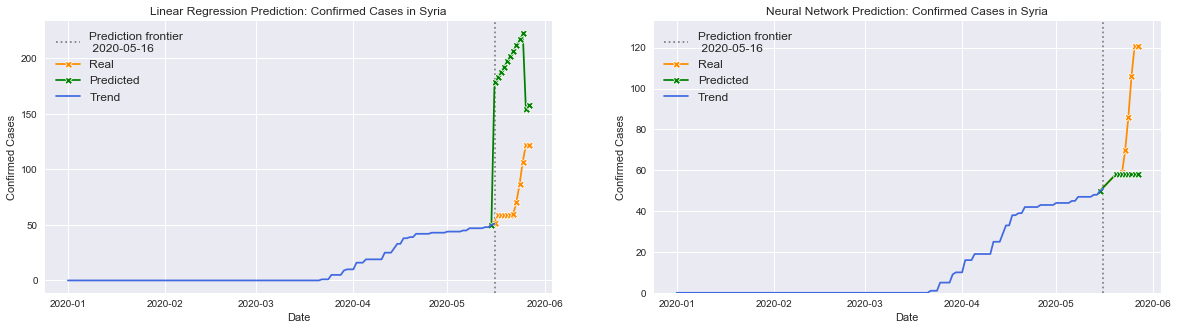

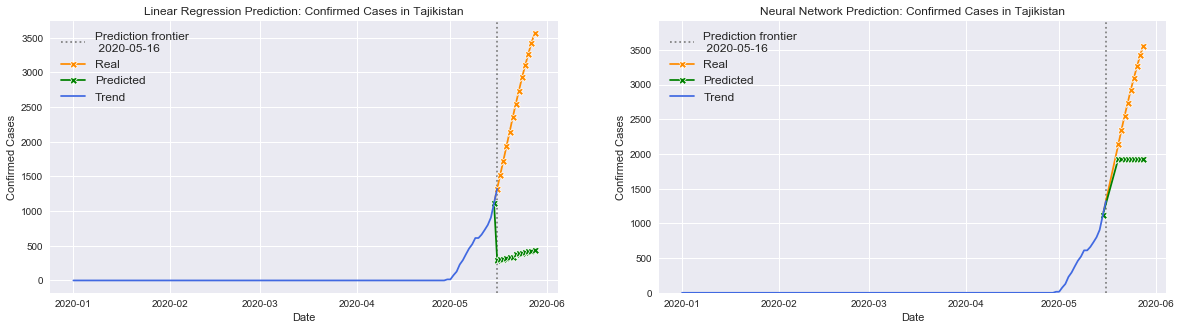

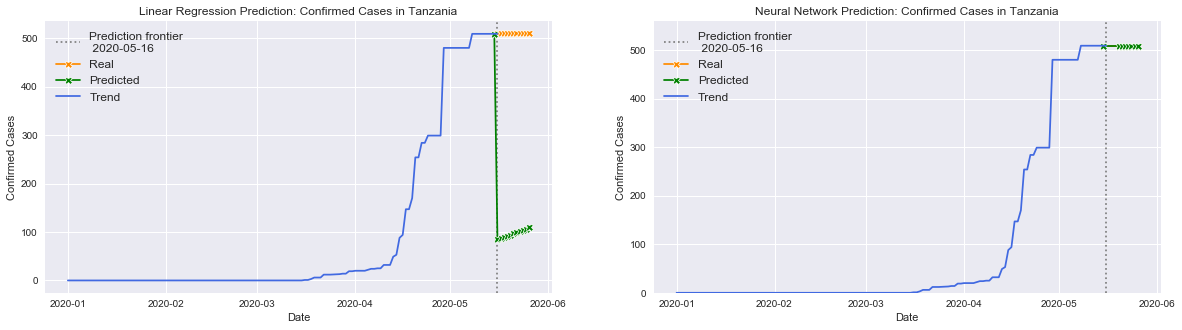

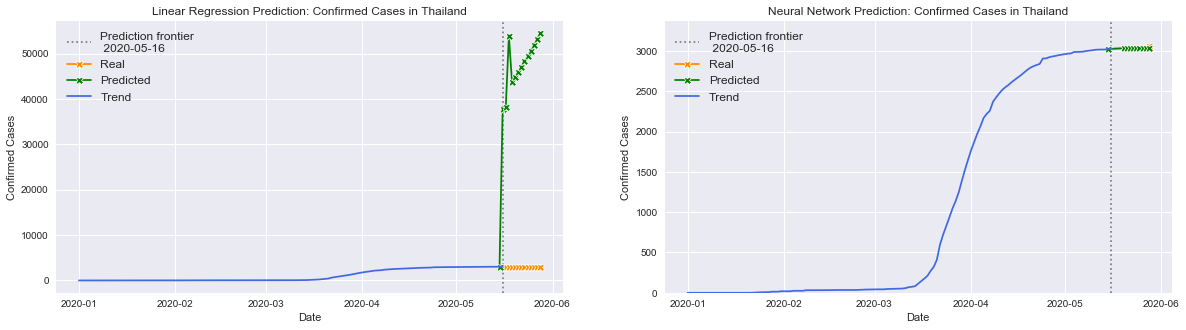

country missing: Timor-Leste 





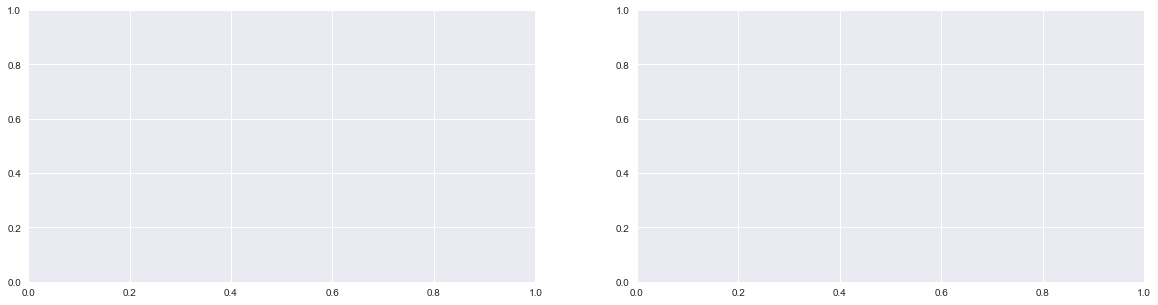

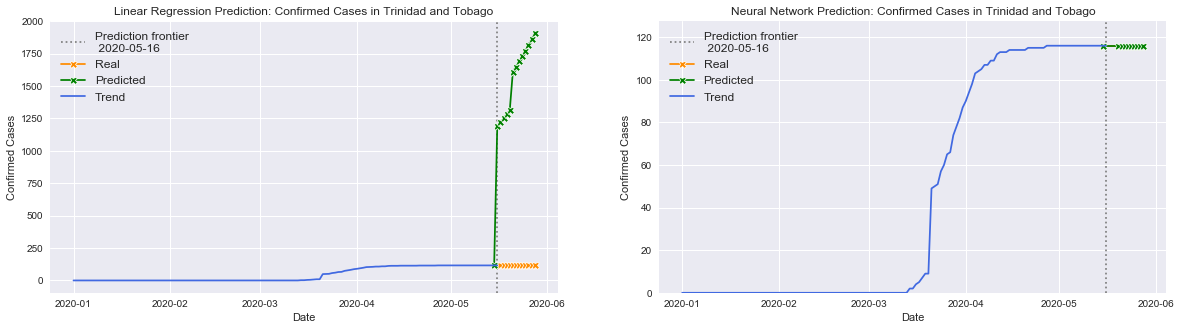

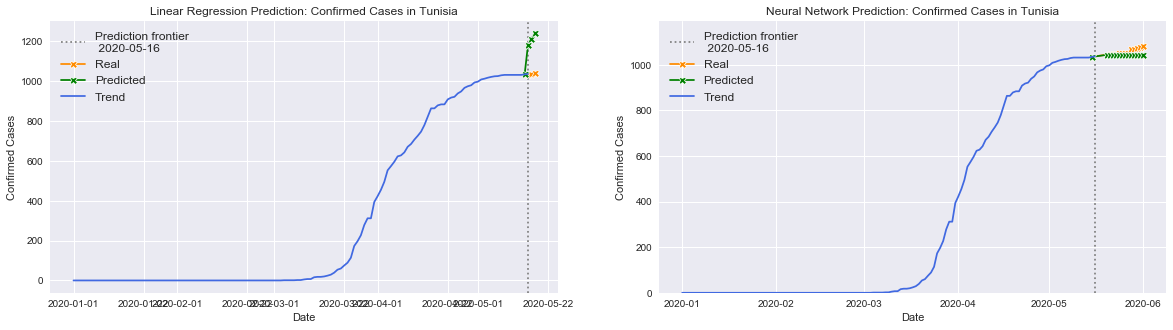

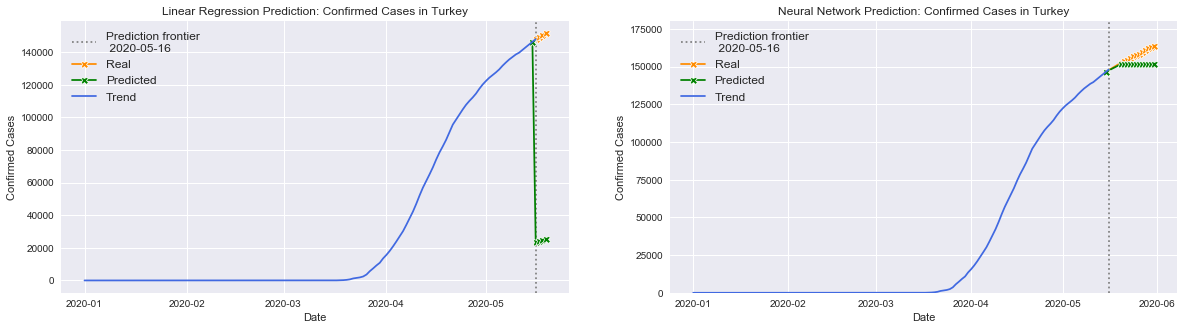

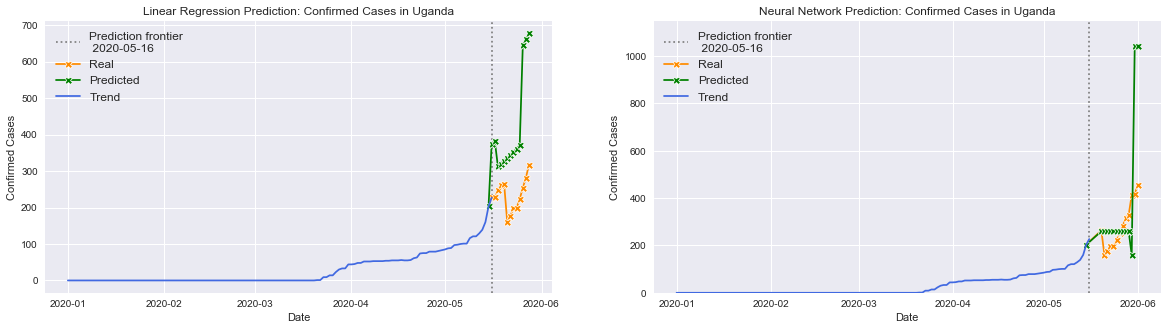

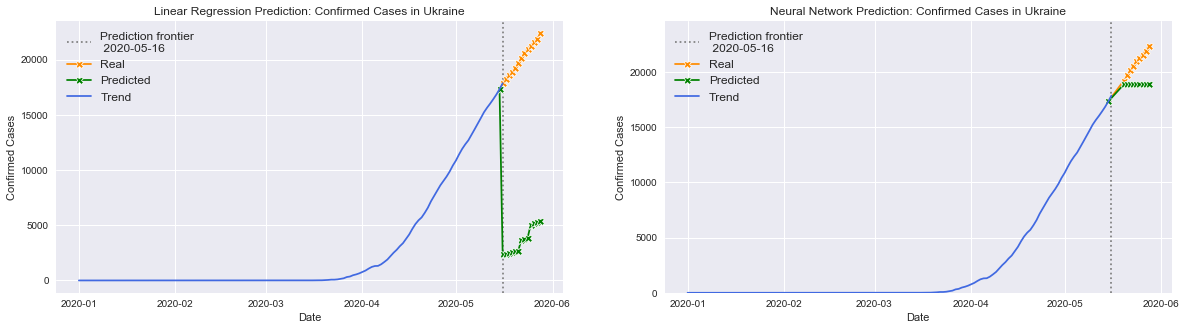

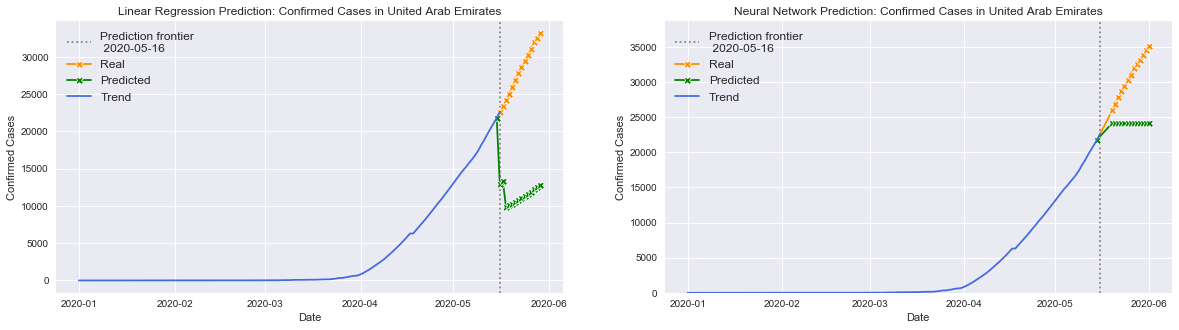

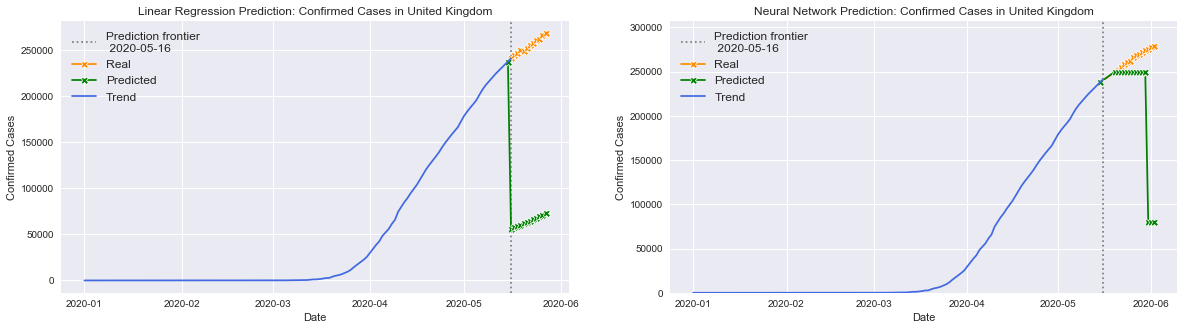

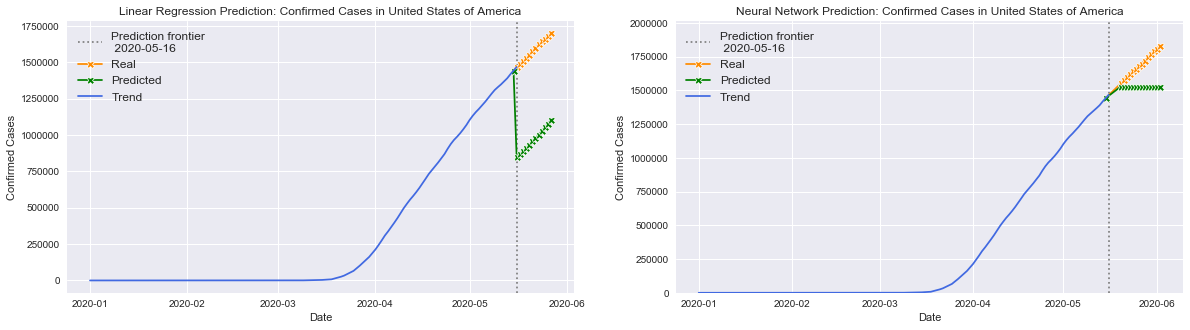

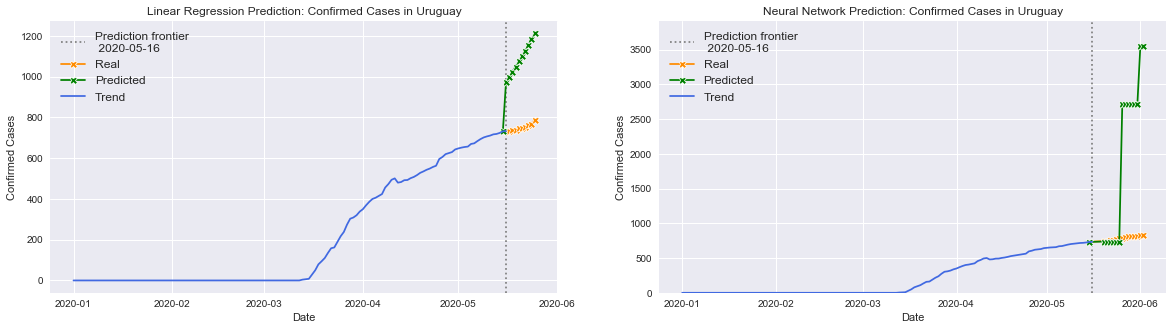

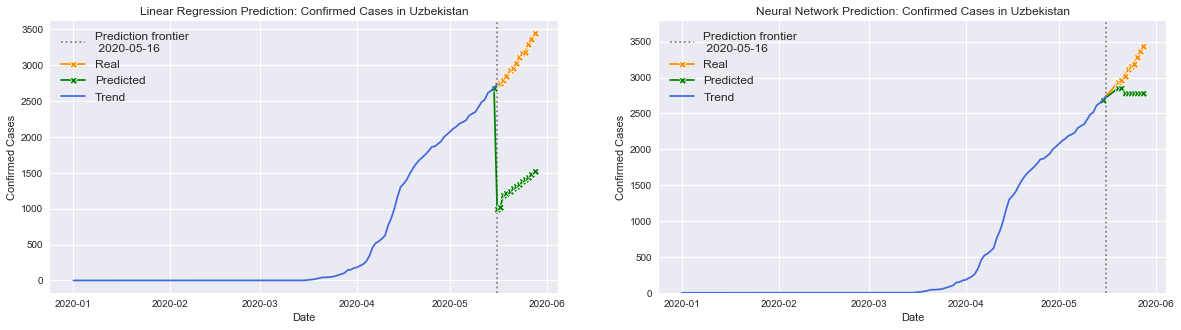

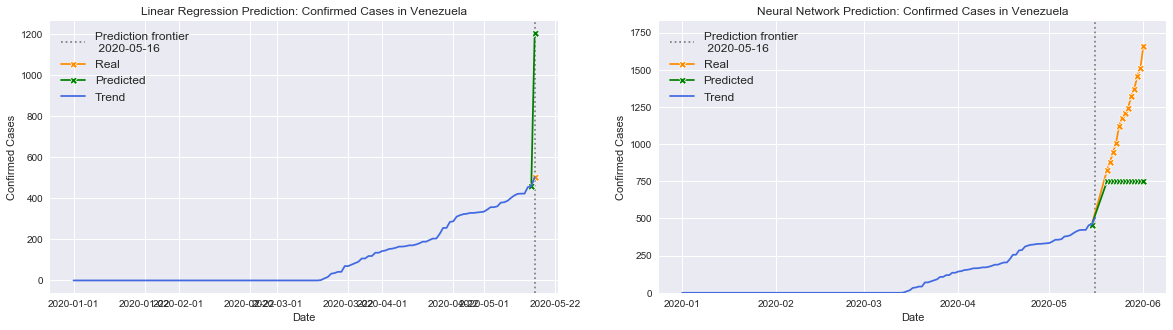

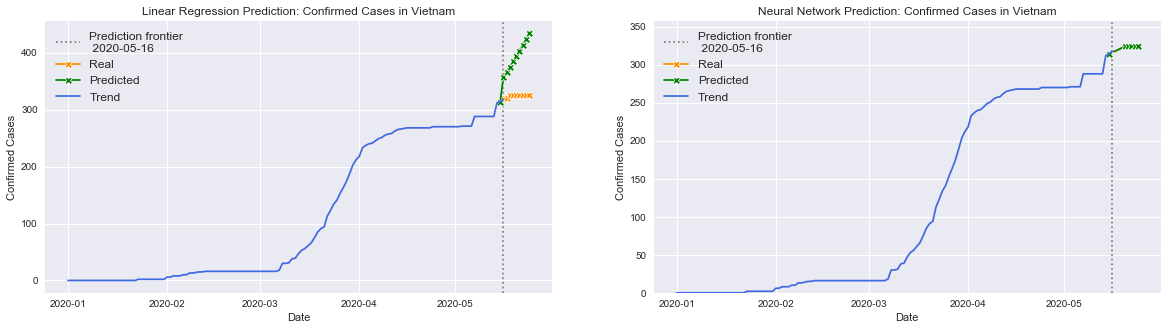

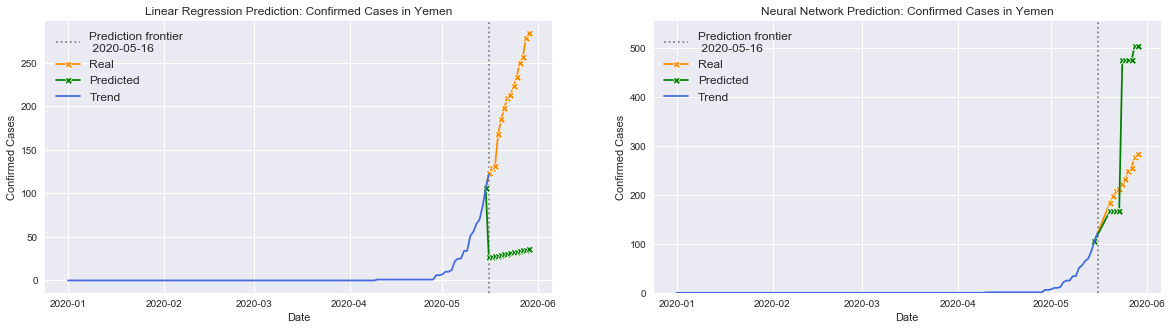

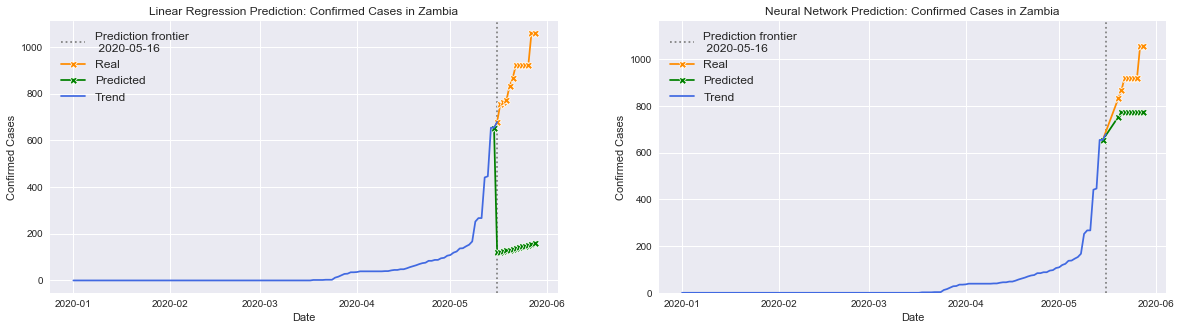

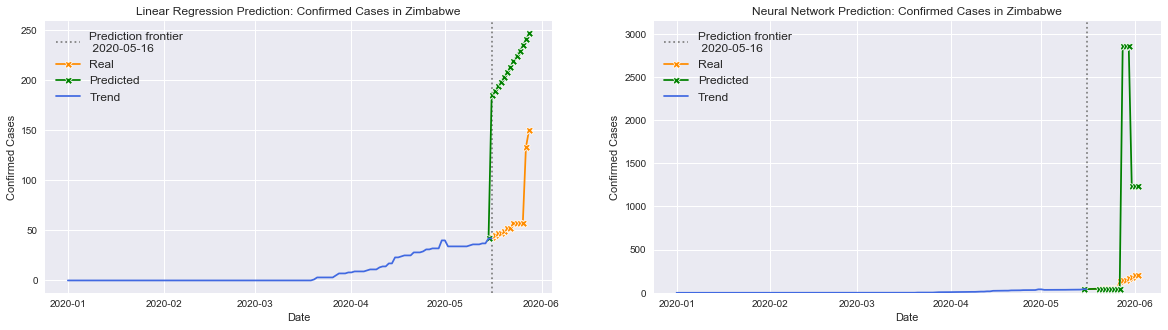

In [69]:
for country in all_data['Country'].unique():
    try:
        side_by_side(all_data, country, 'Confirmed Cases', output, mlp, save_output=True)
    except:
        print('country missing:', country, '\n\n\n')

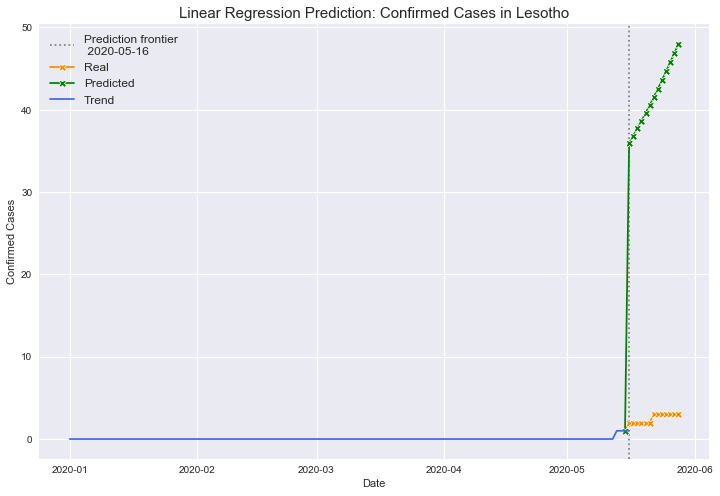

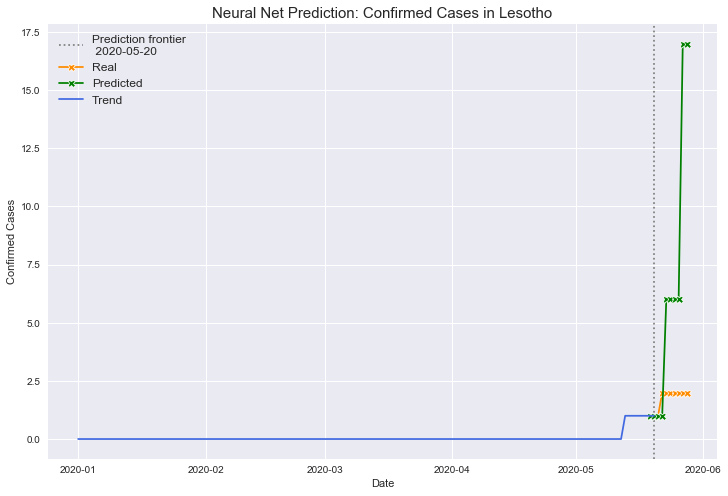

In [24]:
predicted_vs_real(all_data, output, 'Lesotho', 'Confirmed Cases', logged=True)
predicted_vs_real(all_data, mlp, 'Lesotho', 'Confirmed Cases', logged=False, net=True)

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


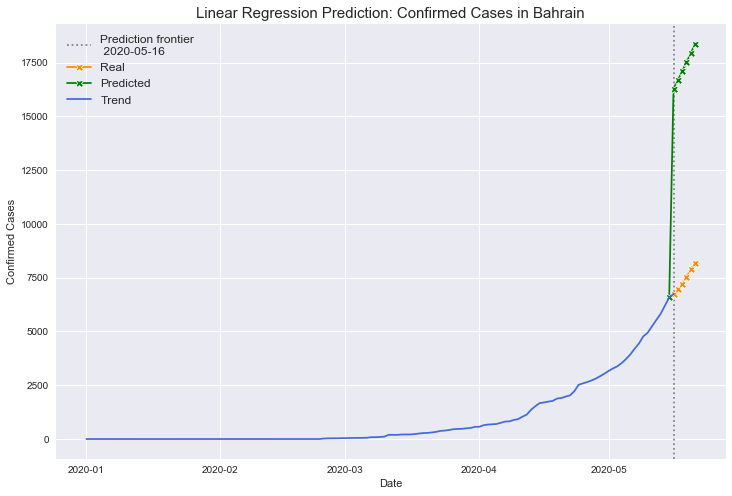

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


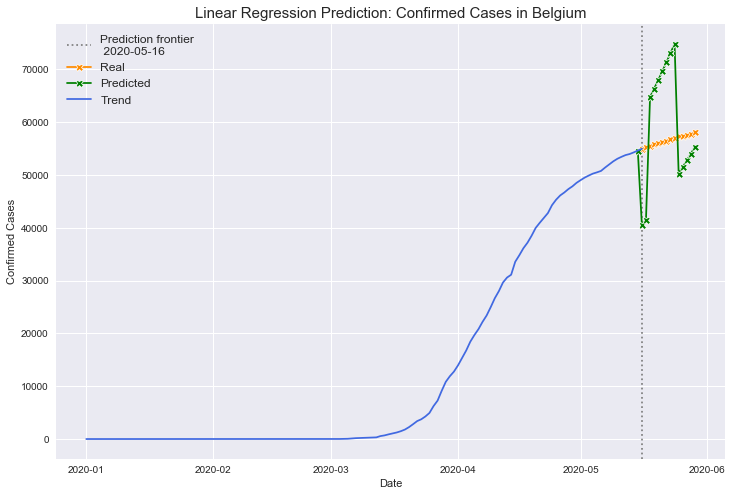

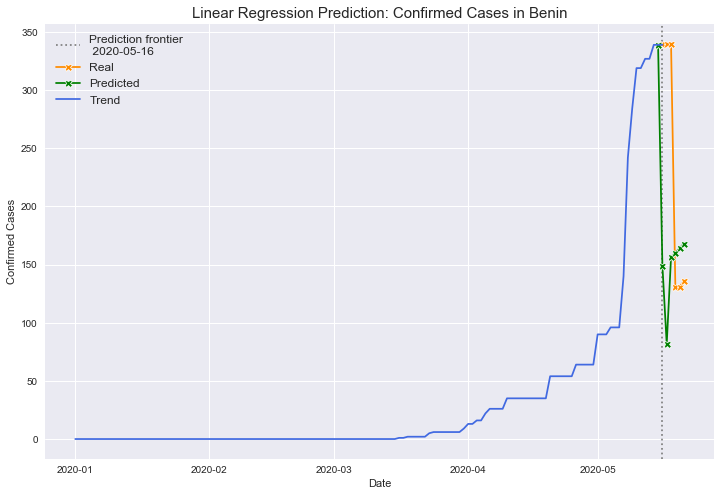

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


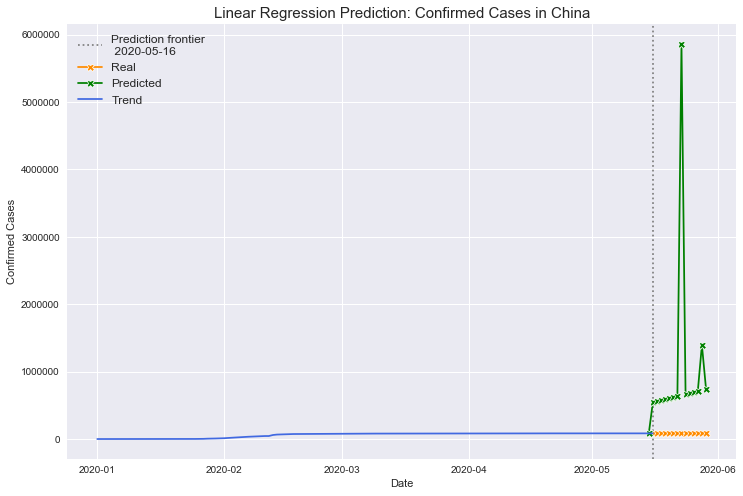

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


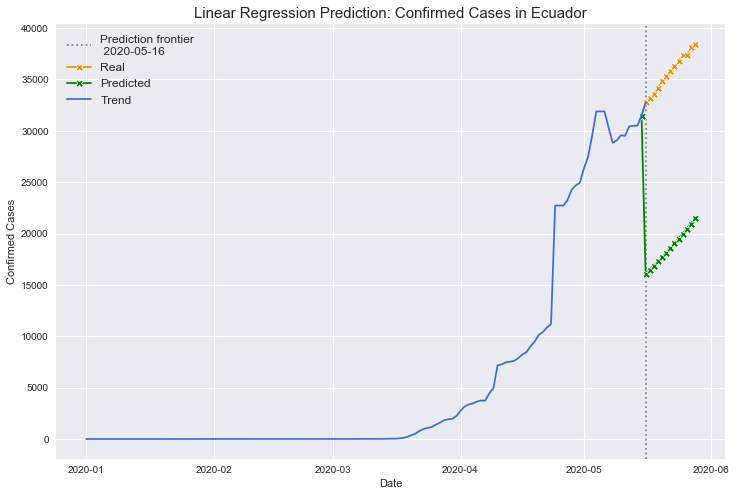

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


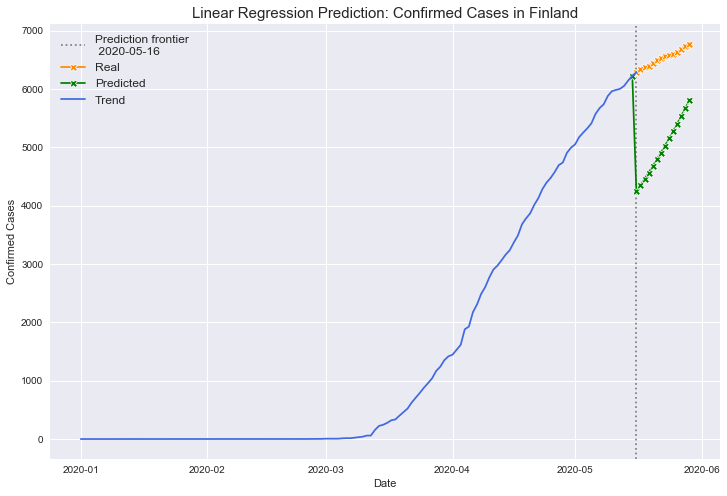

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


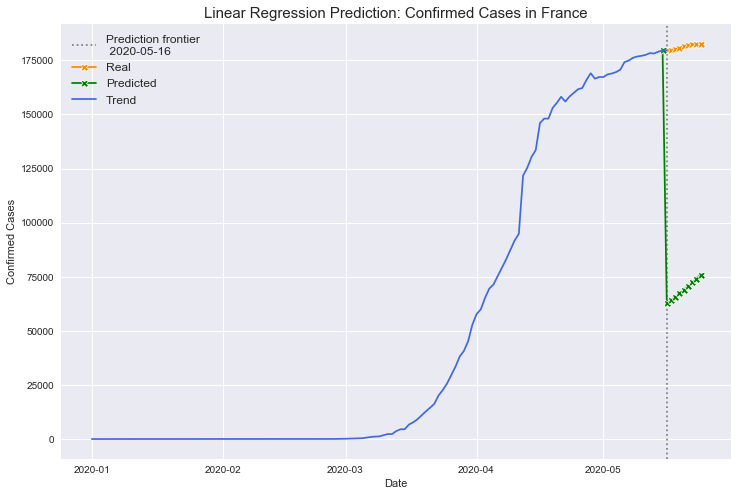

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


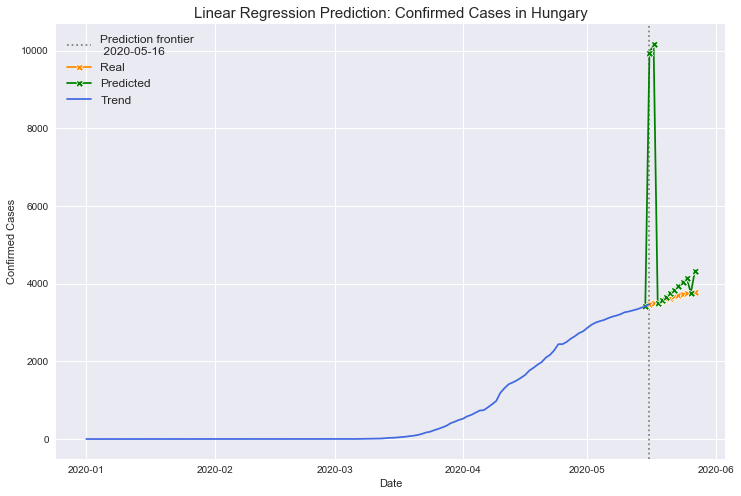

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


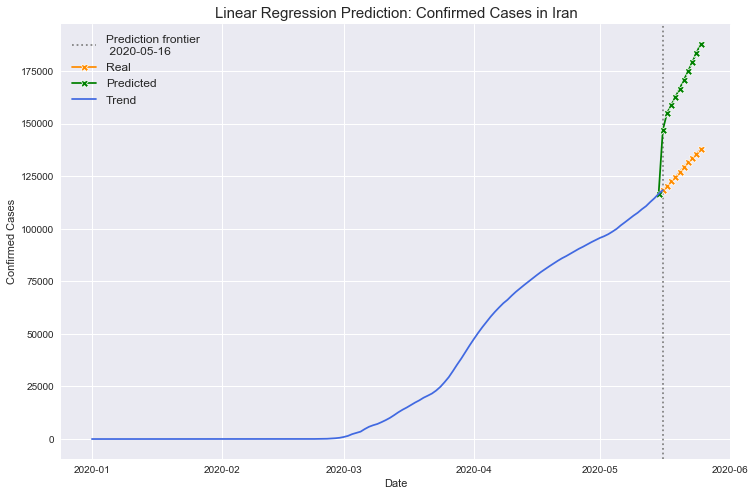

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


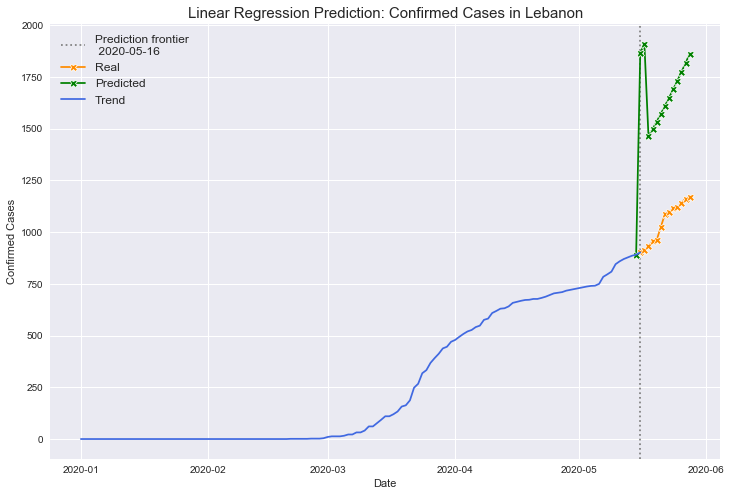

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


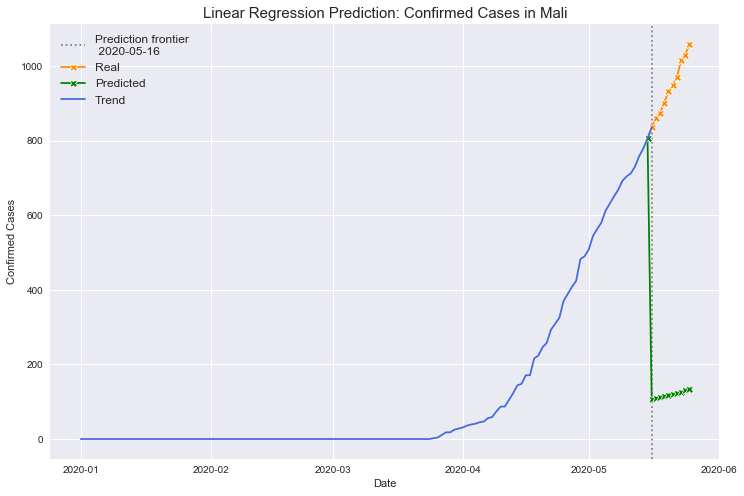

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


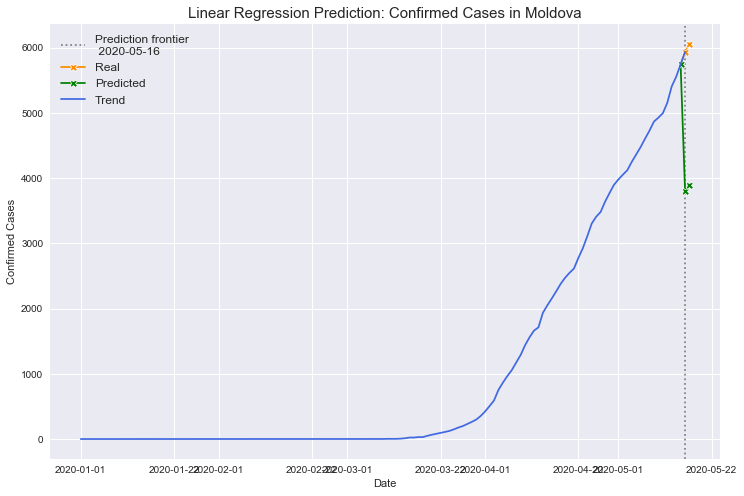

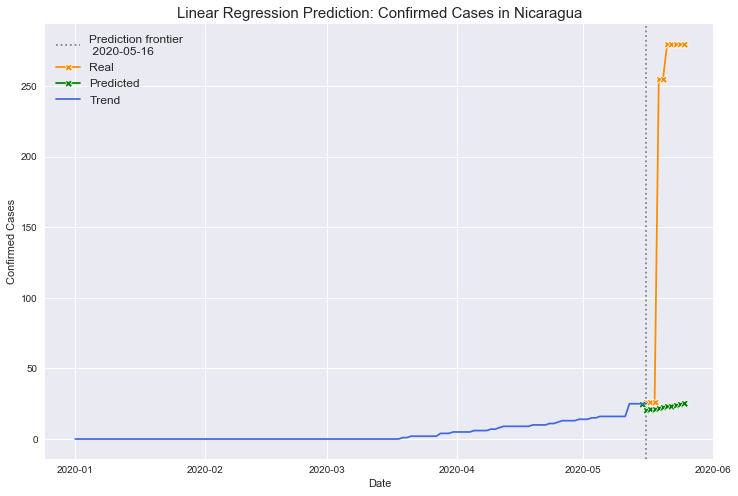

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


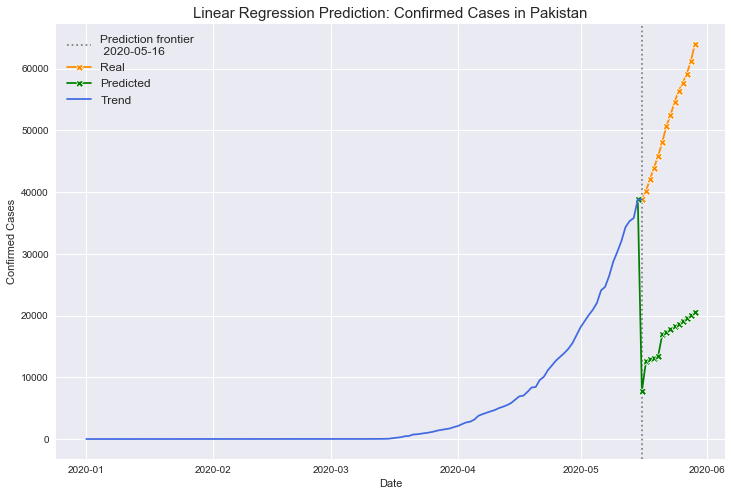

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


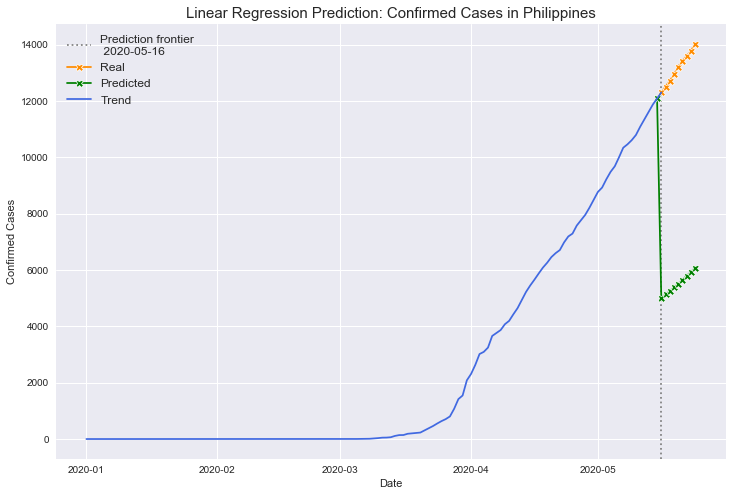

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


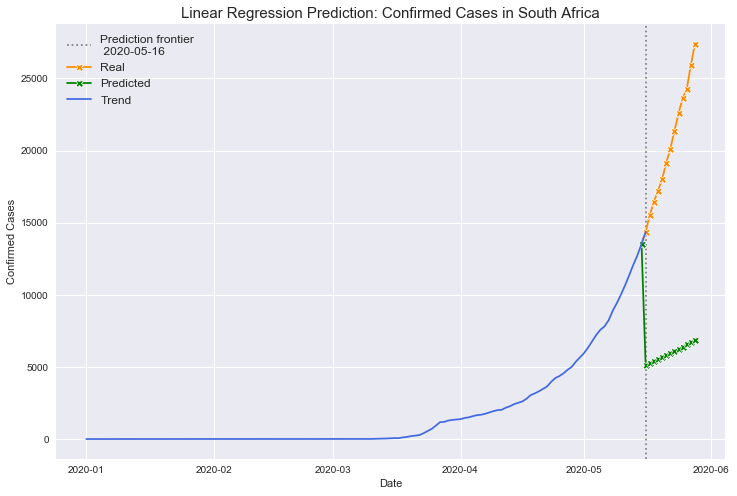

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


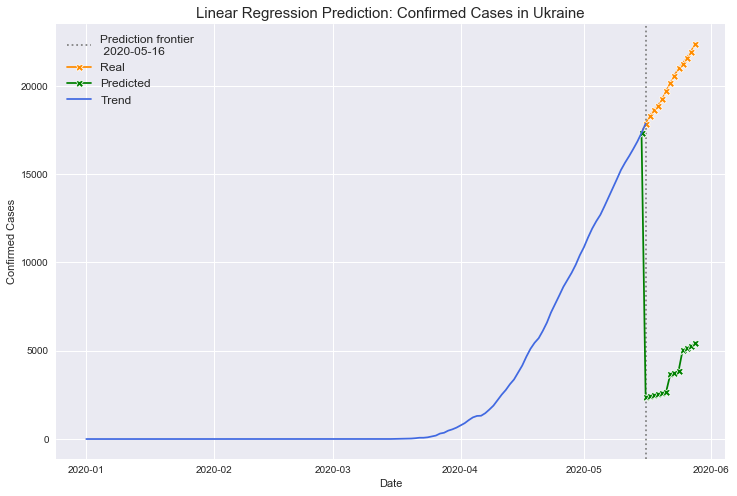

<ipython-input-21-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


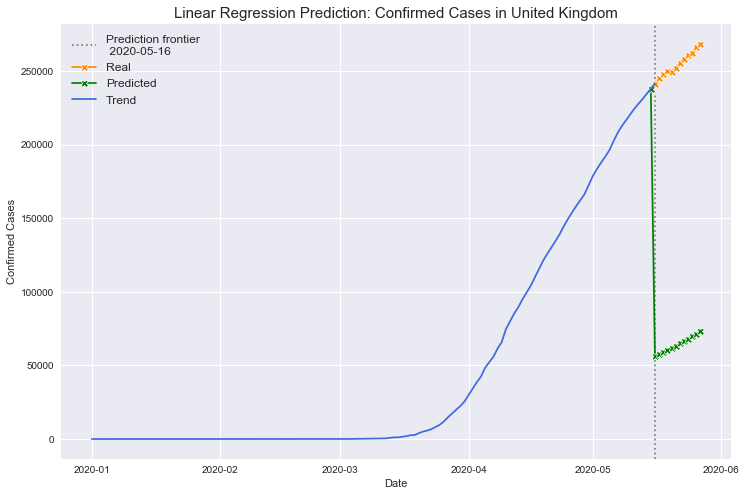

In [25]:
best_models = ['Bahrain', 'Belgium','Benin', 'China', 'Ecuador', 'Finland', 'France', 'Hungary', 'Iran', 'Lebanon', 'Mali', 'Moldova', 'Nicaragua', 'Pakistan', 'Philippines',\
               'South Africa', 'Ukraine', 'United Kingdom']
for country in best_models:
    predicted_vs_real(all_data, output, country, 'Confirmed Cases', logged=True)